In [4]:
import pandas as pd

# Cargar el archivo CSV
datos = pd.read_csv('Glove_embeddings.csv')

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(datos.head())

   Unnamed: 0         0         1         2         3         4         5  \
0           0 -0.208667  0.220323  0.064855 -0.222926  0.003809 -0.120408   
1           1 -0.201566  0.192018  0.107509 -0.178176 -0.063044 -0.081488   
2           2  0.007384  0.169874  0.167481 -0.283953 -0.052582 -0.123474   
3           3 -0.153814  0.202265 -0.030965 -0.176519 -0.076263 -0.044436   
4           4 -0.170459  0.073938  0.026467 -0.154765 -0.120356 -0.011729   

          6         7         8  ...       291       292       293       294  \
0 -0.167614 -0.133127  0.013524  ... -0.025721 -0.000025 -0.031725  0.308000   
1 -0.004529  0.017431  0.006720  ...  0.008079 -0.109289 -0.032243  0.159738   
2  0.022015 -0.094726  0.068234  ...  0.056215 -0.058325 -0.051548  0.196381   
3  0.079090  0.086089 -0.030620  ... -0.009565 -0.008371  0.012922  0.181915   
4  0.025542 -0.074836  0.056577  ... -0.130426 -0.146325  0.091438  0.126669   

        295       296       297       298       299     

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

In [6]:
def random_forest_classification(dataset,n_estimators,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = dataset.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = dataset['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_random_forest = RandomForestClassifier(n_estimators=n_estimators)
        
        # Entrenar el modelo de regresión logística
        modelo_random_forest.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_random_forest.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "Random_Forest_val_sim_" + str(n_estimators) + "_estimators"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = ruta_figura_incom + "/random_forest_glove_embedding_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_random_forest, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_random_forest = RandomForestClassifier(n_estimators=n_estimators)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_random_forest, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "Random_Forest_val_cruz_" + str(n_estimators) + "_estimators"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = ruta_figura_incom + "/random_forest_glove_embedding__val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_random_forest, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion,ruta_figura_incom

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_sim_1_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.1.png


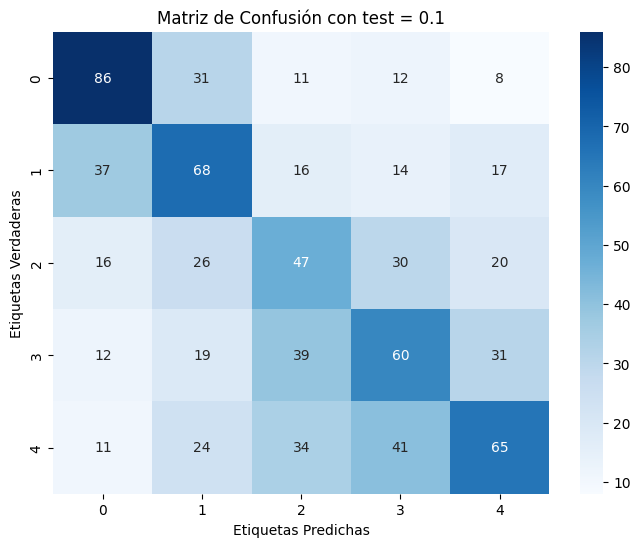

Exactitud del modelo: 0.4206451612903226
Precisión del modelo: 0.42159523730936277
Recall del modelo: 0.4206451612903226
Puntuación F1 del modelo: 0.4195481697868138
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.2.png


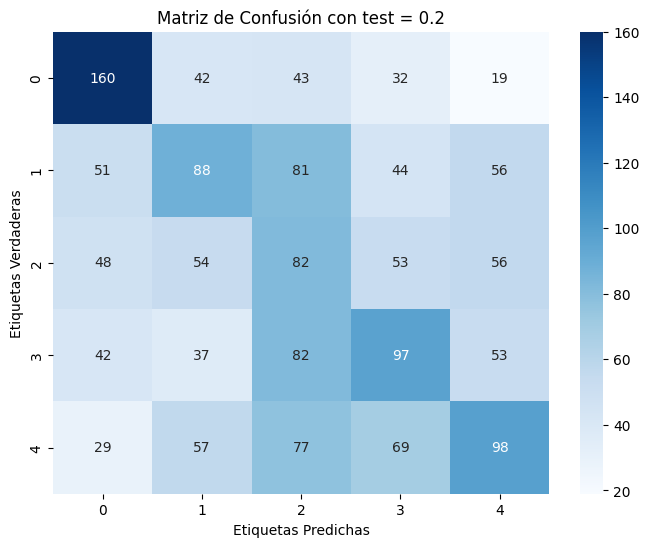

Exactitud del modelo: 0.3387096774193548
Precisión del modelo: 0.34037202651042414
Recall del modelo: 0.3387096774193548
Puntuación F1 del modelo: 0.33791302735390855
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.3.png


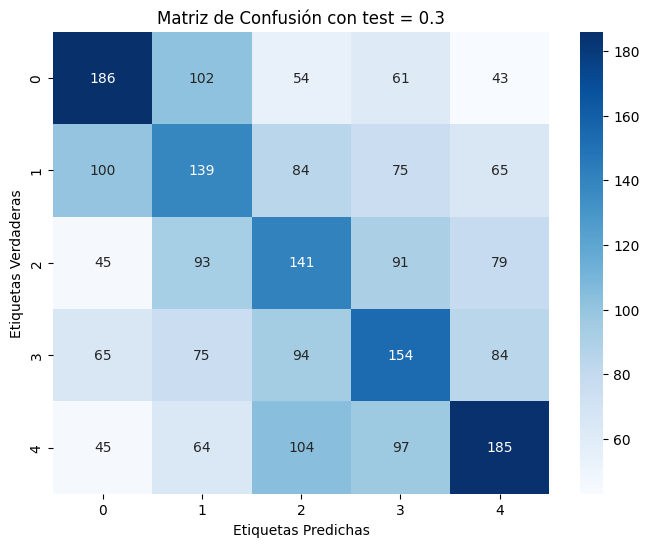

Exactitud del modelo: 0.34623655913978496
Precisión del modelo: 0.3482936510914644
Recall del modelo: 0.34623655913978496
Puntuación F1 del modelo: 0.3470598088474627
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.4.png


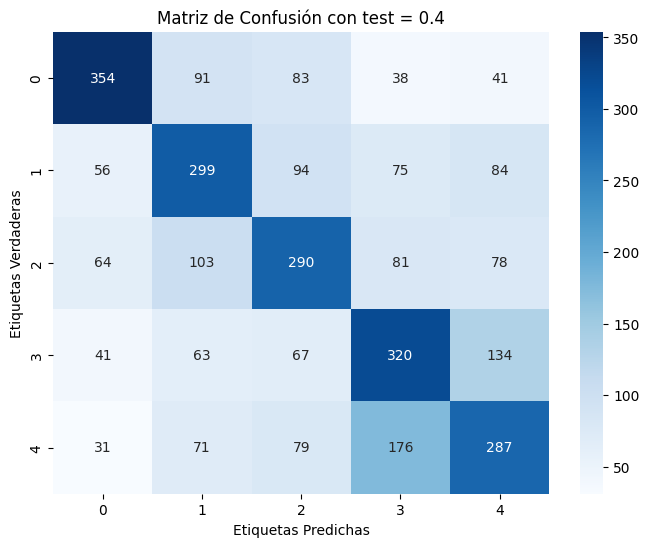

Exactitud del modelo: 0.5
Precisión del modelo: 0.5035360917720969
Recall del modelo: 0.5
Puntuación F1 del modelo: 0.5011437903999651
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.5.png


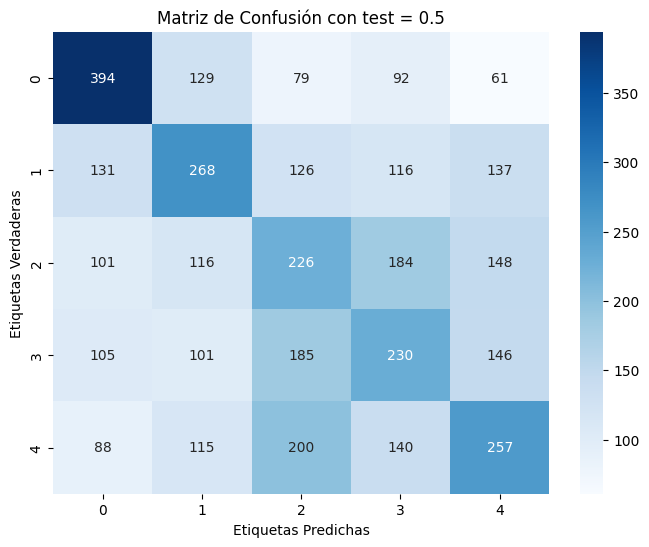

Exactitud del modelo: 0.3548387096774194
Precisión del modelo: 0.3535169231665701
Recall del modelo: 0.3548387096774194
Puntuación F1 del modelo: 0.3538279676376057
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.6.png


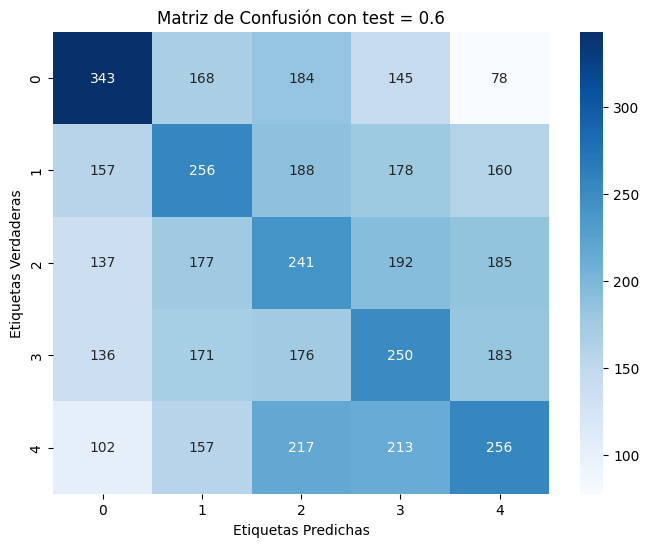

Exactitud del modelo: 0.2894623655913979
Precisión del modelo: 0.2917602146792625
Recall del modelo: 0.2894623655913979
Puntuación F1 del modelo: 0.2903159216552013
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.7.png


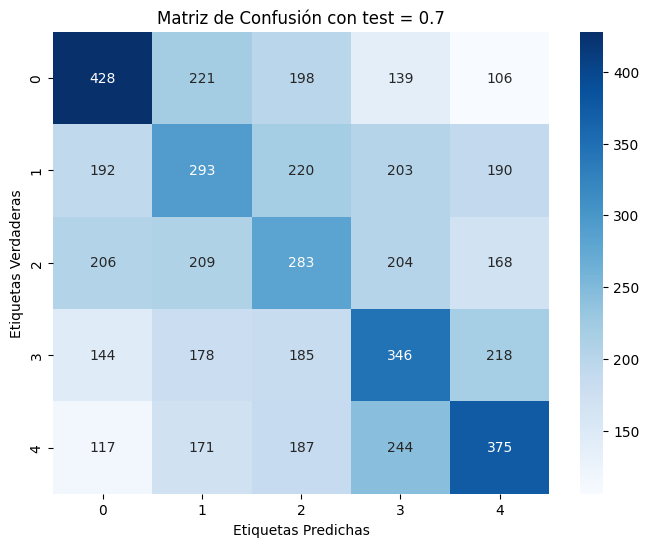

Exactitud del modelo: 0.31797235023041476
Precisión del modelo: 0.318269689160636
Recall del modelo: 0.31797235023041476
Puntuación F1 del modelo: 0.3180381035828645
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.8.png


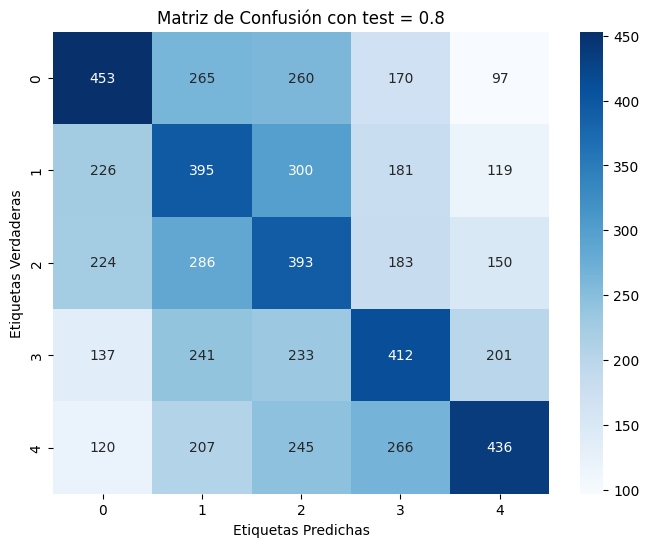

Exactitud del modelo: 0.3369354838709677
Precisión del modelo: 0.3454034682416997
Recall del modelo: 0.3369354838709677
Puntuación F1 del modelo: 0.339365253559934
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_1_estimators/matriz_confusion_test_0.9.png


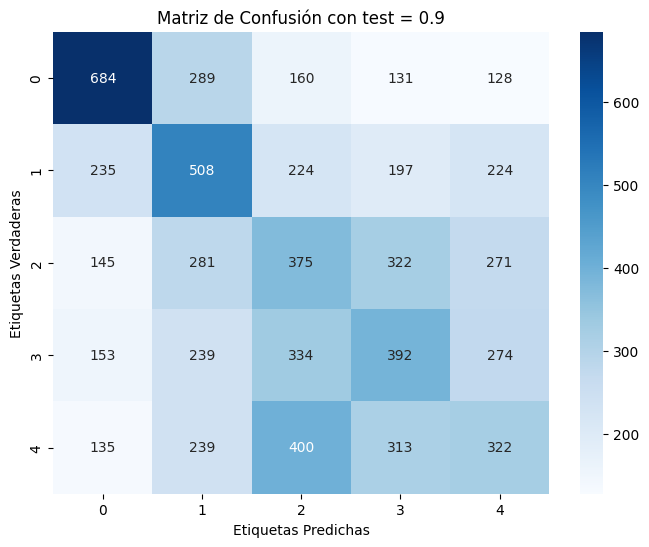

Exactitud del modelo: 0.3270250896057348
Precisión del modelo: 0.32722796474558224
Recall del modelo: 0.3270250896057348
Puntuación F1 del modelo: 0.326549440587226
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_1_estimators/random_forest_glove_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_cruz_1_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_2.png


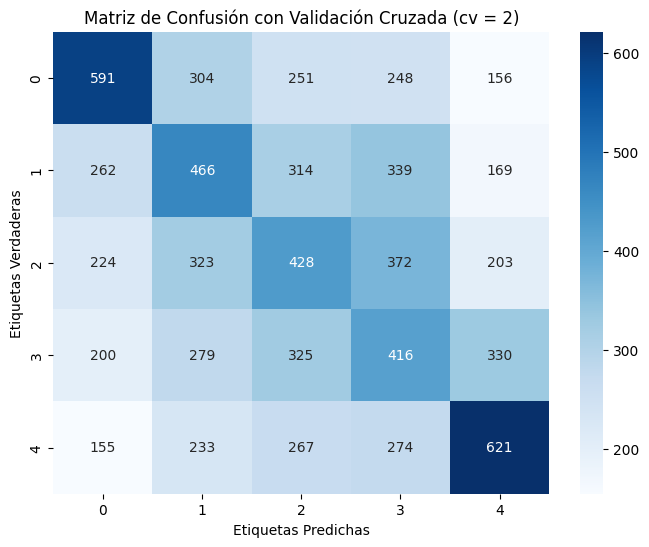

Exactitud media: 0.32541935483870965
Precisión media: 0.3290472247480591
Recall media: 0.32541935483870965
Puntuación F1 media: 0.32698924661386874
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_3.png


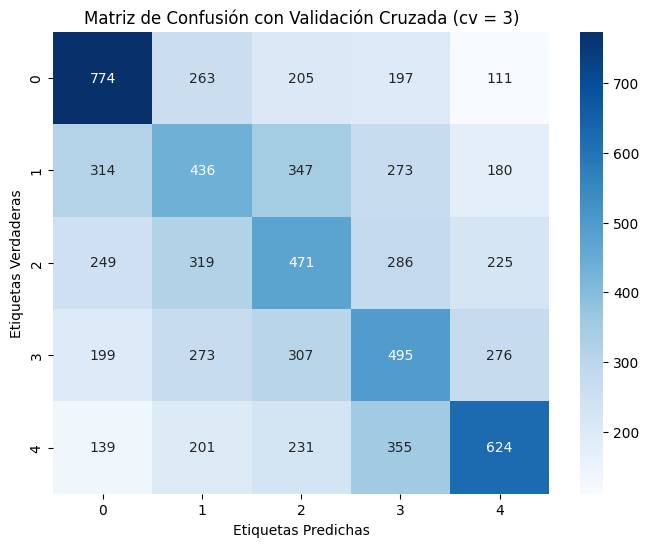

Exactitud media: 0.36129032258064514
Precisión media: 0.36098831159382677
Recall media: 0.36129032258064514
Puntuación F1 media: 0.36078139417361554
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_4.png


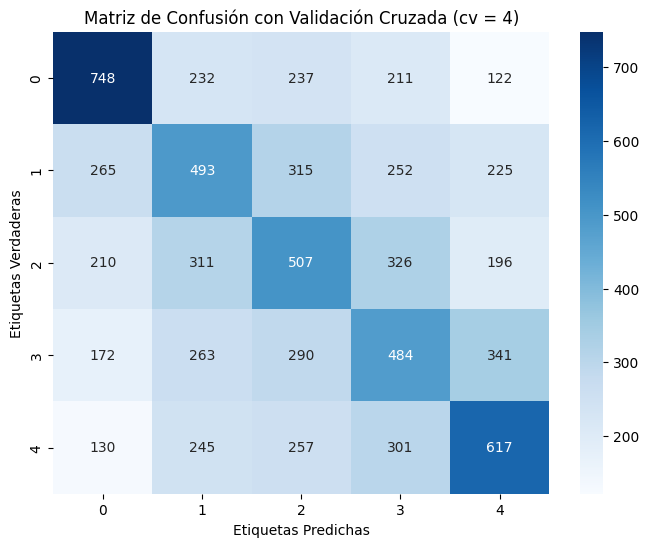

Exactitud media: 0.3676129032258065
Precisión media: 0.36880791935087387
Recall media: 0.3676129032258065
Puntuación F1 media: 0.3681589738433957
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_5.png


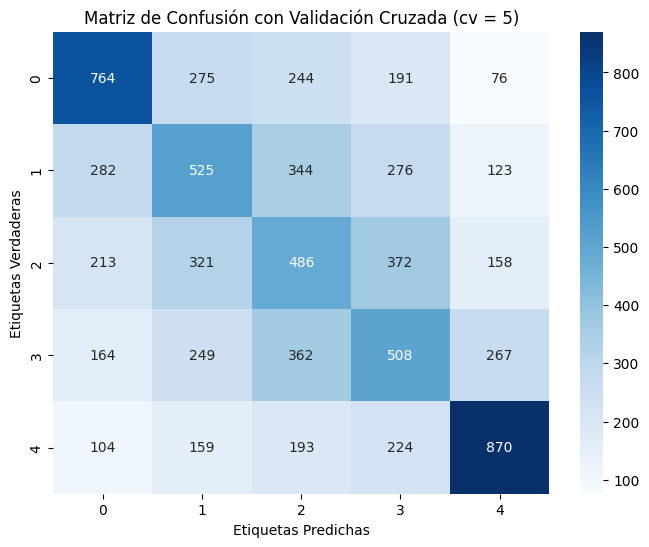

Exactitud media: 0.40683870967741936
Precisión media: 0.40954437780795894
Recall media: 0.40683870967741936
Puntuación F1 media: 0.4081033810912363
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_6.png


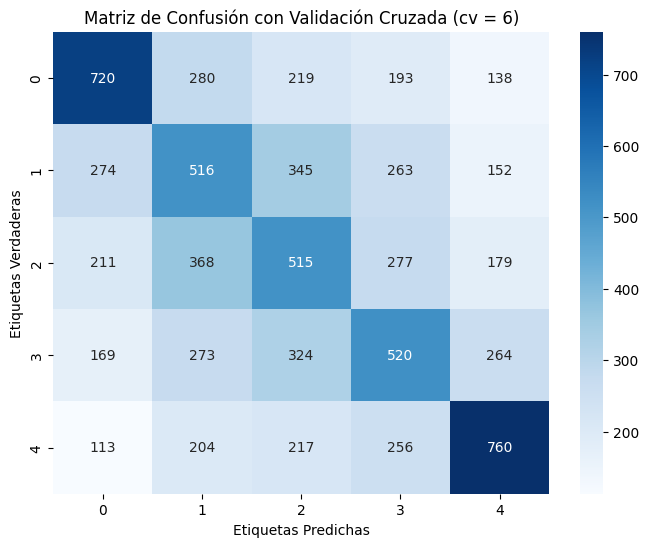

Exactitud media: 0.3910967741935484
Precisión media: 0.39403625708201306
Recall media: 0.3910967741935484
Puntuación F1 media: 0.39239406001328553
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_7.png


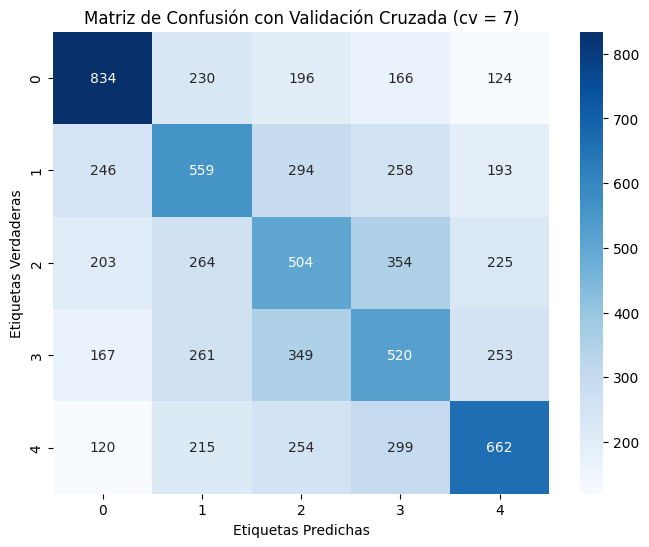

Exactitud media: 0.39729032258064517
Precisión media: 0.39847382921495555
Recall media: 0.39729032258064517
Puntuación F1 media: 0.3977609521613138
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_8.png


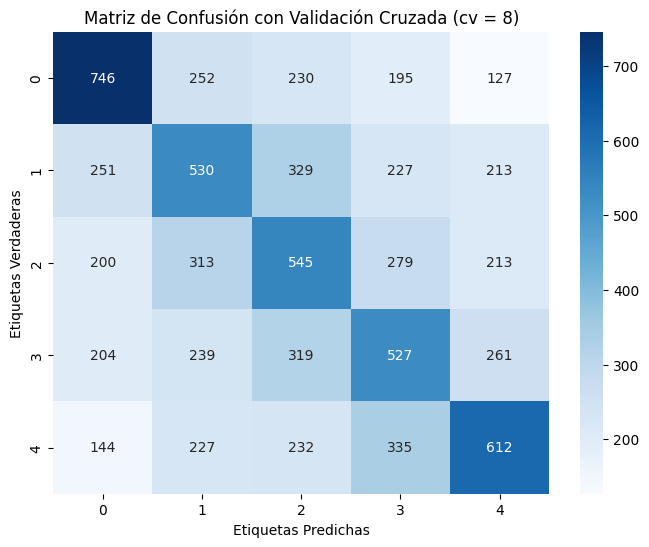

Exactitud media: 0.38193548387096776
Precisión media: 0.38360471854885186
Recall media: 0.38193548387096776
Puntuación F1 media: 0.3825516759963275
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_9.png


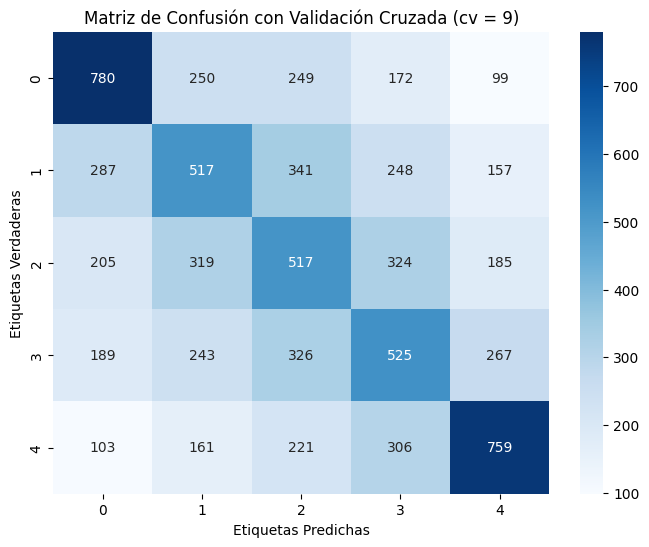

Exactitud media: 0.399741935483871
Precisión media: 0.4017984828359477
Recall media: 0.399741935483871
Puntuación F1 media: 0.400593078284221
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_1_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_1_estimators/matriz_confusion_cv_10.png


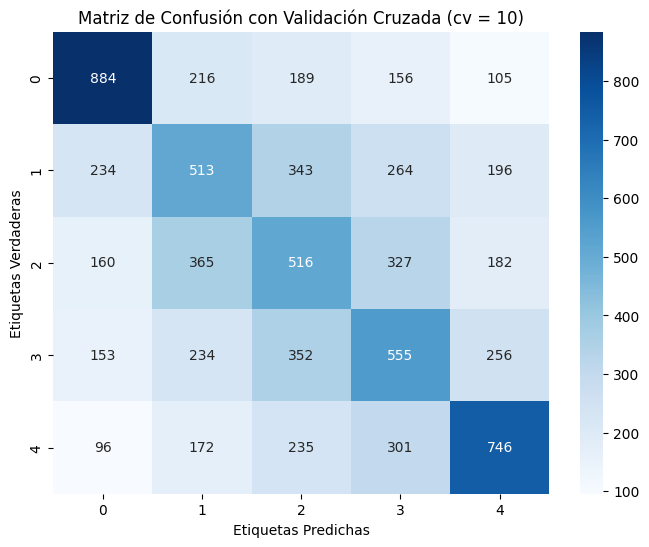

Exactitud media: 0.4147096774193548
Precisión media: 0.41701839206411945
Recall media: 0.4147096774193548
Puntuación F1 media: 0.4157283220281187
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_1_estimators/random_forest_glove_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_sim_2_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.1.png


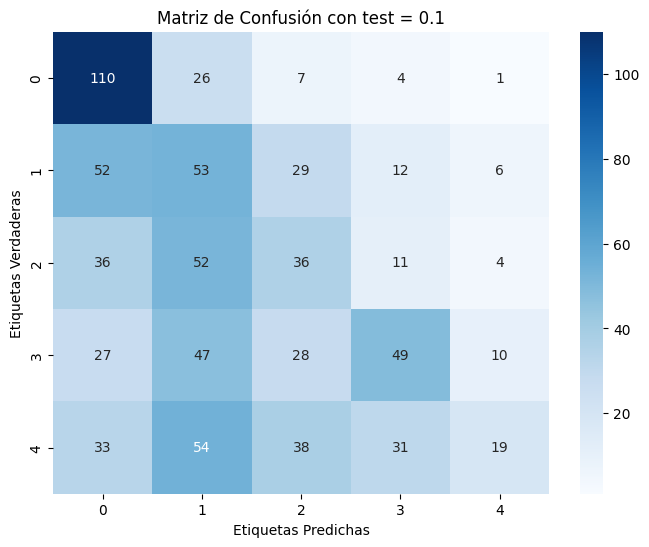

Exactitud del modelo: 0.3445161290322581
Precisión del modelo: 0.37540613503569953
Recall del modelo: 0.3445161290322581
Puntuación F1 del modelo: 0.32011446252093345
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.2.png


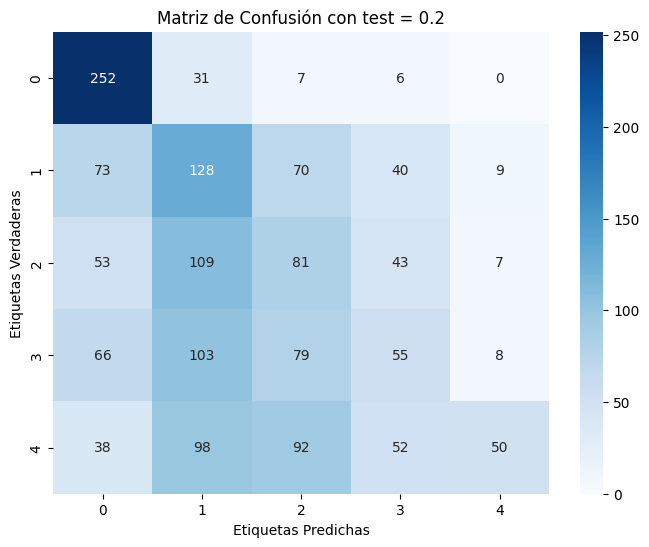

Exactitud del modelo: 0.36516129032258066
Precisión del modelo: 0.4028839359814018
Recall del modelo: 0.36516129032258066
Puntuación F1 del modelo: 0.3361620992706343
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.3.png


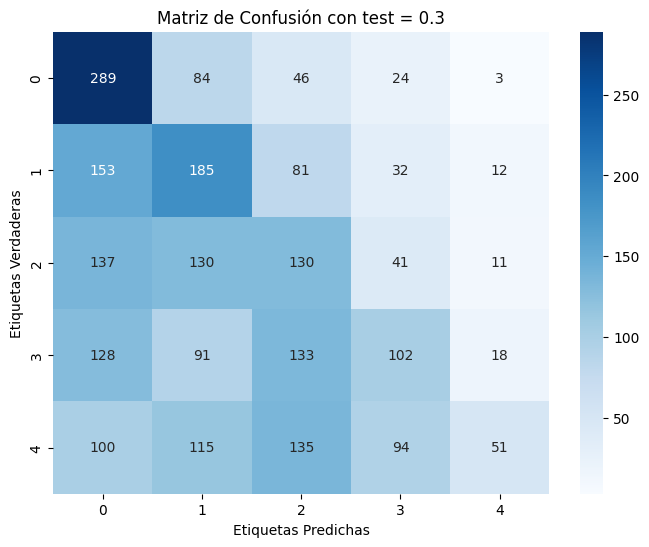

Exactitud del modelo: 0.32559139784946234
Precisión del modelo: 0.3623786023615812
Recall del modelo: 0.32559139784946234
Puntuación F1 del modelo: 0.2999735288140345
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.4.png


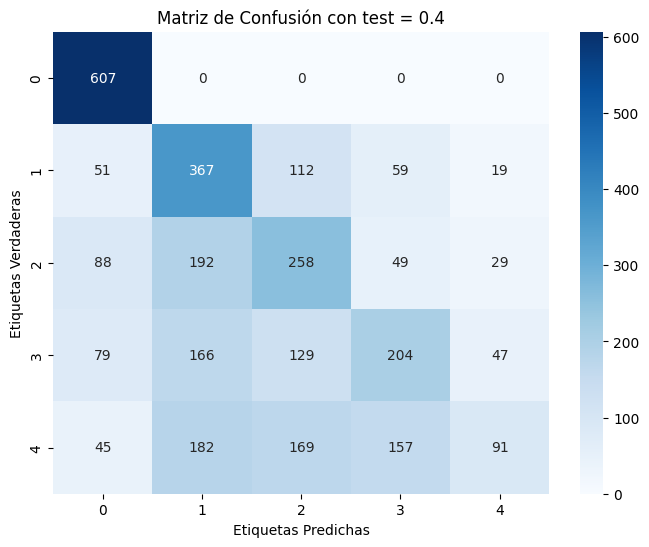

Exactitud del modelo: 0.4925806451612903
Precisión del modelo: 0.48205370333730935
Recall del modelo: 0.4925806451612903
Puntuación F1 del modelo: 0.456561221004533
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.5.png


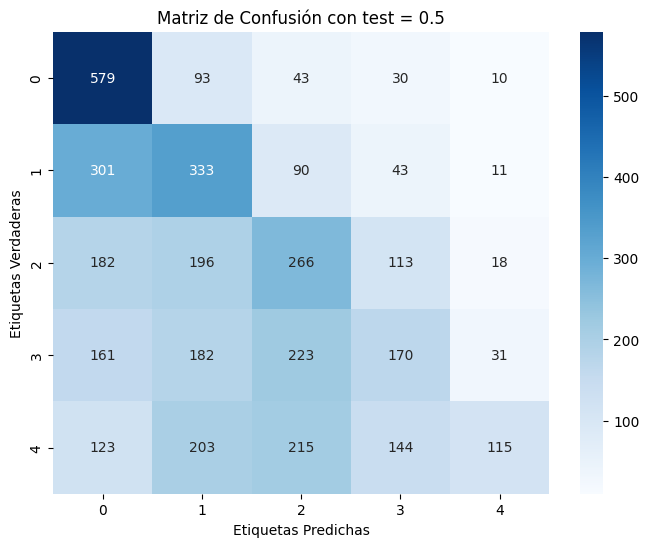

Exactitud del modelo: 0.3775483870967742
Precisión del modelo: 0.40939873152245565
Recall del modelo: 0.3775483870967742
Puntuación F1 del modelo: 0.3496272128678984
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.6.png


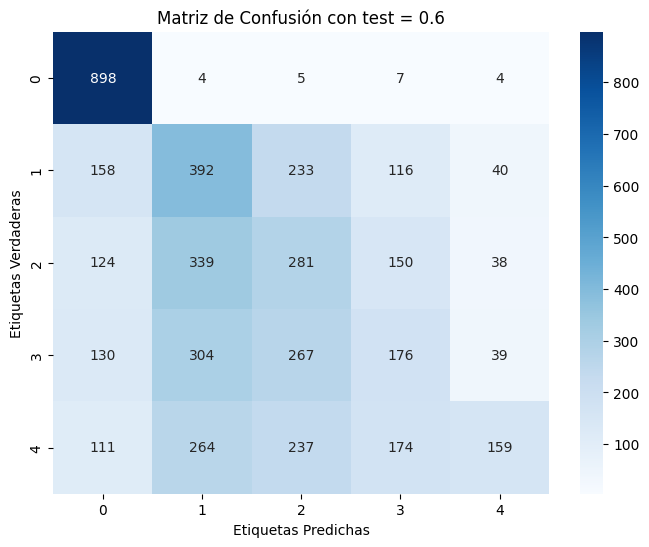

Exactitud del modelo: 0.4098924731182796
Precisión del modelo: 0.4116182325249261
Recall del modelo: 0.4098924731182796
Puntuación F1 del modelo: 0.3776311044343768
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.7.png


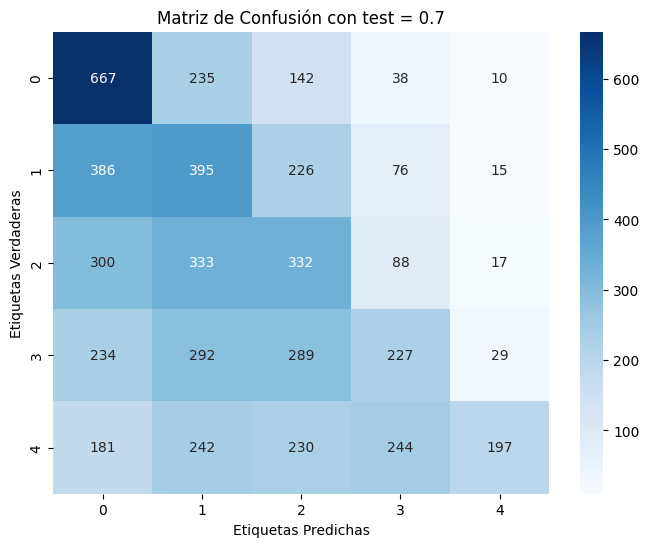

Exactitud del modelo: 0.3351152073732719
Precisión del modelo: 0.3978847096698638
Recall del modelo: 0.3351152073732719
Puntuación F1 del modelo: 0.32244735478824293
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.8.png


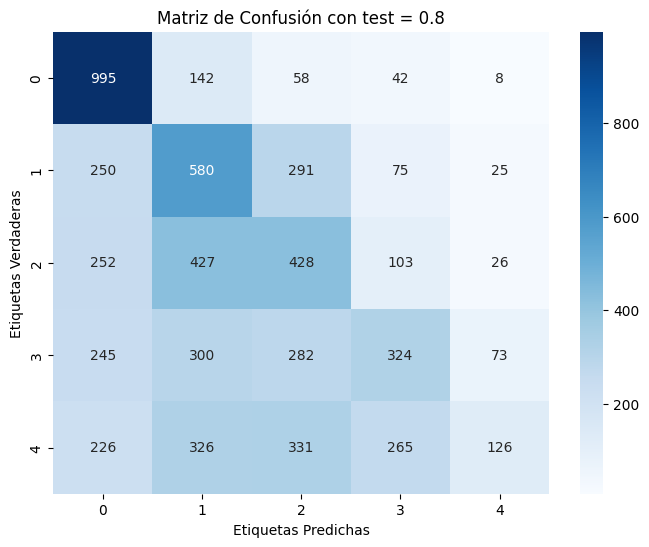

Exactitud del modelo: 0.39564516129032257
Precisión del modelo: 0.40667839071305745
Recall del modelo: 0.39564516129032257
Puntuación F1 del modelo: 0.36233103310841935
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_2_estimators/matriz_confusion_test_0.9.png


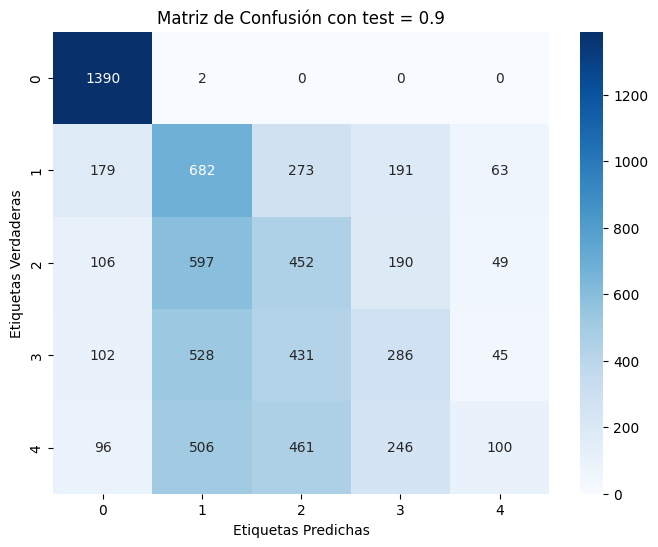

Exactitud del modelo: 0.4172043010752688
Precisión del modelo: 0.40371402696150216
Recall del modelo: 0.4172043010752688
Puntuación F1 del modelo: 0.3770035898488561
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_2_estimators/random_forest_glove_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_cruz_2_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_2.png


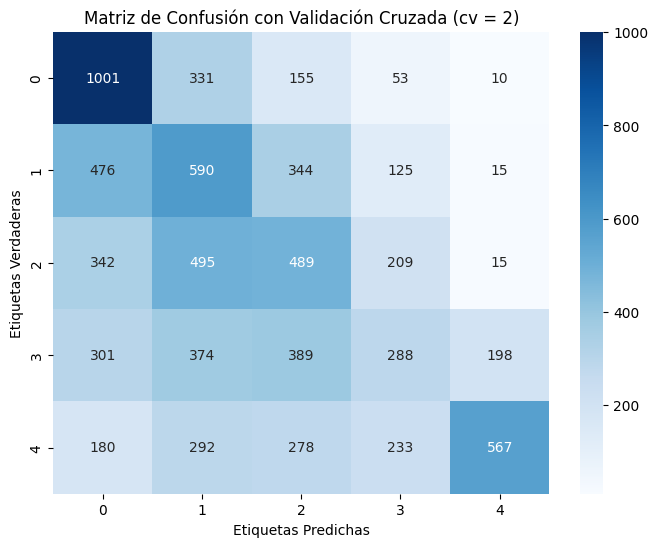

Exactitud media: 0.37870967741935485
Precisión media: 0.4071190952300038
Recall media: 0.37870967741935485
Puntuación F1 media: 0.373180719085036
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_3.png


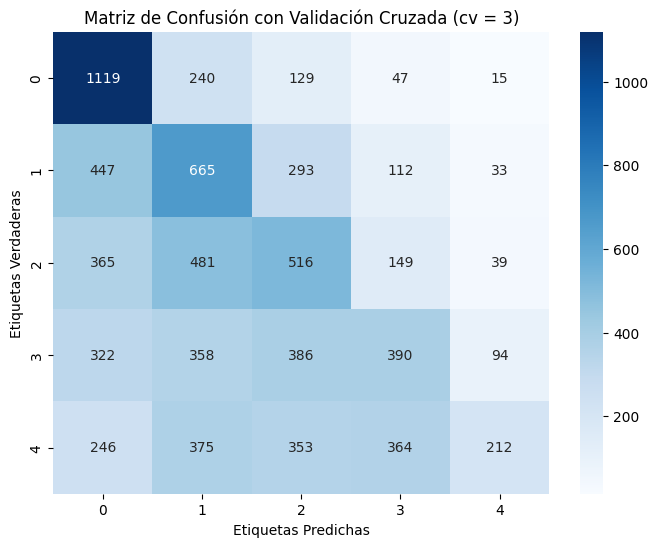

Exactitud media: 0.3744516129032258
Precisión media: 0.3951941076669694
Recall media: 0.3744516129032258
Puntuación F1 media: 0.35037366594744307
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_4.png


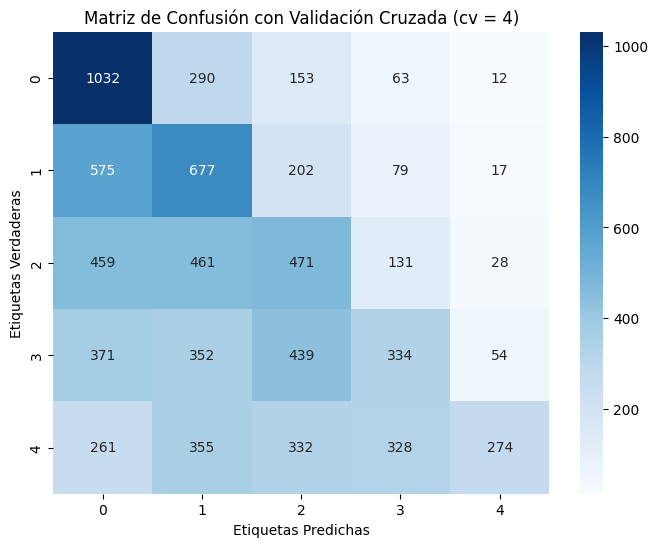

Exactitud media: 0.35974193548387096
Precisión media: 0.4126874262831241
Recall media: 0.35974193548387096
Puntuación F1 media: 0.34093219303554667
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_5.png


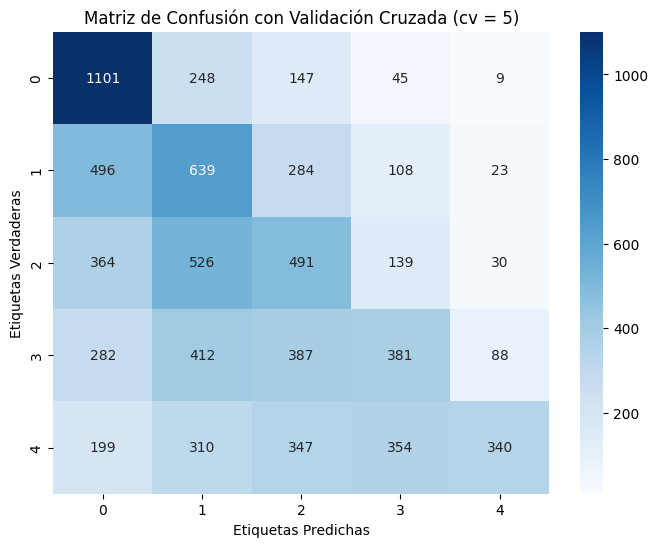

Exactitud media: 0.38090322580645164
Precisión media: 0.4223031914483647
Recall media: 0.38090322580645164
Puntuación F1 media: 0.3667482578815491
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_6.png


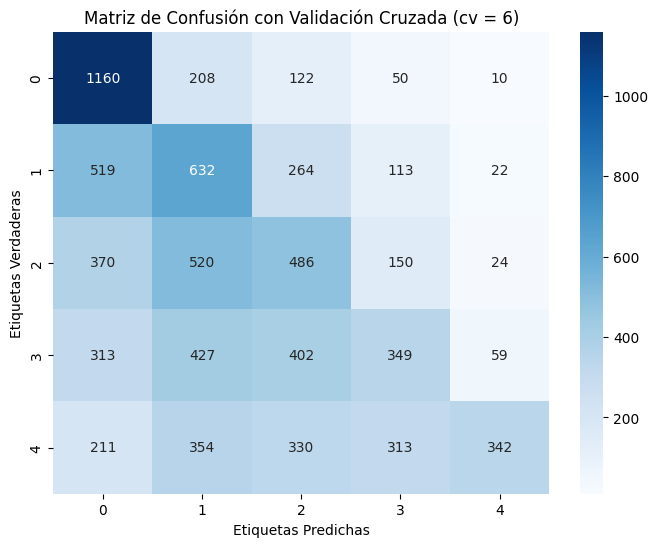

Exactitud media: 0.3830967741935484
Precisión media: 0.43106497264096894
Recall media: 0.3830967741935484
Puntuación F1 media: 0.36611491836330234
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_7.png


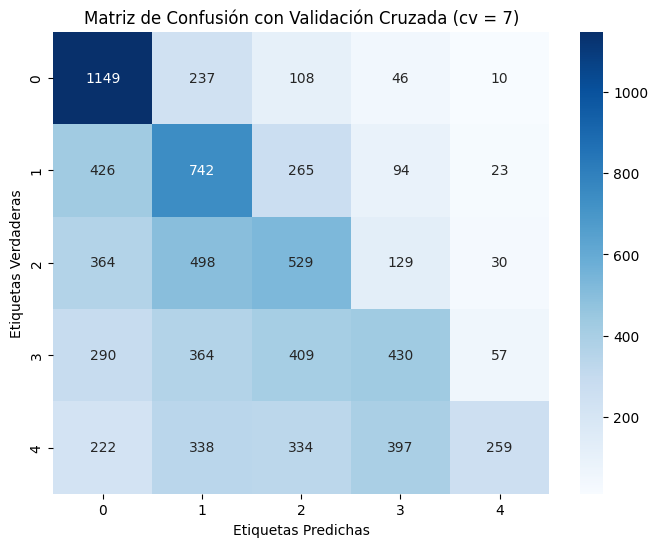

Exactitud media: 0.40116129032258063
Precisión media: 0.44132100954112946
Recall media: 0.40116129032258063
Puntuación F1 media: 0.37940251121137725
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_8.png


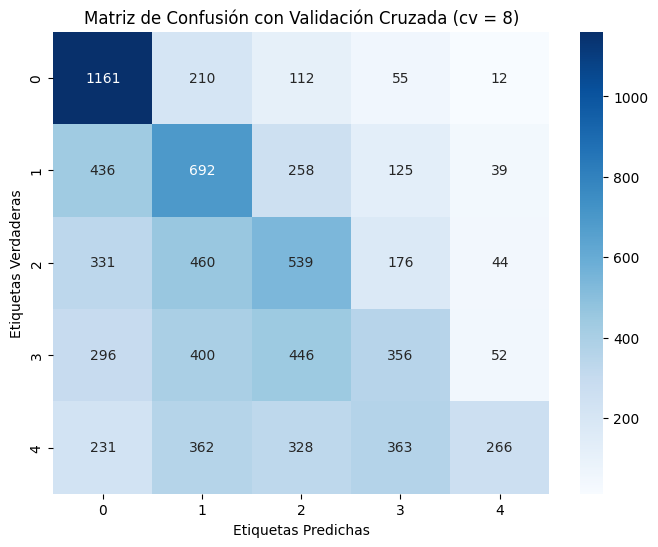

Exactitud media: 0.3889032258064516
Precisión media: 0.4188409650978859
Recall media: 0.3889032258064516
Puntuación F1 media: 0.36643294210173993
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_9.png


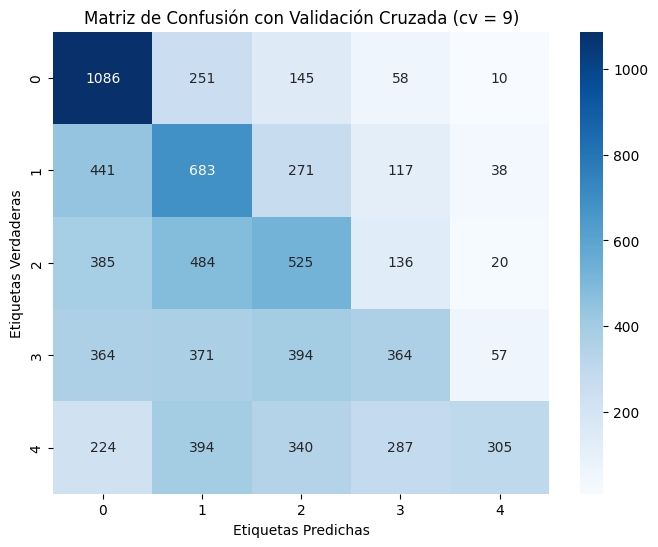

Exactitud media: 0.3823225806451613
Precisión media: 0.42967714680175917
Recall media: 0.3823225806451613
Puntuación F1 media: 0.3651385891976978
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_2_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_2_estimators/matriz_confusion_cv_10.png


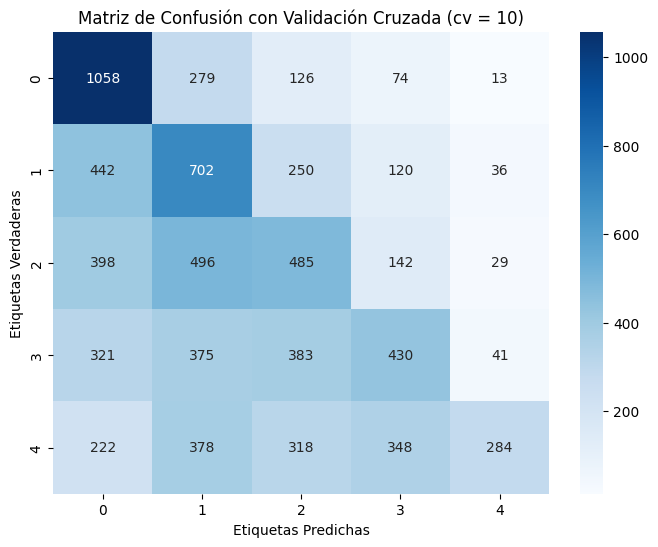

Exactitud media: 0.3818064516129032
Precisión media: 0.4298875076360231
Recall media: 0.3818064516129032
Puntuación F1 media: 0.3653951199732136
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_2_estimators/random_forest_glove_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_sim_3_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.1.png


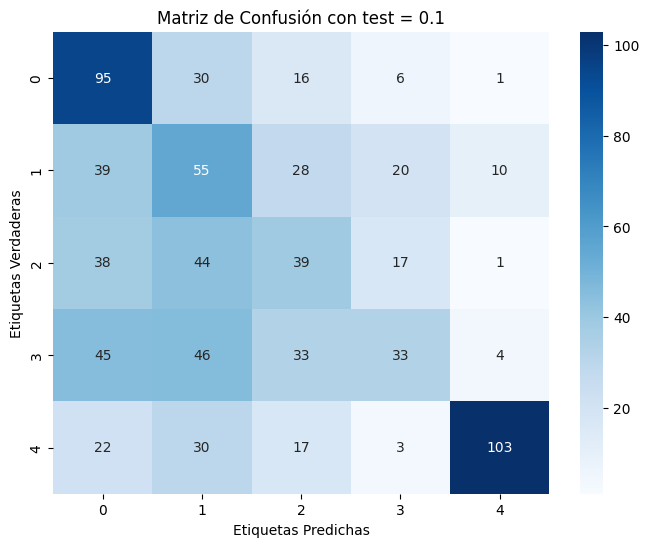

Exactitud del modelo: 0.41935483870967744
Precisión del modelo: 0.4633446335177032
Recall del modelo: 0.41935483870967744
Puntuación F1 del modelo: 0.42096848301711287
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.2.png


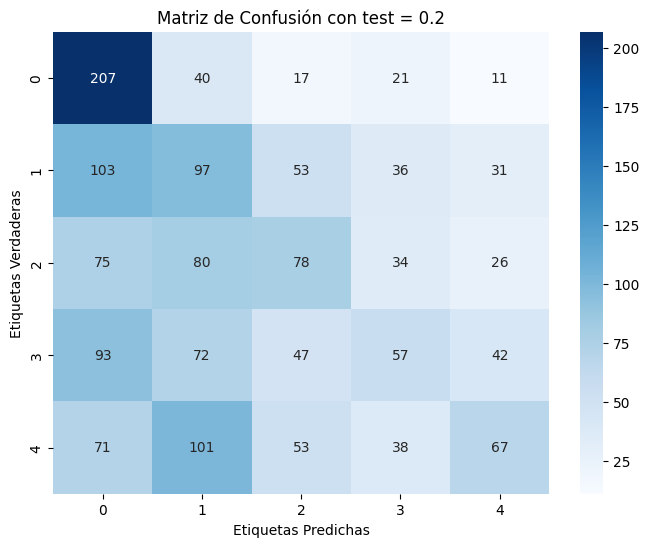

Exactitud del modelo: 0.32645161290322583
Precisión del modelo: 0.32488466620866824
Recall del modelo: 0.32645161290322583
Puntuación F1 del modelo: 0.3067755104166464
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.3.png


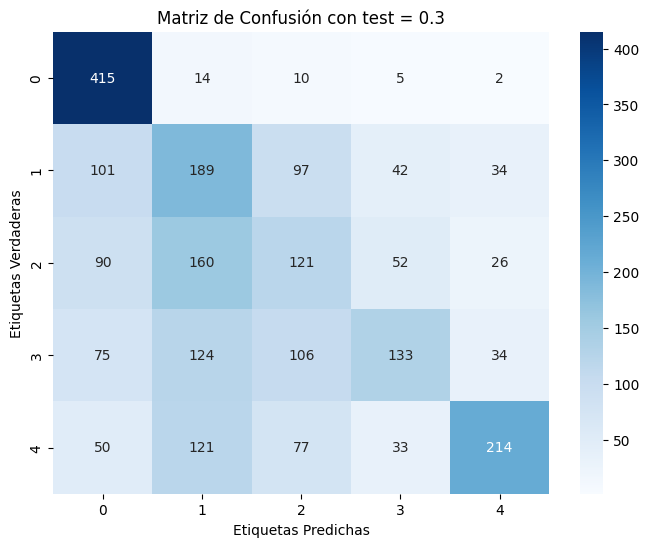

Exactitud del modelo: 0.4610752688172043
Precisión del modelo: 0.47652243983755455
Recall del modelo: 0.4610752688172043
Puntuación F1 del modelo: 0.446367899203003
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.4.png


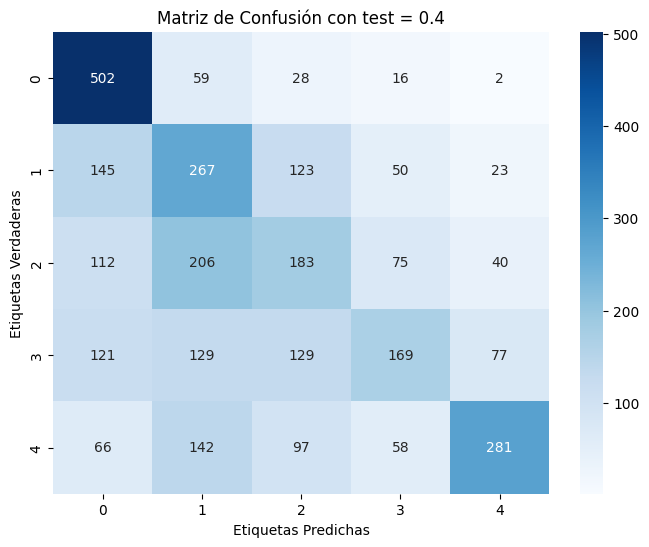

Exactitud del modelo: 0.45225806451612904
Precisión del modelo: 0.46464678920580577
Recall del modelo: 0.45225806451612904
Puntuación F1 del modelo: 0.44070175157832836
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.5.png


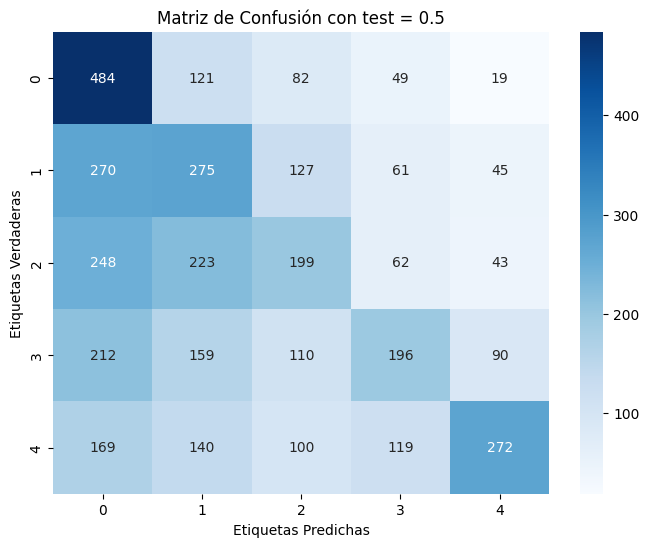

Exactitud del modelo: 0.368
Precisión del modelo: 0.39212762474470503
Recall del modelo: 0.368
Puntuación F1 del modelo: 0.36084457982898427
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.6.png


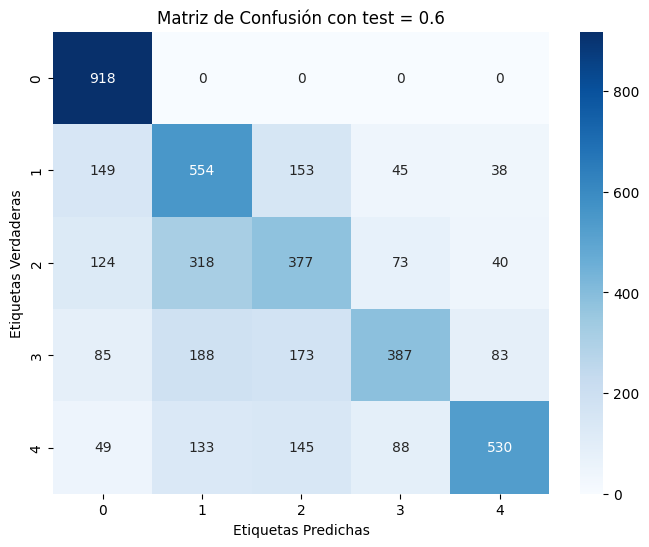

Exactitud del modelo: 0.5948387096774194
Precisión del modelo: 0.6040912771943554
Recall del modelo: 0.5948387096774194
Puntuación F1 del modelo: 0.5841586980265673
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.7.png


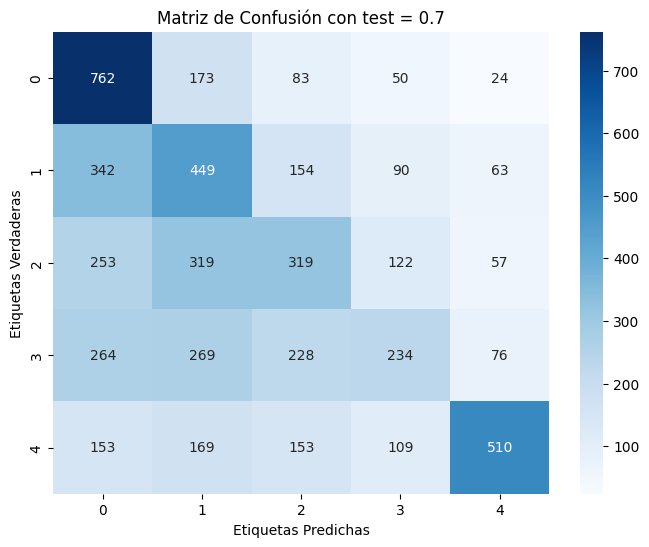

Exactitud del modelo: 0.4191705069124424
Precisión del modelo: 0.43675228269624794
Recall del modelo: 0.4191705069124424
Puntuación F1 del modelo: 0.4110072592494312
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.8.png


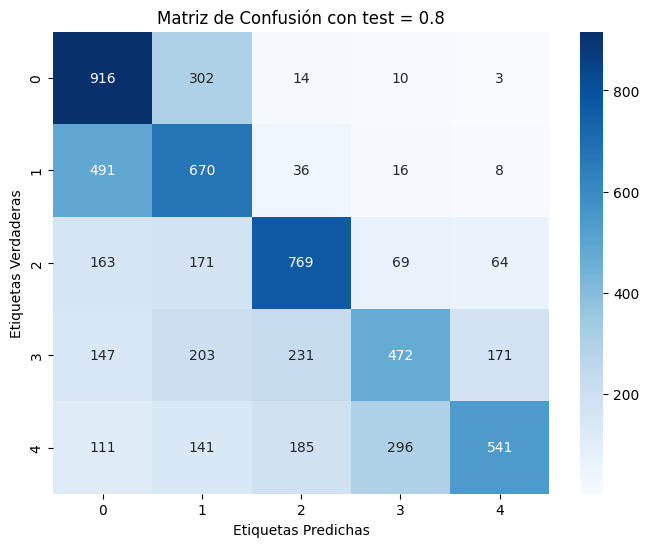

Exactitud del modelo: 0.5432258064516129
Precisión del modelo: 0.5627174311651629
Recall del modelo: 0.5432258064516129
Puntuación F1 del modelo: 0.538418894206097
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.9.png


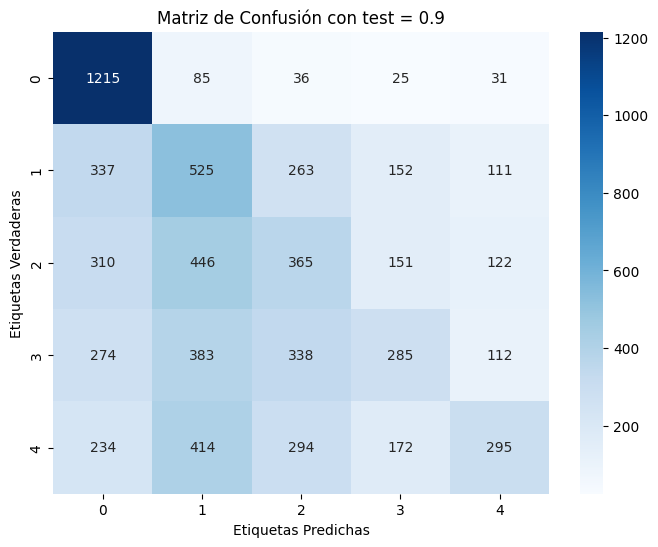

Exactitud del modelo: 0.3849462365591398
Precisión del modelo: 0.37624467041710324
Recall del modelo: 0.3849462365591398
Puntuación F1 del modelo: 0.35716778620760103
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_3_estimators/random_forest_glove_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_cruz_3_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_2.png


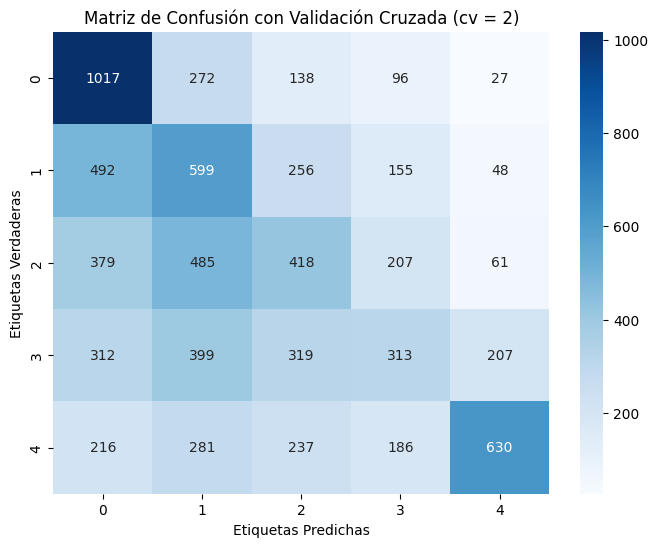

Exactitud media: 0.3841290322580645
Precisión media: 0.3990498683221107
Recall media: 0.3841290322580645
Puntuación F1 media: 0.3765080356987378
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_3.png


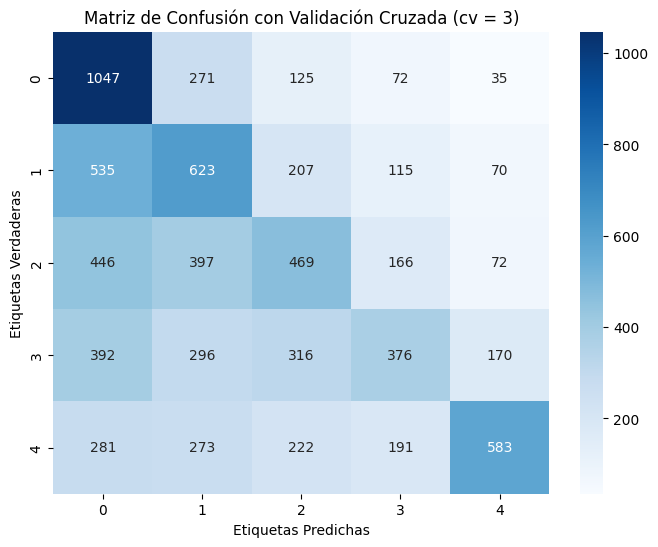

Exactitud media: 0.399741935483871
Precisión media: 0.42168384156230376
Recall media: 0.399741935483871
Puntuación F1 media: 0.39145608497634266
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_4.png


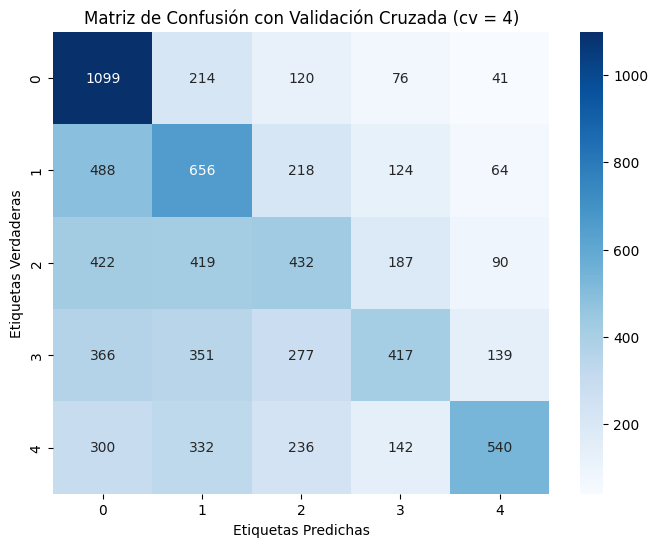

Exactitud media: 0.4056774193548387
Precisión media: 0.42777230184102055
Recall media: 0.4056774193548387
Puntuación F1 media: 0.3954817056964087
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_5.png


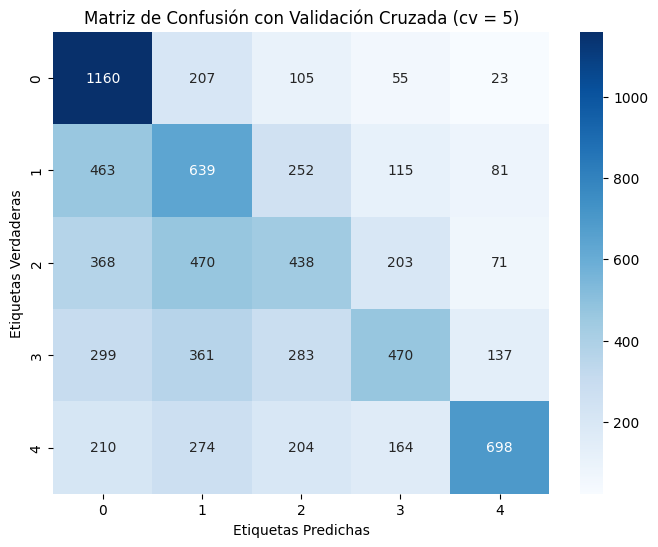

Exactitud media: 0.4393548387096774
Precisión media: 0.45819999829142855
Recall media: 0.4393548387096774
Puntuación F1 media: 0.4320261806361861
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_6.png


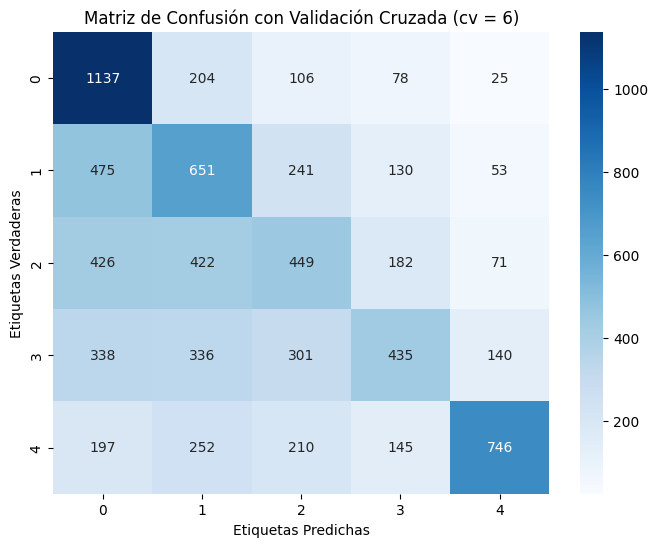

Exactitud media: 0.4410322580645161
Precisión media: 0.4607439297173067
Recall media: 0.4410322580645161
Puntuación F1 media: 0.4339058235954619
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_7.png


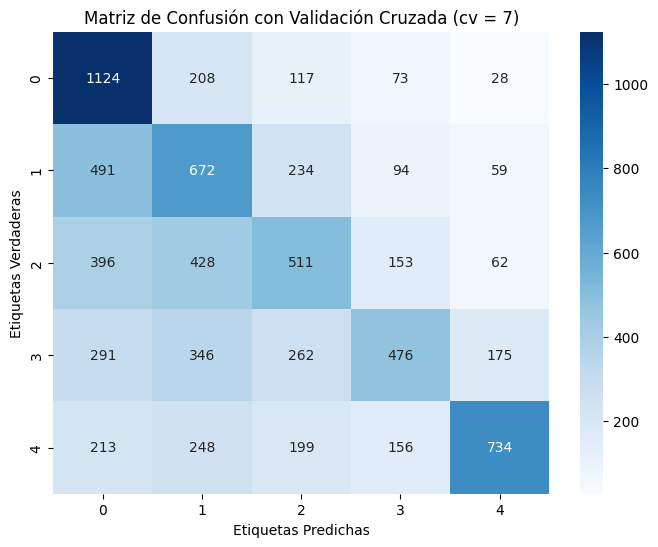

Exactitud media: 0.4538064516129032
Precisión media: 0.47604719857858213
Recall media: 0.4538064516129032
Puntuación F1 media: 0.44829156096049544
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_8.png


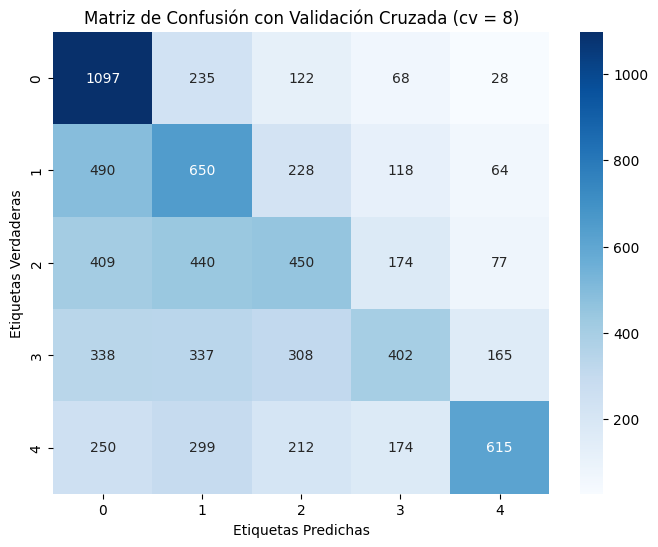

Exactitud media: 0.4147096774193548
Precisión media: 0.4348891985359157
Recall media: 0.4147096774193548
Puntuación F1 media: 0.40603651287470127
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_9.png


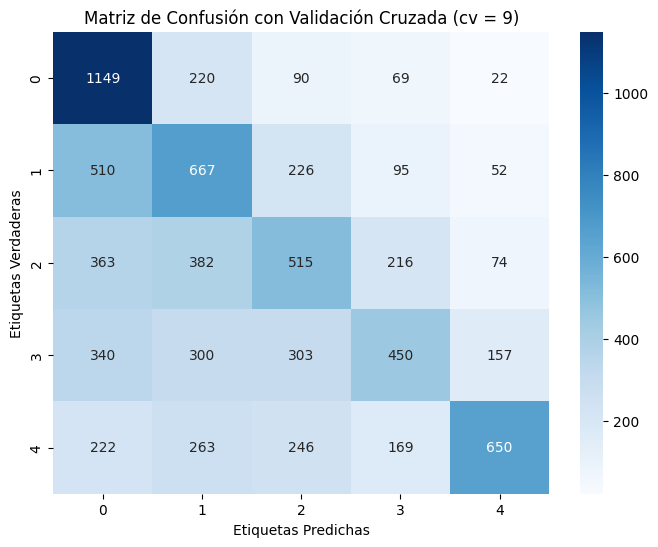

Exactitud media: 0.44270967741935485
Precisión media: 0.46260190813112667
Recall media: 0.44270967741935485
Puntuación F1 media: 0.4347793588714729
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_10.png


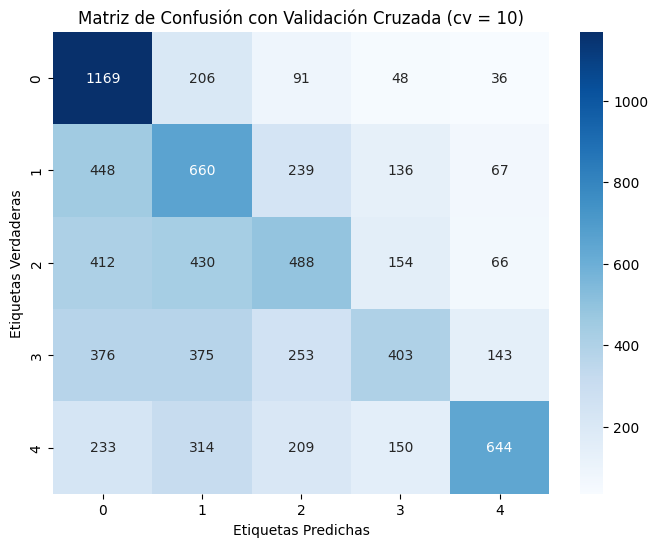

Exactitud media: 0.43406451612903224
Precisión media: 0.45656467944794554
Recall media: 0.43406451612903224
Puntuación F1 media: 0.4241411638236958
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_3_estimators/random_forest_glove_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_sim_4_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.1.png


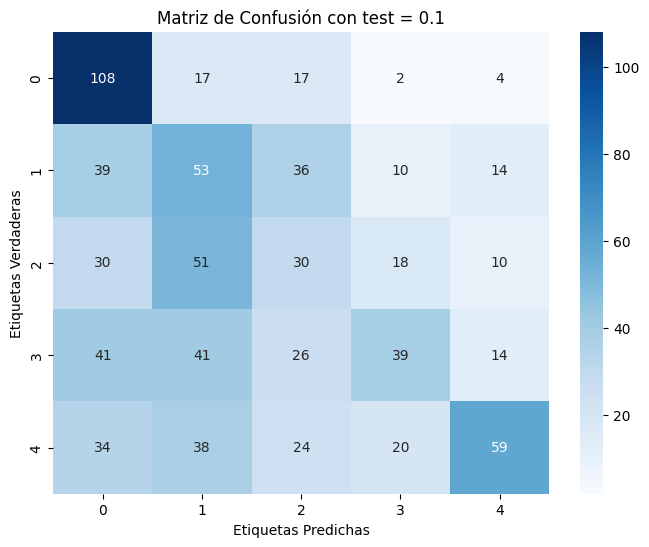

Exactitud del modelo: 0.37290322580645163
Precisión del modelo: 0.39721321220290073
Recall del modelo: 0.37290322580645163
Puntuación F1 del modelo: 0.36310365491396096
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.2.png


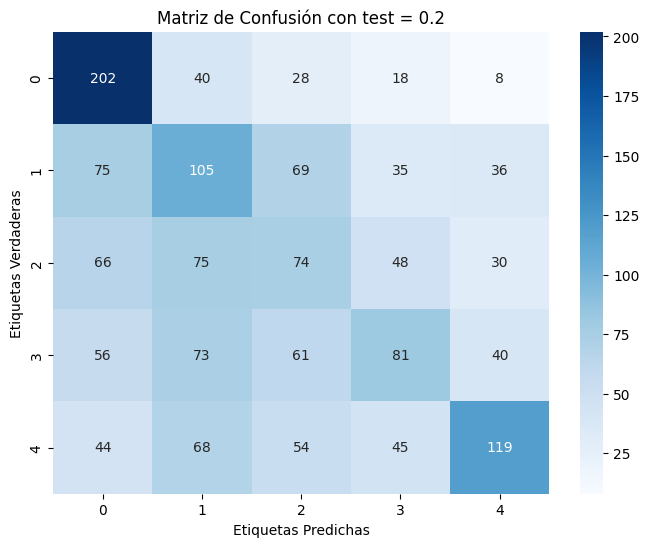

Exactitud del modelo: 0.37483870967741933
Precisión del modelo: 0.376368371933305
Recall del modelo: 0.37483870967741933
Puntuación F1 del modelo: 0.3668007989476911
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.3.png


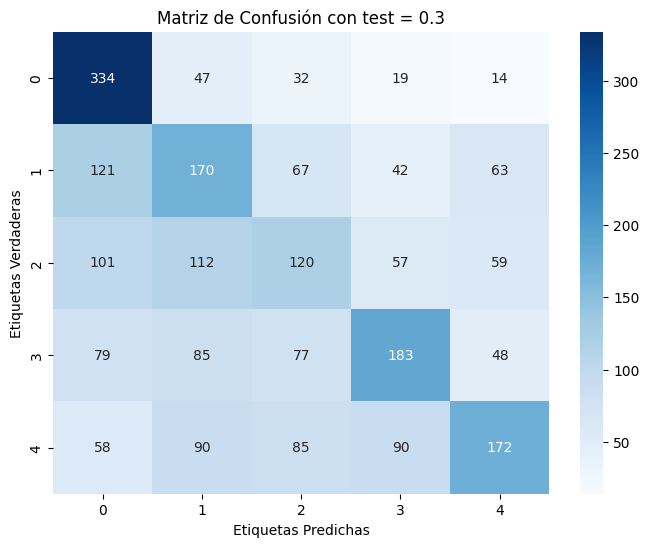

Exactitud del modelo: 0.4210752688172043
Precisión del modelo: 0.41832731785584426
Recall del modelo: 0.4210752688172043
Puntuación F1 del modelo: 0.41052189283492935
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.4.png


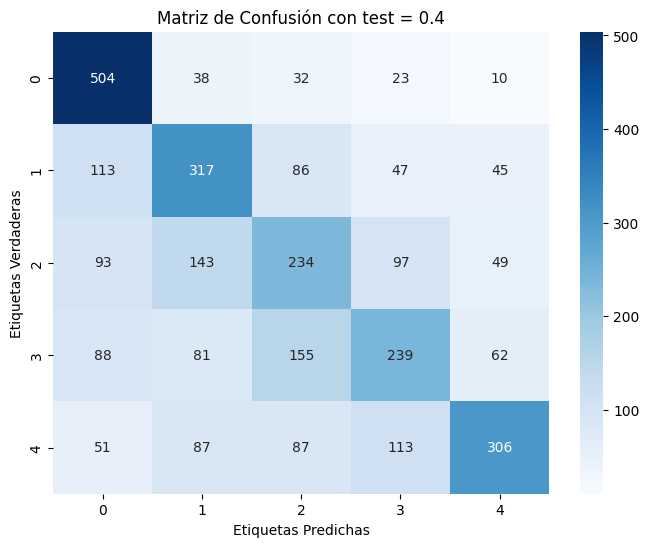

Exactitud del modelo: 0.5161290322580645
Precisión del modelo: 0.51539382560343
Recall del modelo: 0.5161290322580645
Puntuación F1 del modelo: 0.5081806447603237
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.5.png


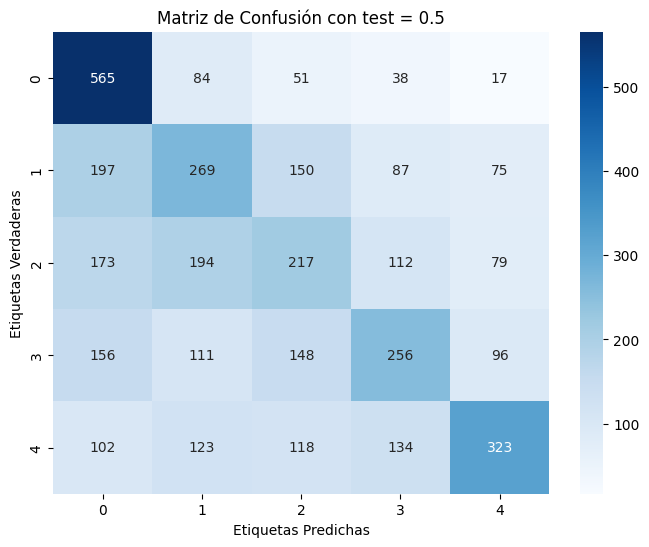

Exactitud del modelo: 0.4206451612903226
Precisión del modelo: 0.41871709442382304
Recall del modelo: 0.4206451612903226
Puntuación F1 del modelo: 0.41044844728283547
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.6.png


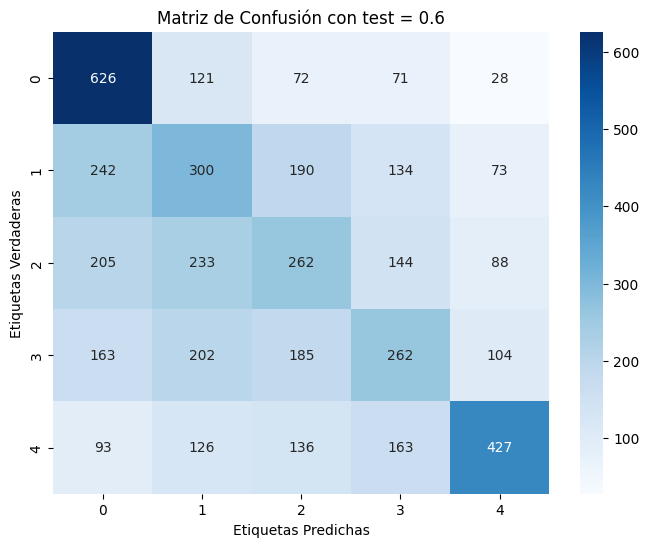

Exactitud del modelo: 0.4036559139784946
Precisión del modelo: 0.40403219262827406
Recall del modelo: 0.4036559139784946
Puntuación F1 del modelo: 0.3974896528299759
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.7.png


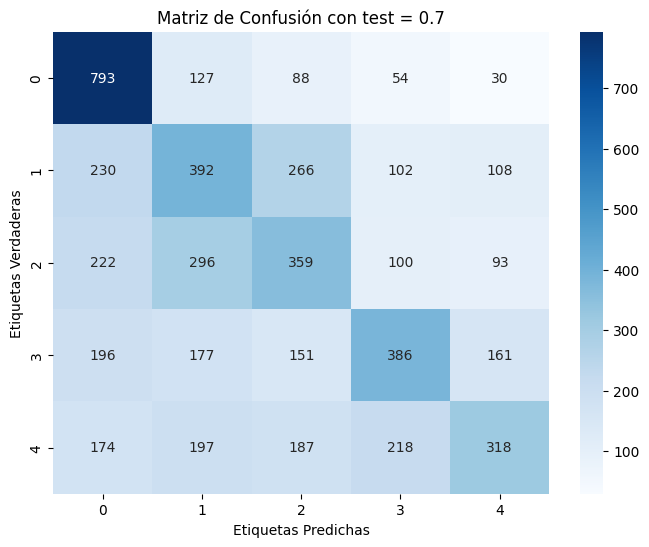

Exactitud del modelo: 0.4143778801843318
Precisión del modelo: 0.4118667975337868
Recall del modelo: 0.4143778801843318
Puntuación F1 del modelo: 0.40410619501872125
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.8.png


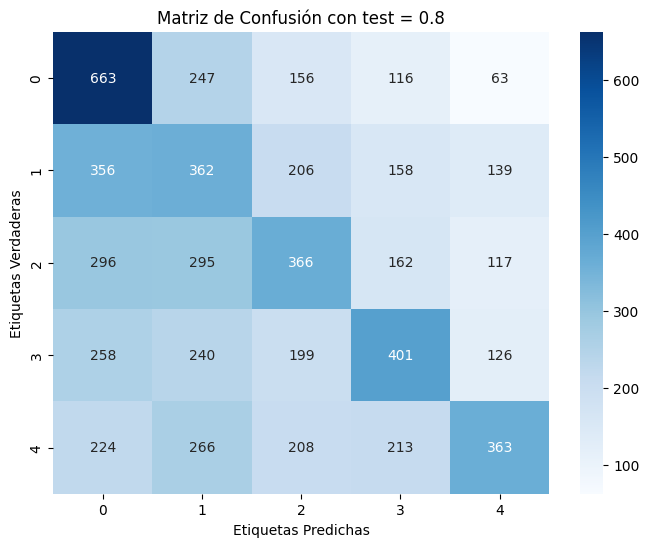

Exactitud del modelo: 0.34758064516129034
Precisión del modelo: 0.35664382505168246
Recall del modelo: 0.34758064516129034
Puntuación F1 del modelo: 0.34454997621518935
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.9.png


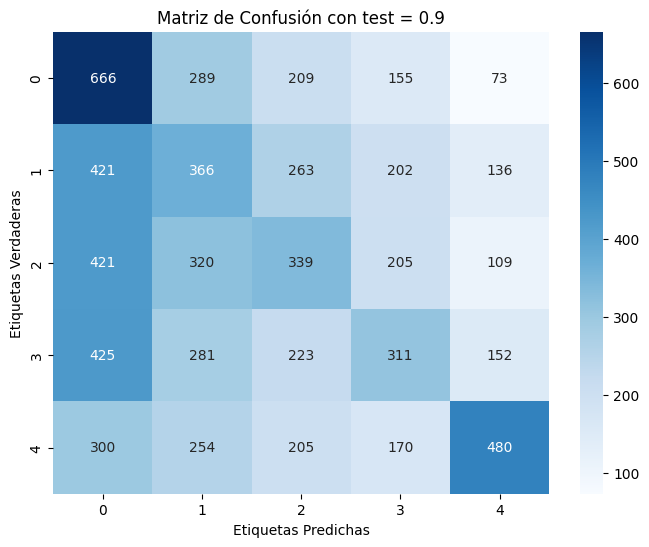

Exactitud del modelo: 0.3099641577060932
Precisión del modelo: 0.32401250157125927
Recall del modelo: 0.3099641577060932
Puntuación F1 del modelo: 0.3082446595912115
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_4_estimators/random_forest_glove_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_cruz_4_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_2.png


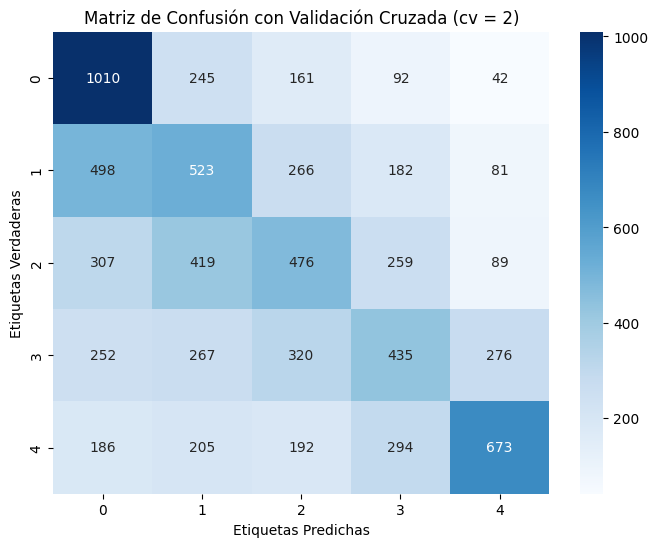

Exactitud media: 0.40219354838709676
Precisión media: 0.40486014808284154
Recall media: 0.40219354838709676
Puntuación F1 media: 0.39681624100275886
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_3.png


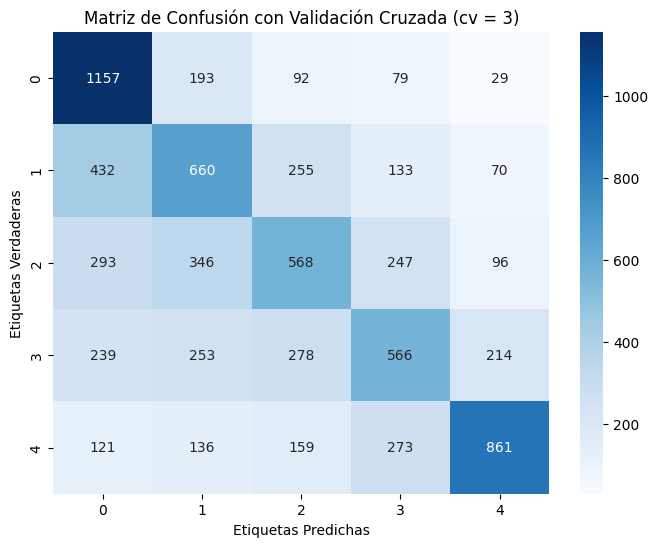

Exactitud media: 0.4918709677419355
Precisión media: 0.4931601578800555
Recall media: 0.4918709677419355
Puntuación F1 media: 0.4860893081271585
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_4.png


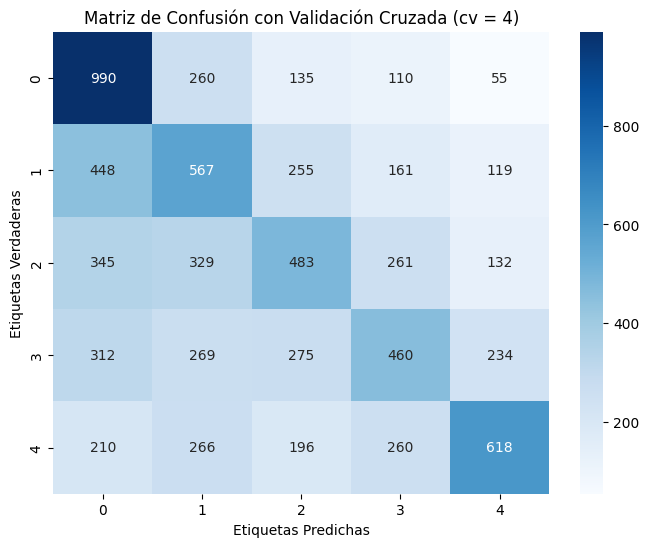

Exactitud media: 0.4023225806451613
Precisión media: 0.4050543070338181
Recall media: 0.4023225806451613
Puntuación F1 media: 0.39641341015352527
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_5.png


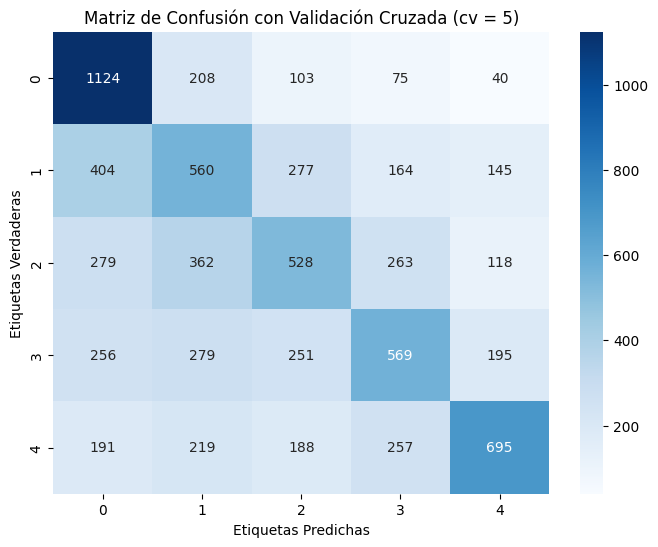

Exactitud media: 0.44851612903225807
Precisión media: 0.4491320754281166
Recall media: 0.44851612903225807
Puntuación F1 media: 0.44201054649746324
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_6.png


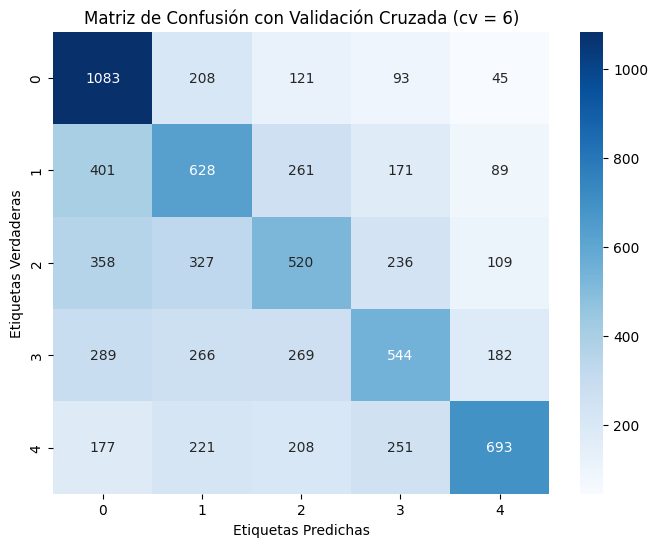

Exactitud media: 0.44748387096774195
Precisión media: 0.45337248941612285
Recall media: 0.44748387096774195
Puntuación F1 media: 0.44218326906887084
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_7.png


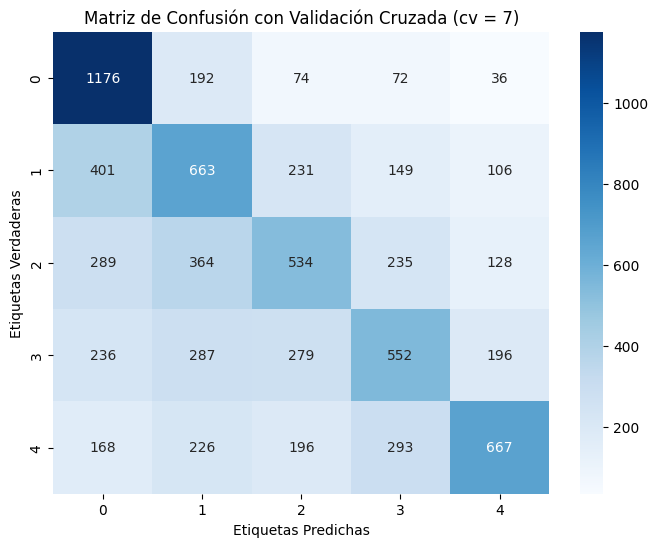

Exactitud media: 0.46348387096774196
Precisión media: 0.464048078675789
Recall media: 0.46348387096774196
Puntuación F1 media: 0.455414188746612
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_8.png


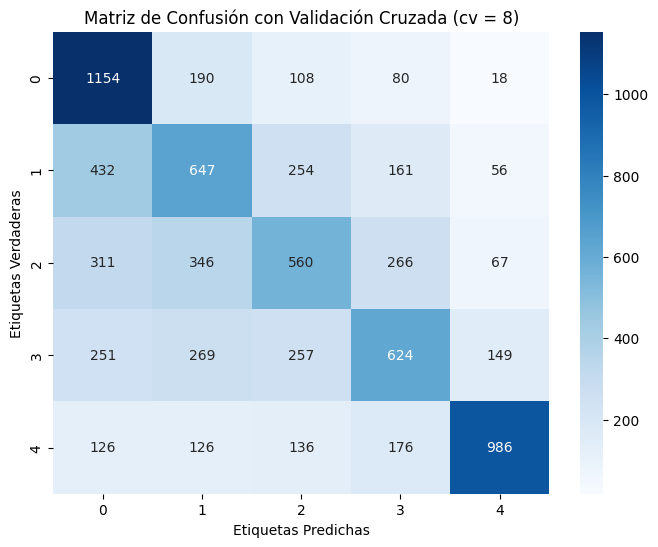

Exactitud media: 0.5123870967741936
Precisión media: 0.5187001002177704
Recall media: 0.5123870967741936
Puntuación F1 media: 0.5085584467217864
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_9.png


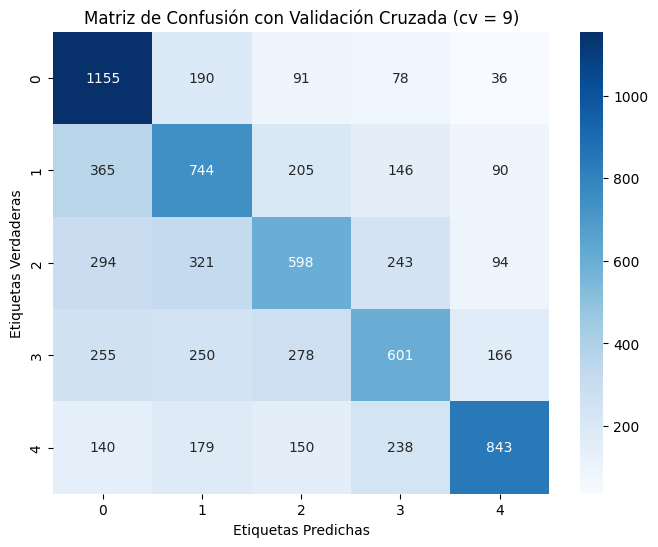

Exactitud media: 0.5085161290322581
Precisión media: 0.5126236925885947
Recall media: 0.5085161290322581
Puntuación F1 media: 0.5037264799407324
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_10.png


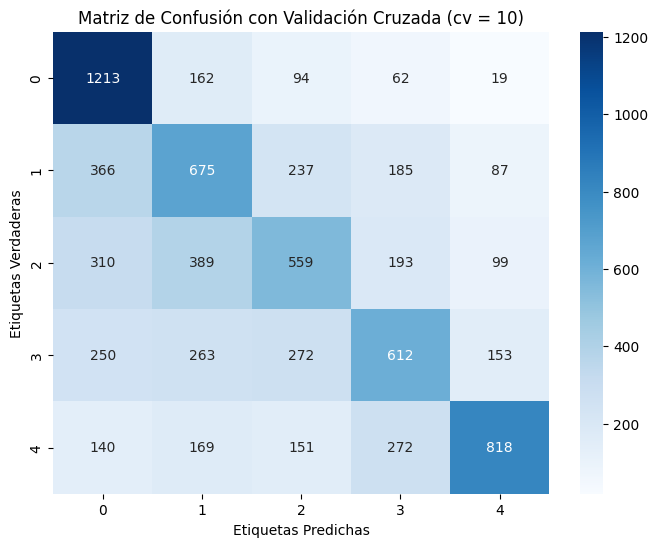

Exactitud media: 0.5002580645161291
Precisión media: 0.5045848901631599
Recall media: 0.5002580645161291
Puntuación F1 media: 0.4941884423262717
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_4_estimators/random_forest_glove_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_sim_5_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.1.png


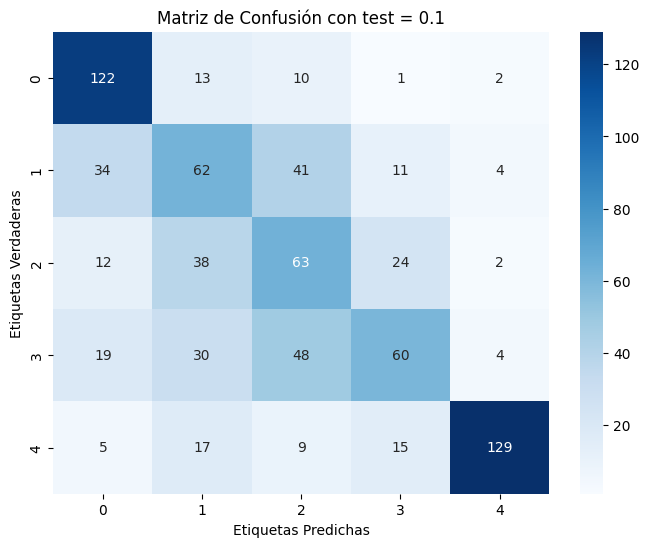

Exactitud del modelo: 0.5625806451612904
Precisión del modelo: 0.5823040038557504
Recall del modelo: 0.5625806451612904
Puntuación F1 del modelo: 0.5639070373030143
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.2.png


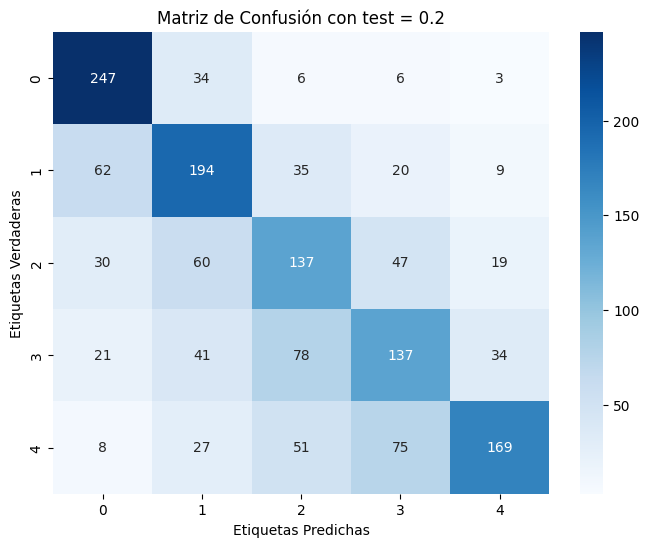

Exactitud del modelo: 0.5703225806451613
Precisión del modelo: 0.5752515854577417
Recall del modelo: 0.5703225806451613
Puntuación F1 del modelo: 0.5667298757228322
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.3.png


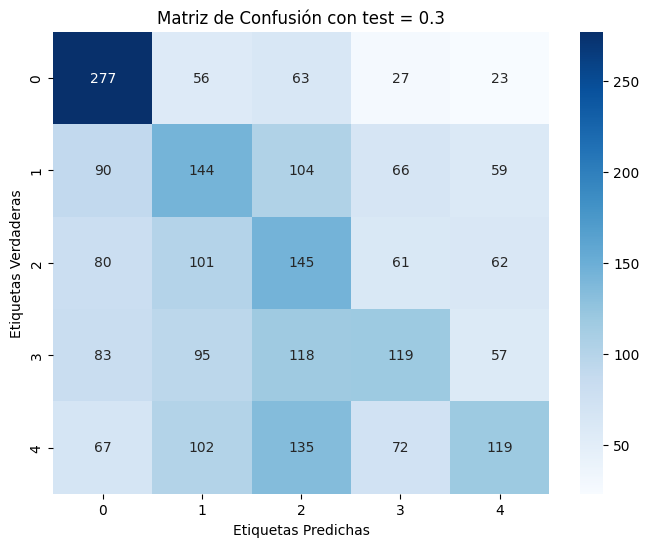

Exactitud del modelo: 0.34580645161290324
Precisión del modelo: 0.3453469041375914
Recall del modelo: 0.34580645161290324
Puntuación F1 del modelo: 0.33811415674134526
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.4.png


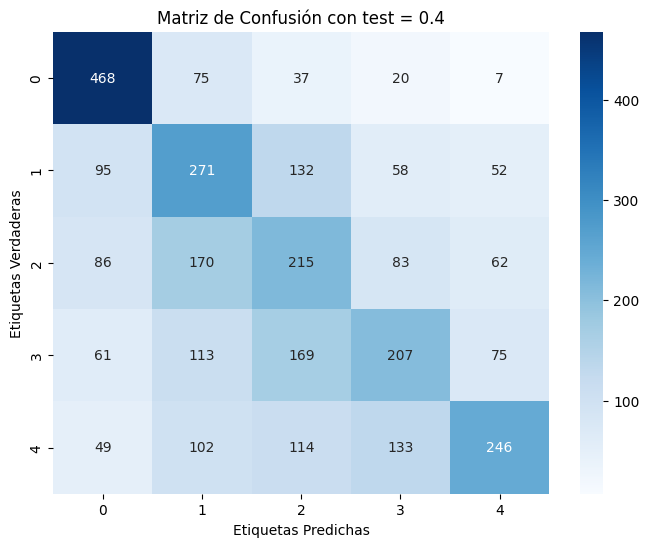

Exactitud del modelo: 0.45387096774193547
Precisión del modelo: 0.4564184169600511
Recall del modelo: 0.45387096774193547
Puntuación F1 del modelo: 0.44839876842212006
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.5.png


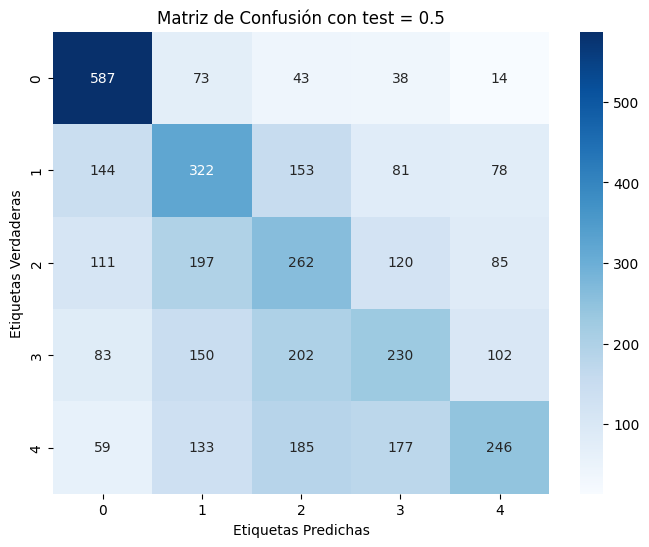

Exactitud del modelo: 0.4250322580645161
Precisión del modelo: 0.4193364532552122
Recall del modelo: 0.4250322580645161
Puntuación F1 del modelo: 0.41554501544100375
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.6.png


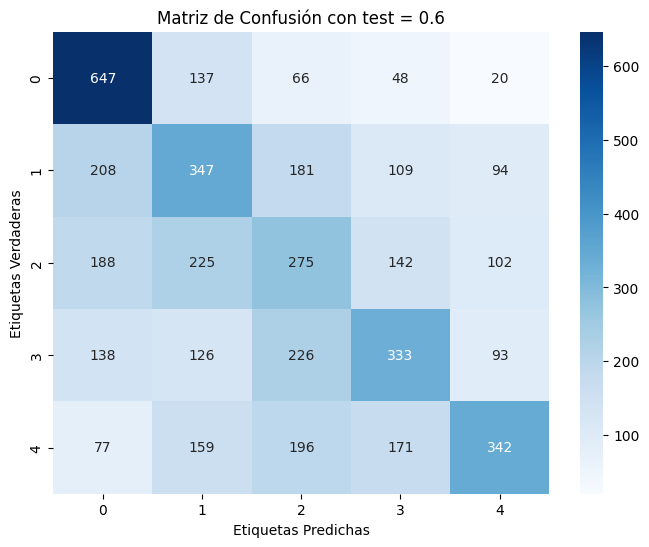

Exactitud del modelo: 0.4180645161290323
Precisión del modelo: 0.4188712488511523
Recall del modelo: 0.4180645161290323
Puntuación F1 del modelo: 0.4120782766694667
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.7.png


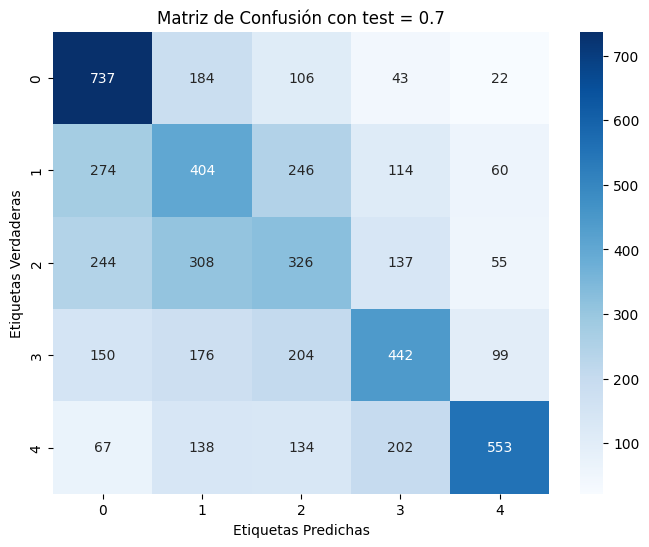

Exactitud del modelo: 0.4538248847926267
Precisión del modelo: 0.46601213191504304
Recall del modelo: 0.4538248847926267
Puntuación F1 del modelo: 0.45353738449402936
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.8.png


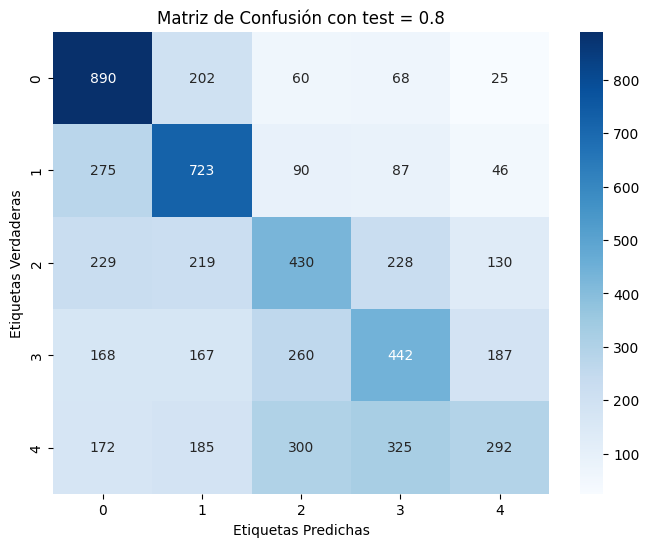

Exactitud del modelo: 0.4479032258064516
Precisión del modelo: 0.4375535939914939
Recall del modelo: 0.4479032258064516
Puntuación F1 del modelo: 0.4318784114118951
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.9.png


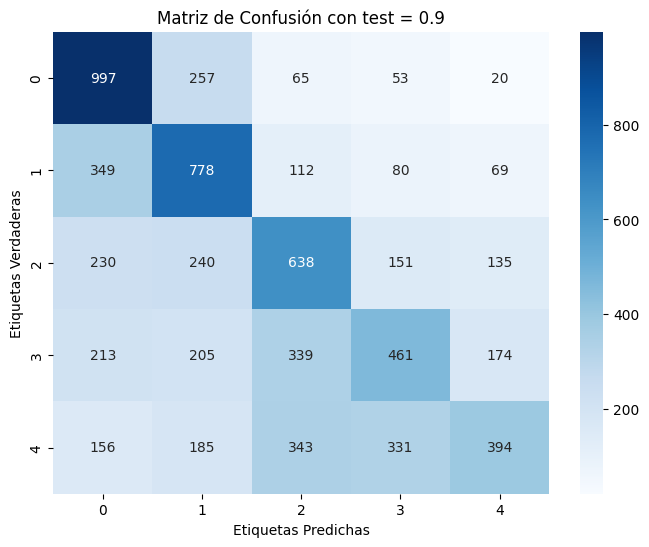

Exactitud del modelo: 0.4685304659498208
Precisión del modelo: 0.4664562818497649
Recall del modelo: 0.4685304659498208
Puntuación F1 del modelo: 0.4557613540527188
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_5_estimators/random_forest_glove_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_cruz_5_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_2.png


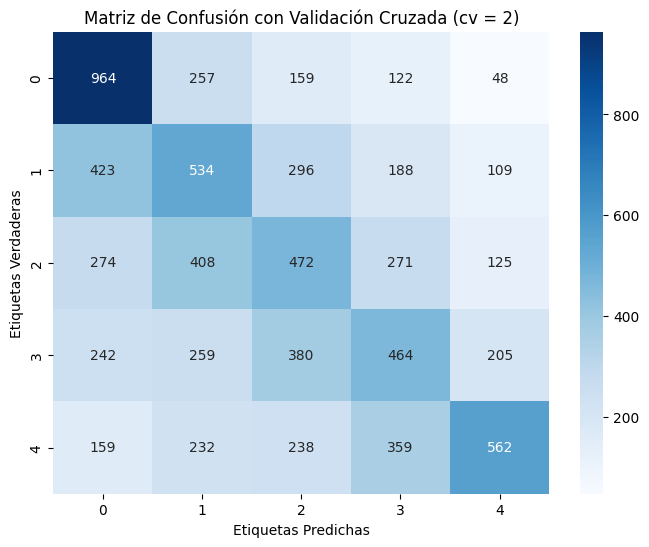

Exactitud media: 0.3865806451612903
Precisión media: 0.3910435772407118
Recall media: 0.3865806451612903
Puntuación F1 media: 0.38300766830726773
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_3.png


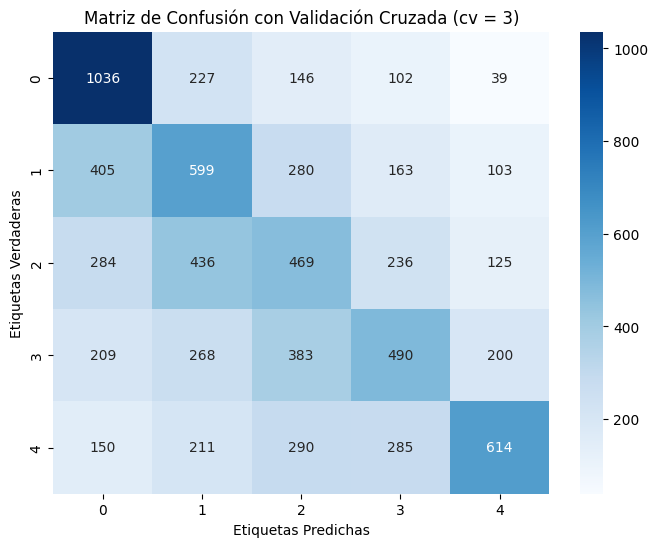

Exactitud media: 0.41393548387096774
Precisión media: 0.41845766870319173
Recall media: 0.41393548387096774
Puntuación F1 media: 0.40971003127123773
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_4.png


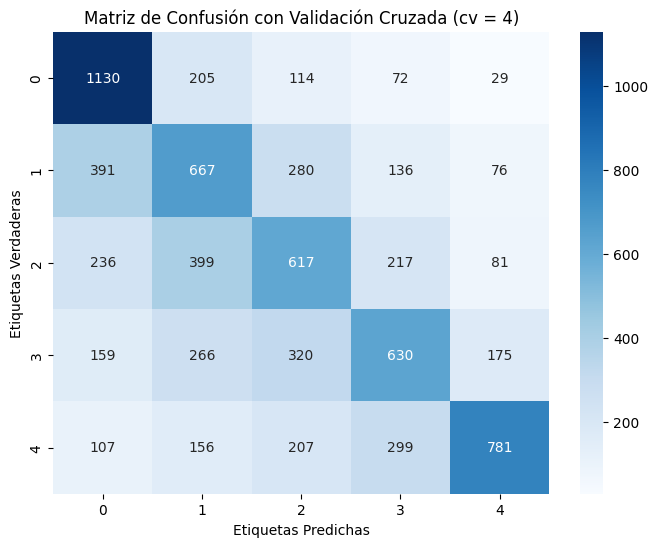

Exactitud media: 0.4935483870967742
Precisión media: 0.5005795732369769
Recall media: 0.4935483870967742
Puntuación F1 media: 0.4915205292254508
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_5.png


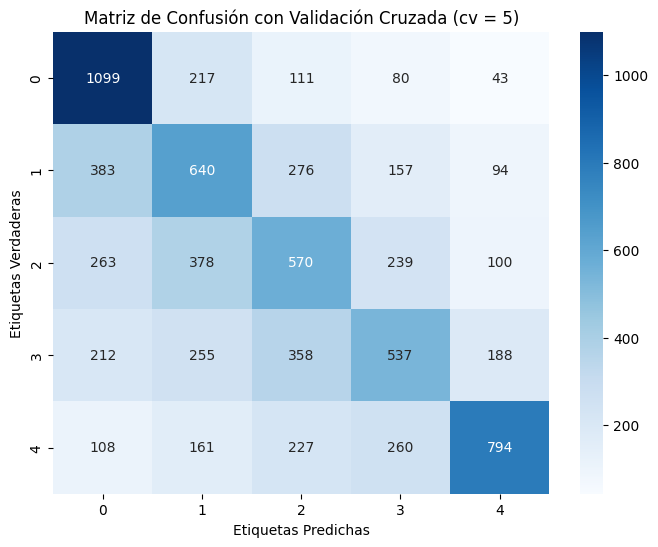

Exactitud media: 0.4696774193548387
Precisión media: 0.4725377587041832
Recall media: 0.4696774193548387
Puntuación F1 media: 0.4661058281088702
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_6.png


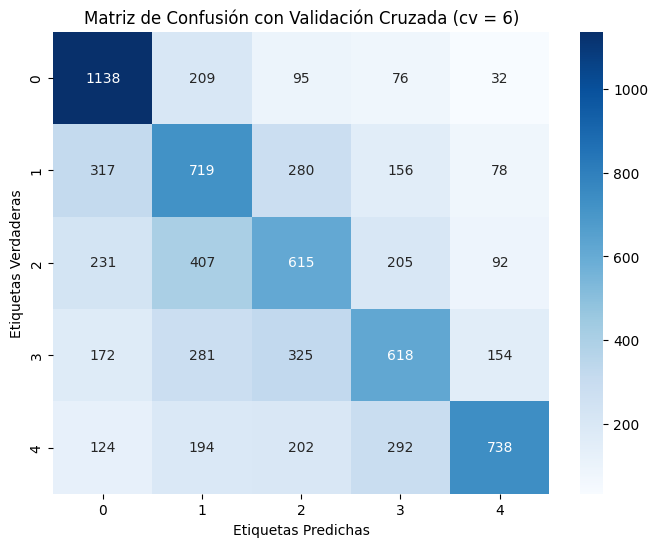

Exactitud media: 0.49393548387096775
Precisión media: 0.5020392949752798
Recall media: 0.49393548387096775
Puntuación F1 media: 0.49166140126755464
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_7.png


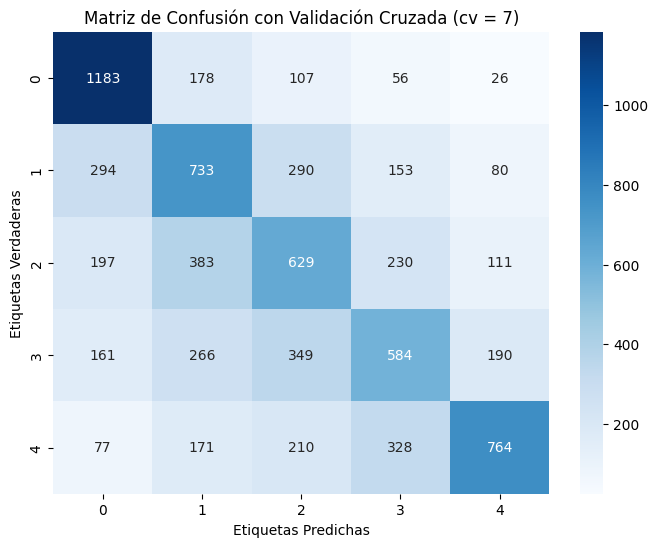

Exactitud media: 0.5023225806451613
Precisión media: 0.5047460267605531
Recall media: 0.5023225806451613
Puntuación F1 media: 0.4991377875726675
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_8.png


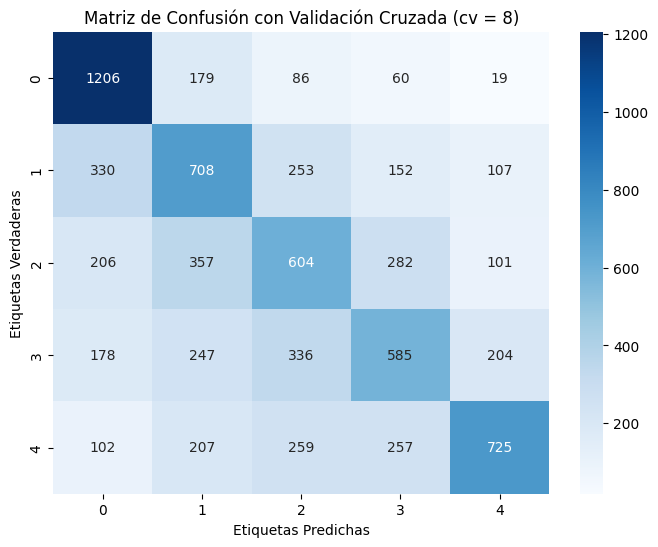

Exactitud media: 0.49393548387096775
Precisión media: 0.4942309992961821
Recall media: 0.49393548387096775
Puntuación F1 media: 0.488731186724601
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_9.png


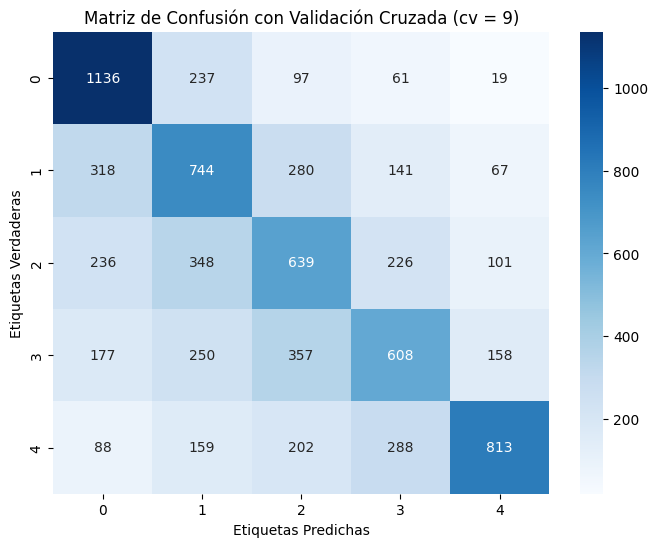

Exactitud media: 0.5083870967741936
Precisión media: 0.5152307491491956
Recall media: 0.5083870967741936
Puntuación F1 media: 0.5066556794645694
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_10.png


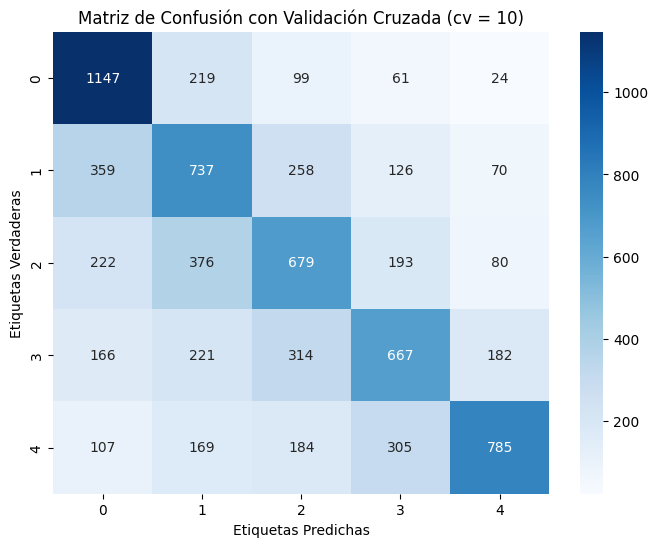

Exactitud media: 0.5180645161290323
Precisión media: 0.5250347846407022
Recall media: 0.5180645161290323
Puntuación F1 media: 0.515990128356018
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_5_estimators/random_forest_glove_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_sim_6_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.1.png


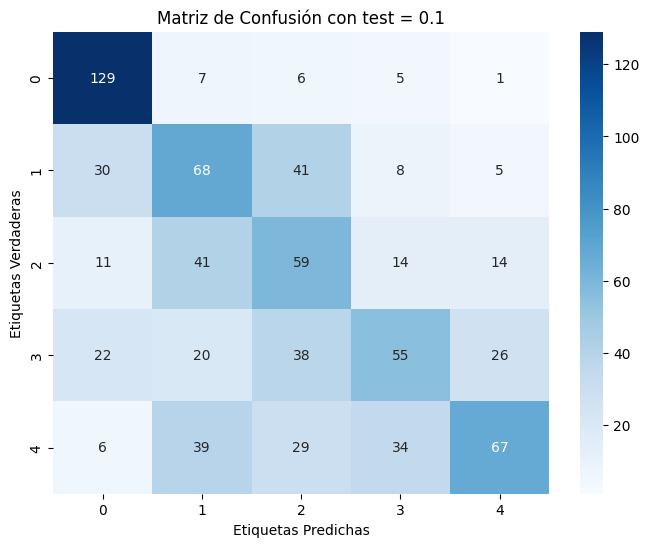

Exactitud del modelo: 0.48774193548387096
Precisión del modelo: 0.4941793454038847
Recall del modelo: 0.48774193548387096
Puntuación F1 del modelo: 0.479360837248153
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.2.png


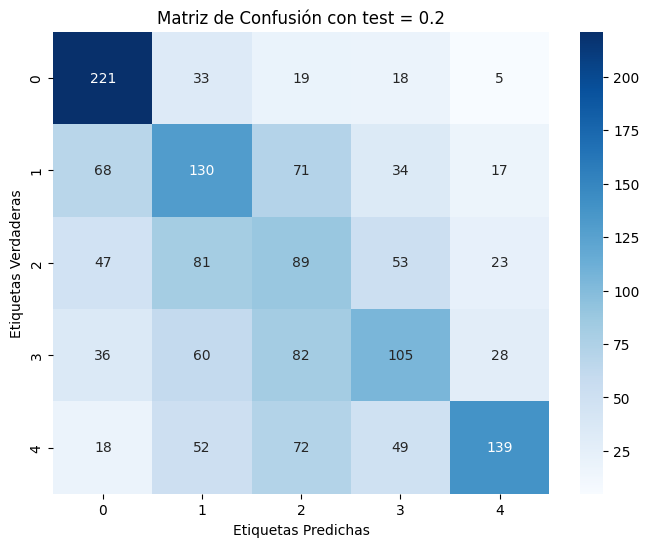

Exactitud del modelo: 0.44129032258064516
Precisión del modelo: 0.4550616650556744
Recall del modelo: 0.44129032258064516
Puntuación F1 del modelo: 0.43932139565999007
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.3.png


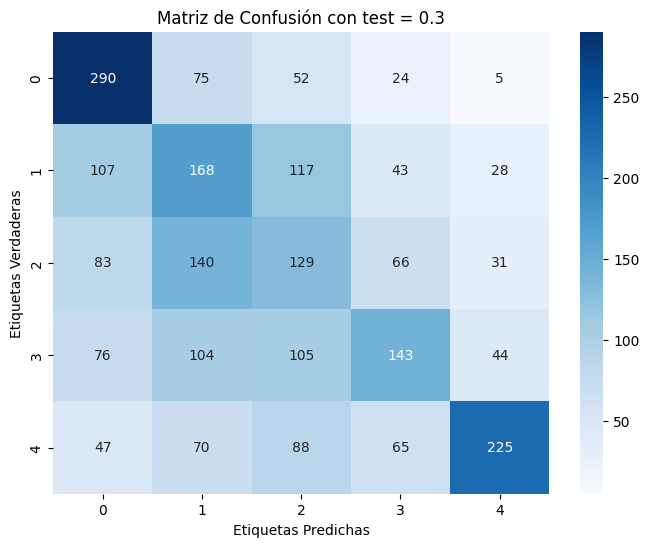

Exactitud del modelo: 0.410752688172043
Precisión del modelo: 0.4320441422374137
Recall del modelo: 0.410752688172043
Puntuación F1 del modelo: 0.4117910260809248
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.4.png


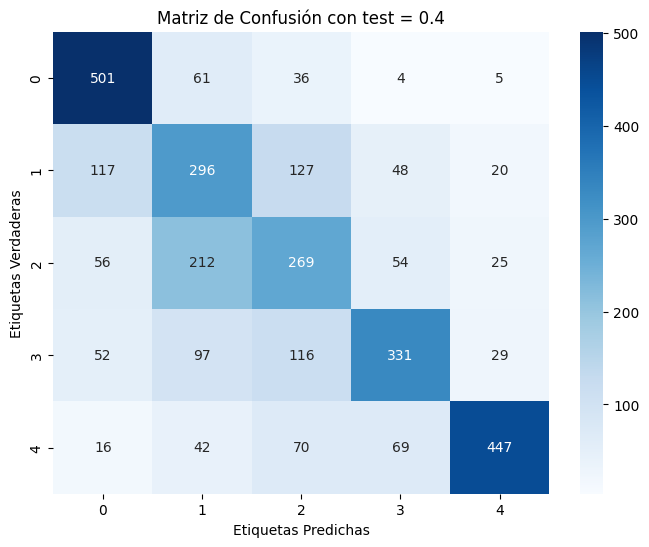

Exactitud del modelo: 0.5948387096774194
Precisión del modelo: 0.6091260287697604
Recall del modelo: 0.5948387096774194
Puntuación F1 del modelo: 0.5970462041701903
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.5.png


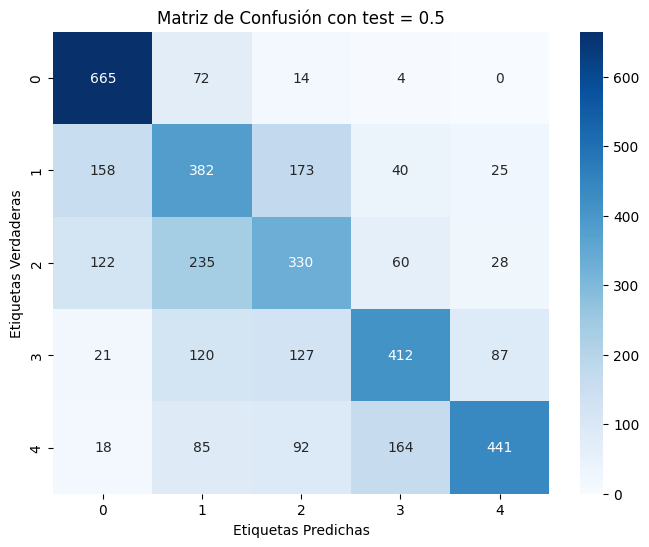

Exactitud del modelo: 0.5754838709677419
Precisión del modelo: 0.5837677210385795
Recall del modelo: 0.5754838709677419
Puntuación F1 del modelo: 0.5726838863253964
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.6.png


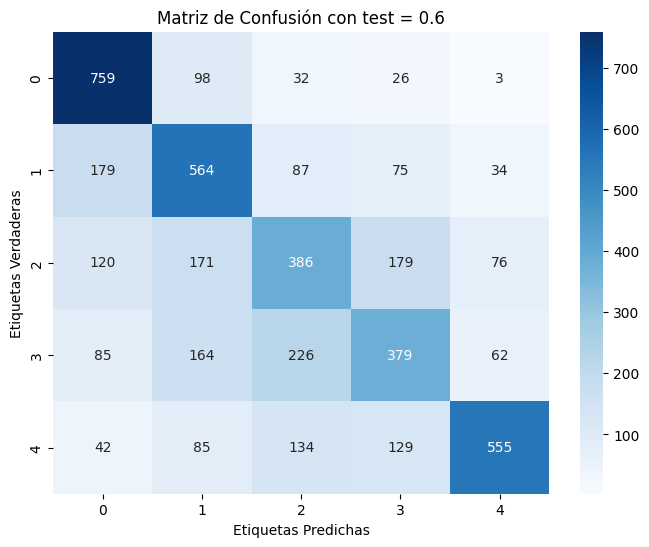

Exactitud del modelo: 0.5683870967741935
Precisión del modelo: 0.5704012238040456
Recall del modelo: 0.5683870967741935
Puntuación F1 del modelo: 0.5636192066229532
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.7.png


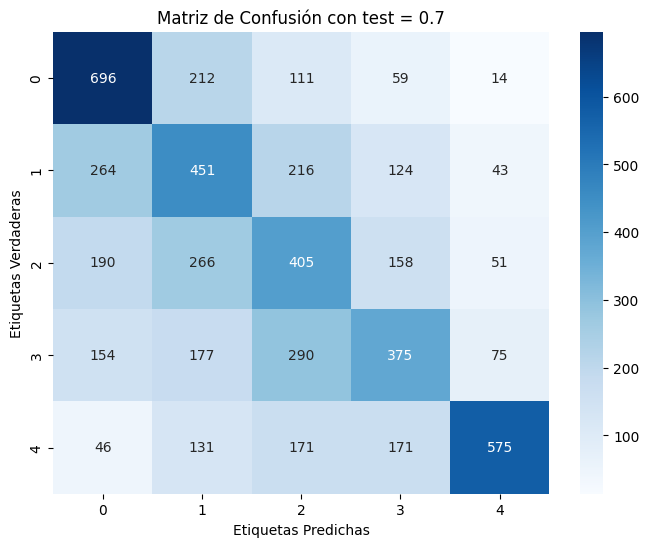

Exactitud del modelo: 0.4611981566820276
Precisión del modelo: 0.4809629320917653
Recall del modelo: 0.4611981566820276
Puntuación F1 del modelo: 0.46436242828234353
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.8.png


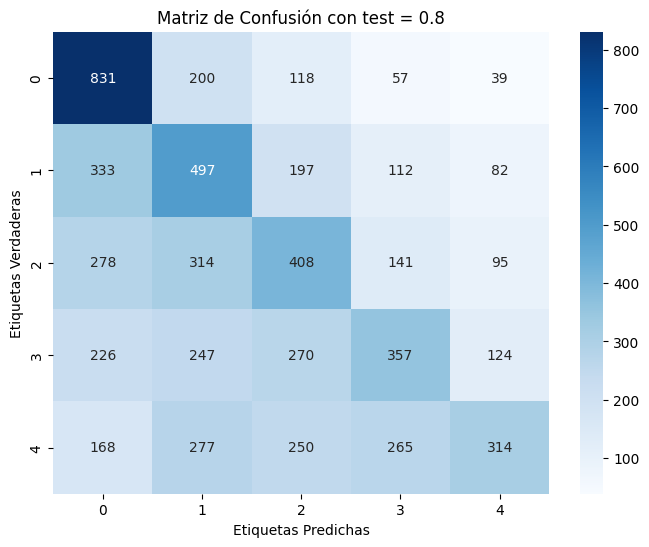

Exactitud del modelo: 0.3882258064516129
Precisión del modelo: 0.39436555030659143
Recall del modelo: 0.3882258064516129
Puntuación F1 del modelo: 0.3772815711589331
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.9.png


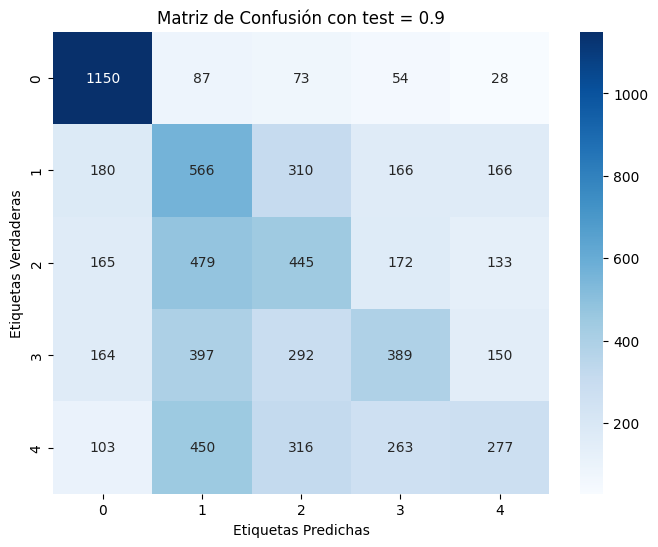

Exactitud del modelo: 0.4053046594982079
Precisión del modelo: 0.39767262814933707
Recall del modelo: 0.4053046594982079
Puntuación F1 del modelo: 0.3907658691349168
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_6_estimators/random_forest_glove_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_cruz_6_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_2.png


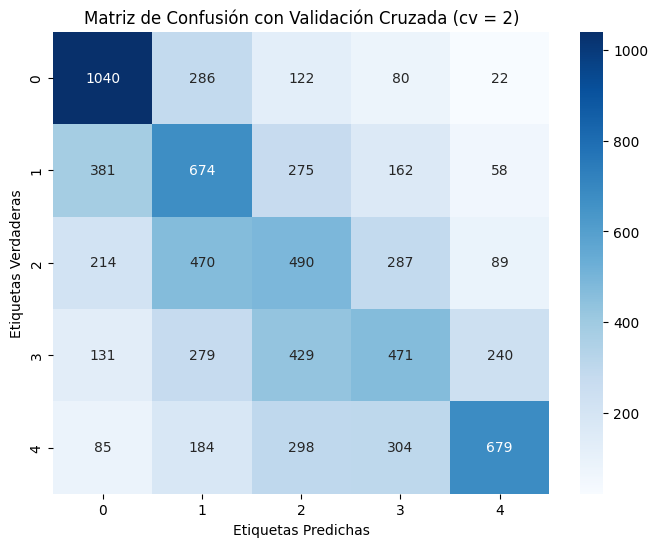

Exactitud media: 0.4327741935483871
Precisión media: 0.4413555625495815
Recall media: 0.4327741935483871
Puntuación F1 media: 0.43153707239337796
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_3.png


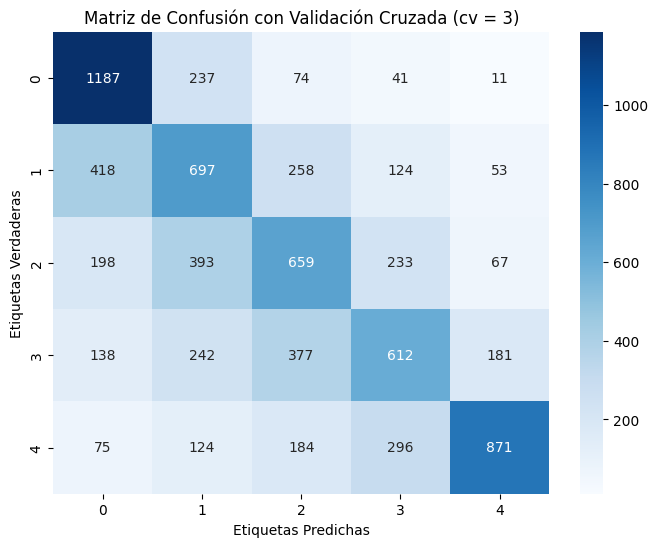

Exactitud media: 0.519483870967742
Precisión media: 0.5259936936623762
Recall media: 0.519483870967742
Puntuación F1 media: 0.5172868440450893
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_4.png


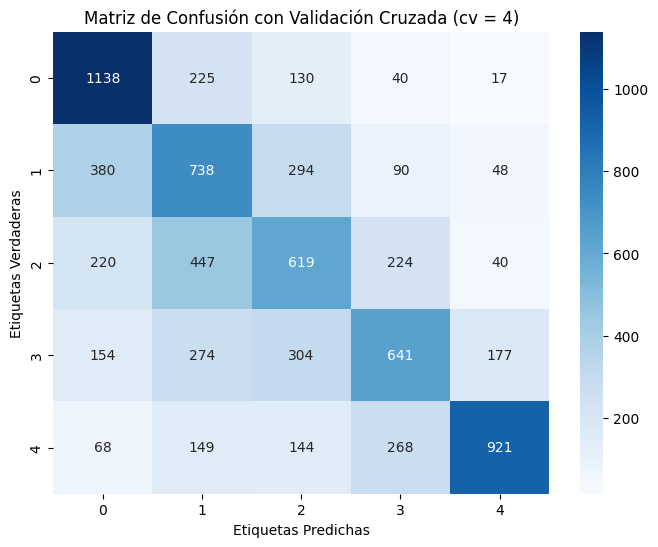

Exactitud media: 0.523483870967742
Precisión media: 0.5342992647288446
Recall media: 0.523483870967742
Puntuación F1 media: 0.5233329173566951
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_5.png


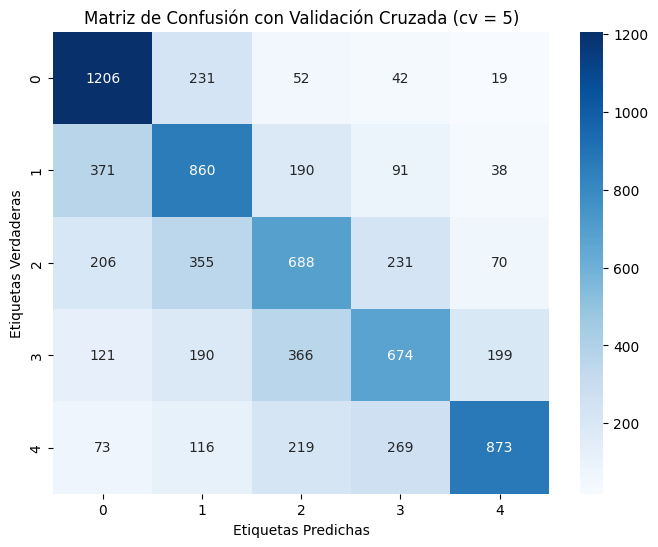

Exactitud media: 0.5549677419354838
Precisión media: 0.5597599393757444
Recall media: 0.5549677419354838
Puntuación F1 media: 0.5521334037905492
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_6.png


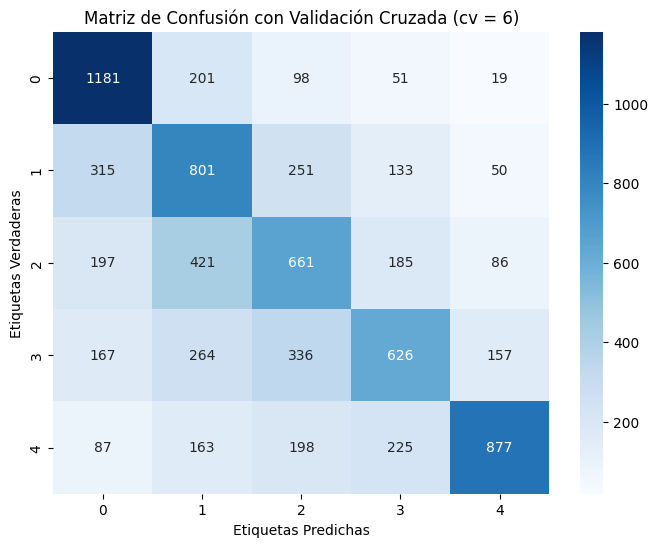

Exactitud media: 0.5349677419354839
Precisión media: 0.5436730738861362
Recall media: 0.5349677419354839
Puntuación F1 media: 0.5332512845200744
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_7.png


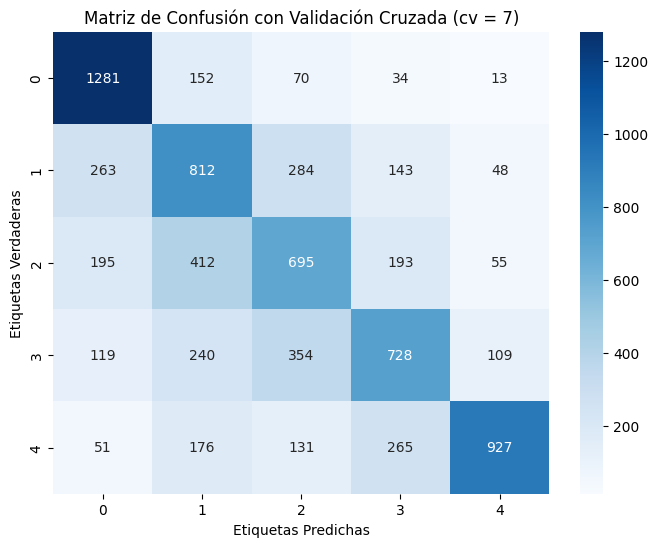

Exactitud media: 0.5732903225806452
Precisión media: 0.5832048519865729
Recall media: 0.5732903225806452
Puntuación F1 media: 0.572662635426679
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_8.png


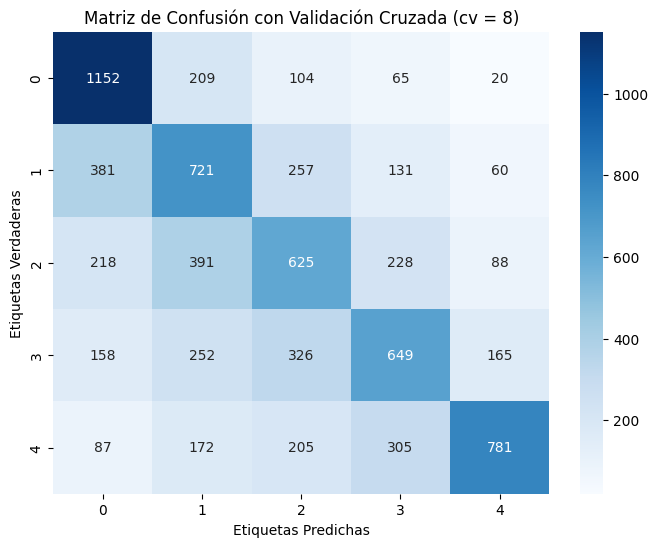

Exactitud media: 0.5068387096774194
Precisión media: 0.5148763621355804
Recall media: 0.5068387096774194
Puntuación F1 media: 0.5049171424535772
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_9.png


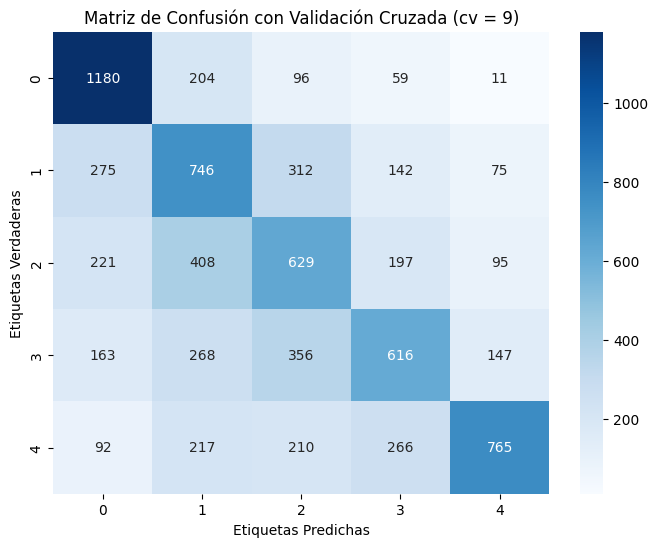

Exactitud media: 0.5078709677419355
Precisión media: 0.5178809886446736
Recall media: 0.5078709677419355
Puntuación F1 media: 0.5061806731040592
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_10.png


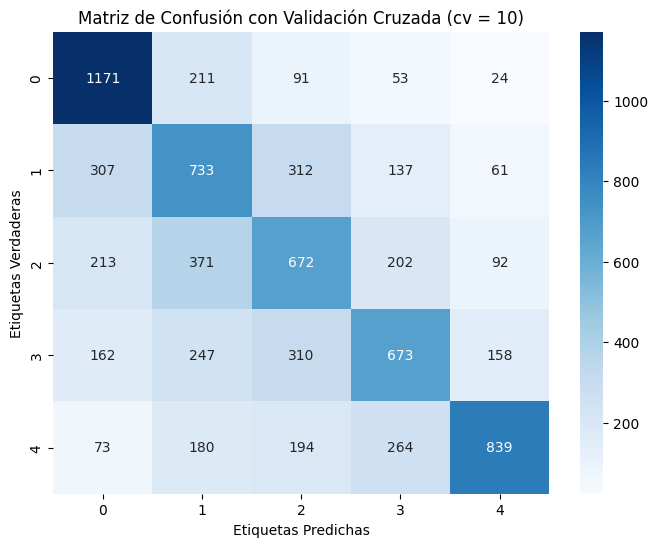

Exactitud media: 0.527483870967742
Precisión media: 0.5350817849721343
Recall media: 0.527483870967742
Puntuación F1 media: 0.5264288918645396
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_6_estimators/random_forest_glove_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_sim_7_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.1.png


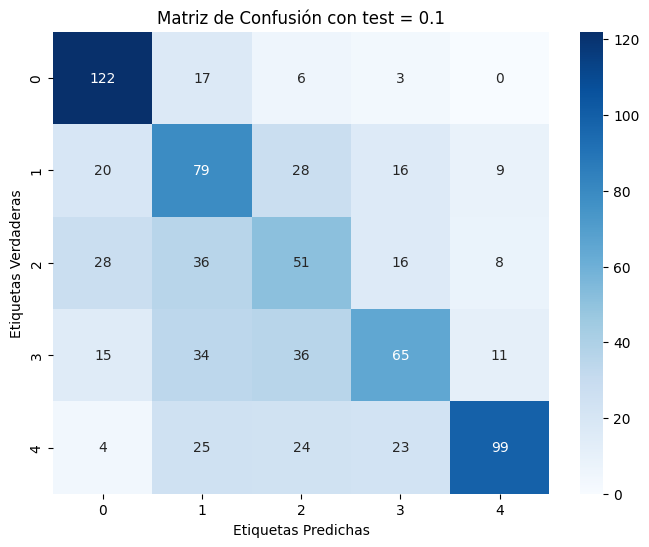

Exactitud del modelo: 0.5367741935483871
Precisión del modelo: 0.5532797165188428
Recall del modelo: 0.5367741935483871
Puntuación F1 del modelo: 0.5361672005014857
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.2.png


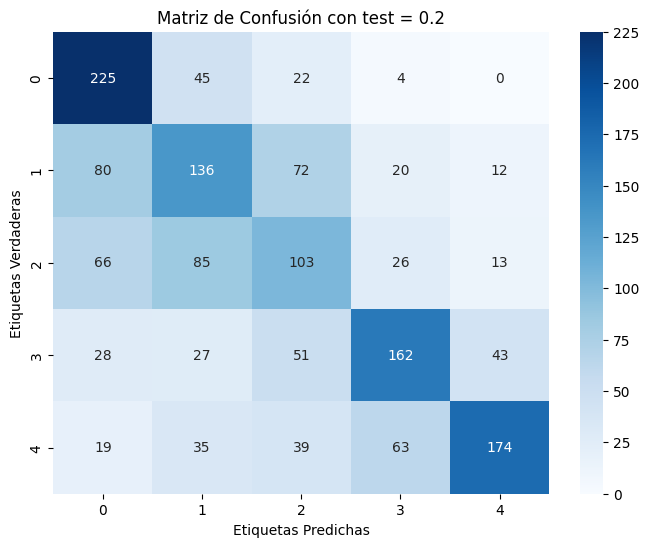

Exactitud del modelo: 0.5161290322580645
Precisión del modelo: 0.5275137938544953
Recall del modelo: 0.5161290322580645
Puntuación F1 del modelo: 0.514621016737874
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.3.png


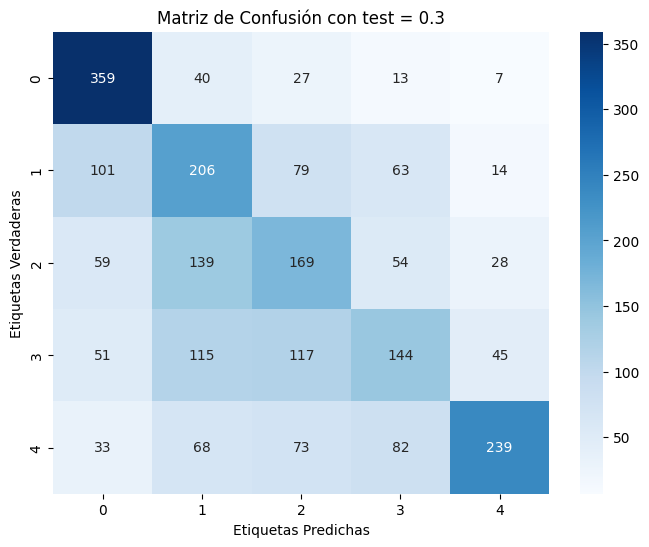

Exactitud del modelo: 0.4804301075268817
Precisión del modelo: 0.491537462565512
Recall del modelo: 0.4804301075268817
Puntuación F1 del modelo: 0.4758135515779794
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.4.png


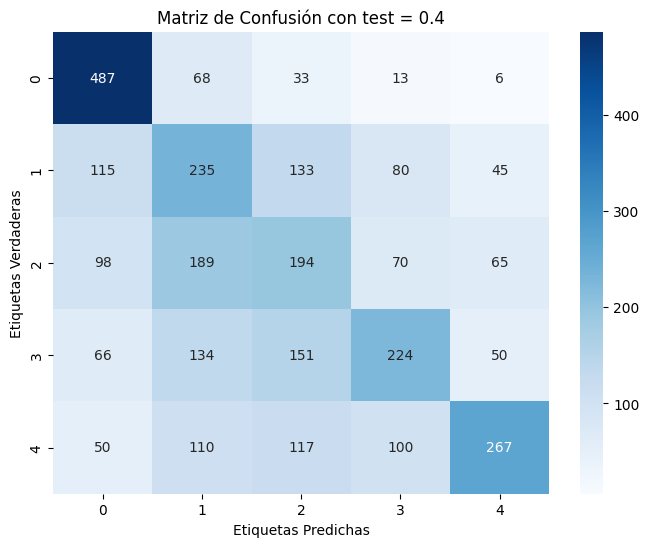

Exactitud del modelo: 0.45387096774193547
Precisión del modelo: 0.4617007217642722
Recall del modelo: 0.45387096774193547
Puntuación F1 del modelo: 0.4488156009088753
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.5.png


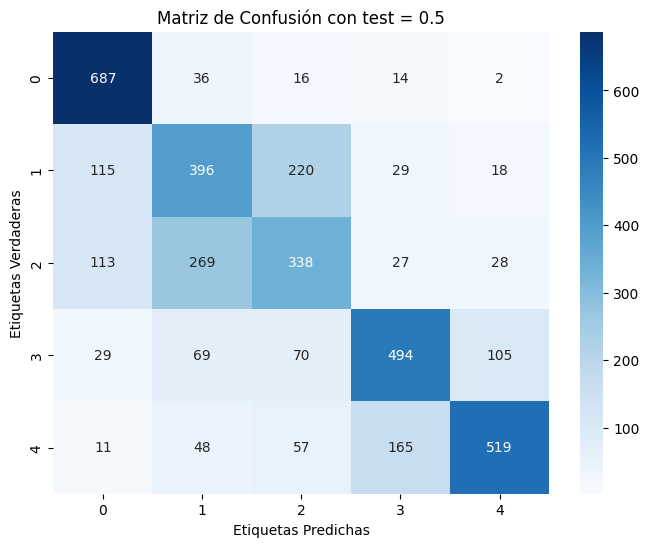

Exactitud del modelo: 0.6281290322580645
Precisión del modelo: 0.6273675596271423
Recall del modelo: 0.6281290322580645
Puntuación F1 del modelo: 0.6240899802218817
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.6.png


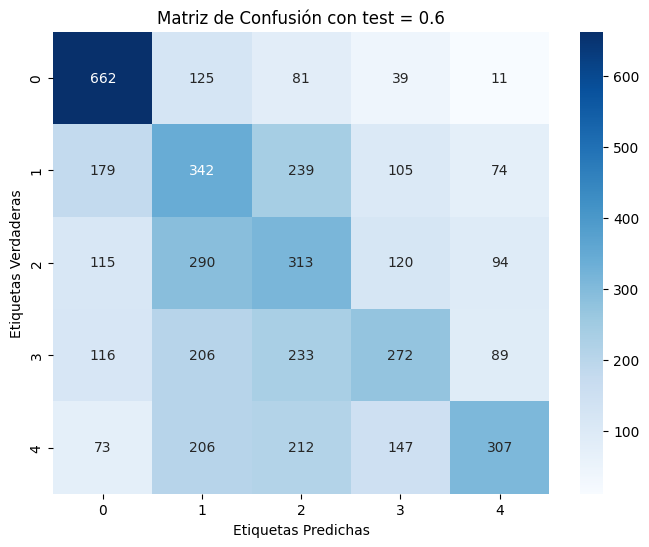

Exactitud del modelo: 0.40774193548387094
Precisión del modelo: 0.41836882608198167
Recall del modelo: 0.40774193548387094
Puntuación F1 del modelo: 0.4037574749594537
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.7.png


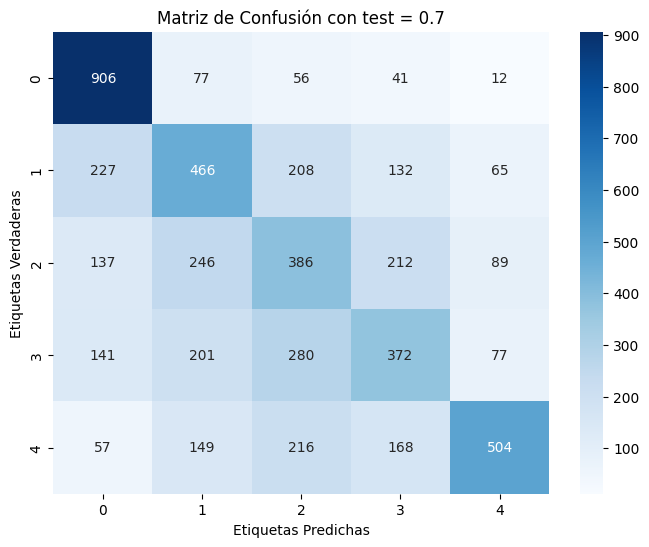

Exactitud del modelo: 0.48552995391705067
Precisión del modelo: 0.48892326163583494
Recall del modelo: 0.48552995391705067
Puntuación F1 del modelo: 0.4795131241322059
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.8.png


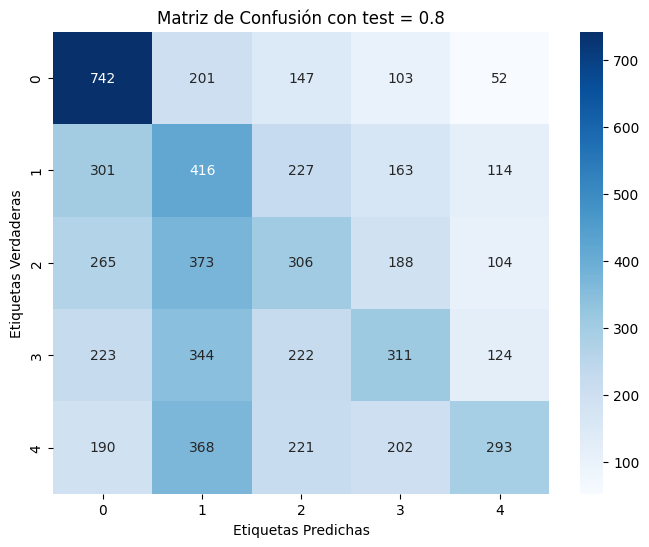

Exactitud del modelo: 0.3335483870967742
Precisión del modelo: 0.34016226691645574
Recall del modelo: 0.3335483870967742
Puntuación F1 del modelo: 0.3256947449909983
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.9.png


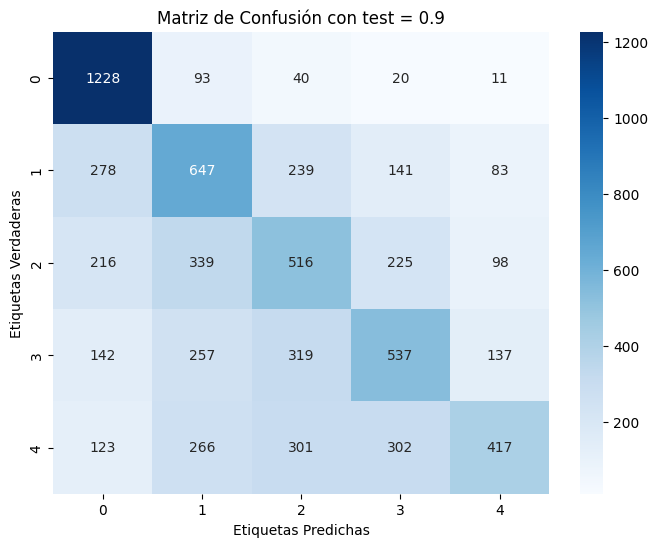

Exactitud del modelo: 0.47956989247311826
Precisión del modelo: 0.47699004417781365
Recall del modelo: 0.47956989247311826
Puntuación F1 del modelo: 0.46468250534127126
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_7_estimators/random_forest_glove_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_cruz_7_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_2.png


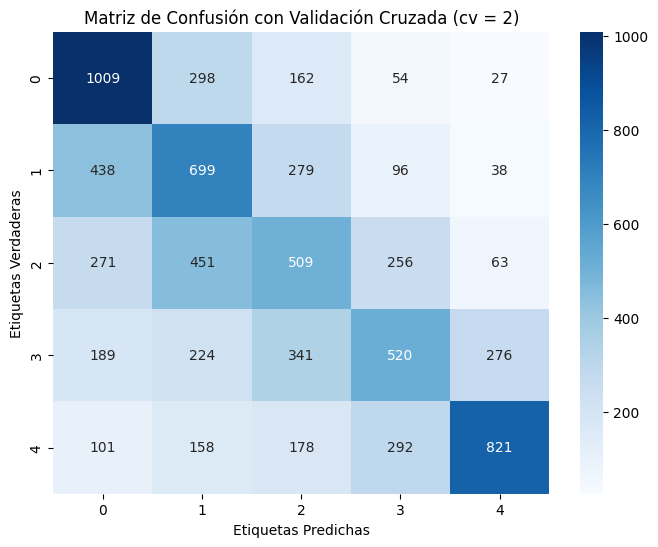

Exactitud media: 0.4590967741935484
Precisión media: 0.46561698815710584
Recall media: 0.4590967741935484
Puntuación F1 media: 0.4570828077954772
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_3.png


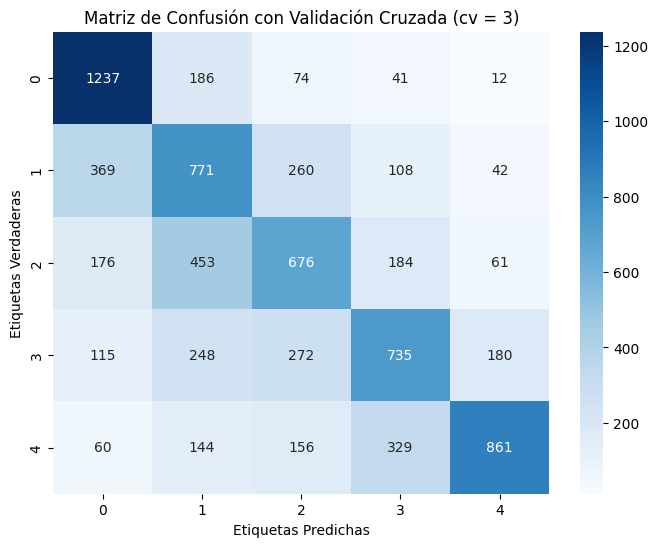

Exactitud media: 0.552258064516129
Precisión media: 0.5601964662224551
Recall media: 0.552258064516129
Puntuación F1 media: 0.5506245355141918
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_4.png


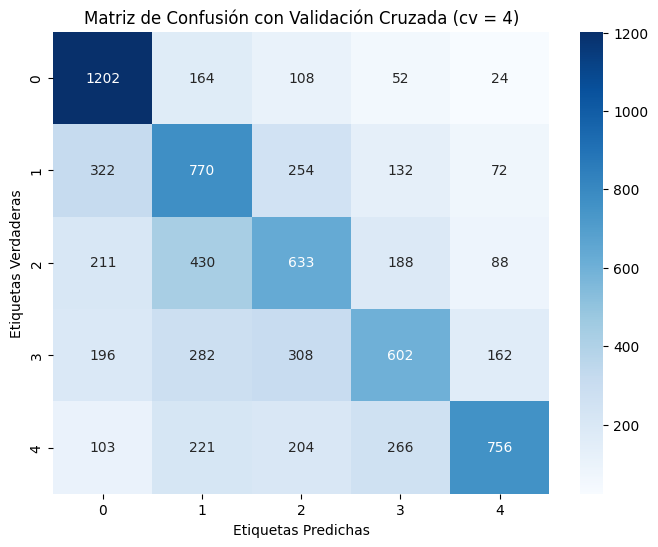

Exactitud media: 0.5113548387096775
Precisión media: 0.5189858463195427
Recall media: 0.5113548387096775
Puntuación F1 media: 0.5074510266138935
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_5.png


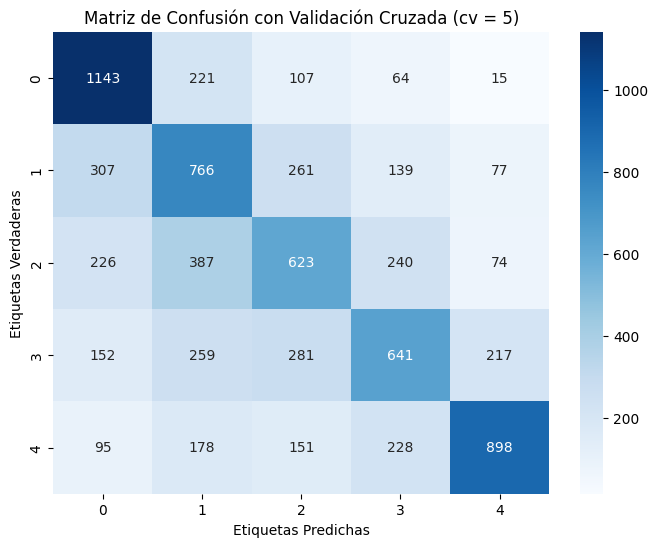

Exactitud media: 0.5252903225806451
Precisión media: 0.5289487728272605
Recall media: 0.5252903225806451
Puntuación F1 media: 0.5230971738336719
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_6.png


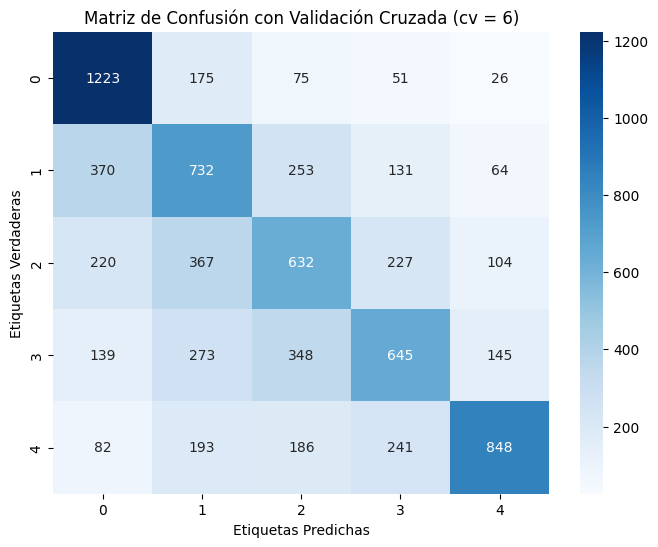

Exactitud media: 0.5264516129032258
Precisión media: 0.5314937846894562
Recall media: 0.5264516129032258
Puntuación F1 media: 0.5231578410975081
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_7.png


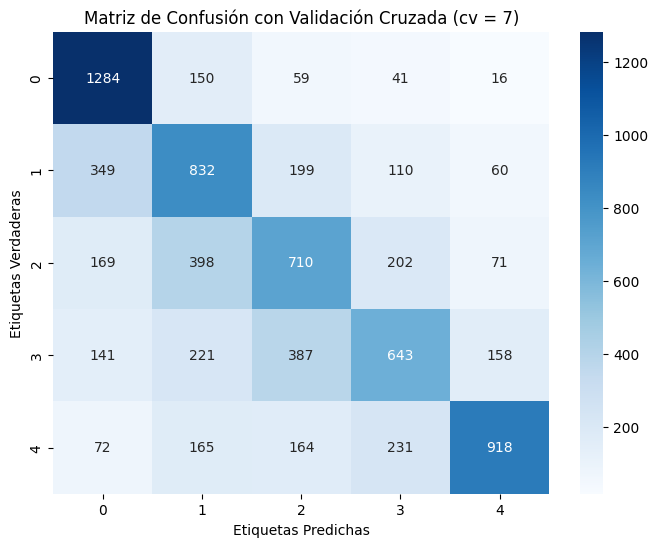

Exactitud media: 0.5660645161290323
Precisión media: 0.5700820837879694
Recall media: 0.5660645161290323
Puntuación F1 media: 0.5620051840619471
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_8.png


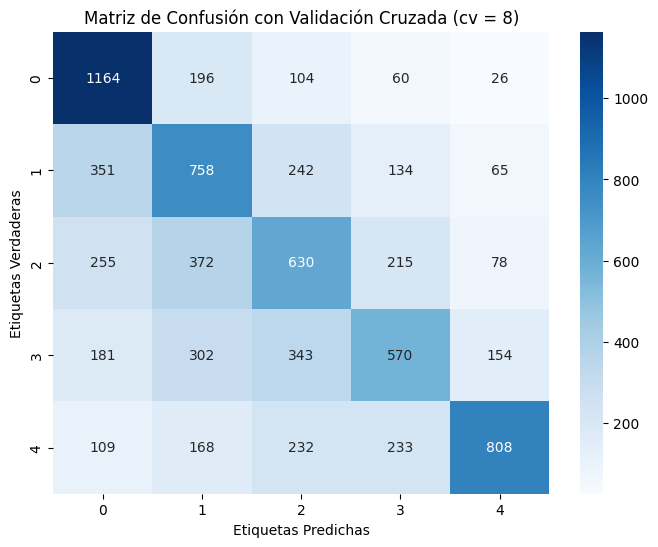

Exactitud media: 0.5070967741935484
Precisión media: 0.5155992302095393
Recall media: 0.5070967741935484
Puntuación F1 media: 0.5039557485428423
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_9.png


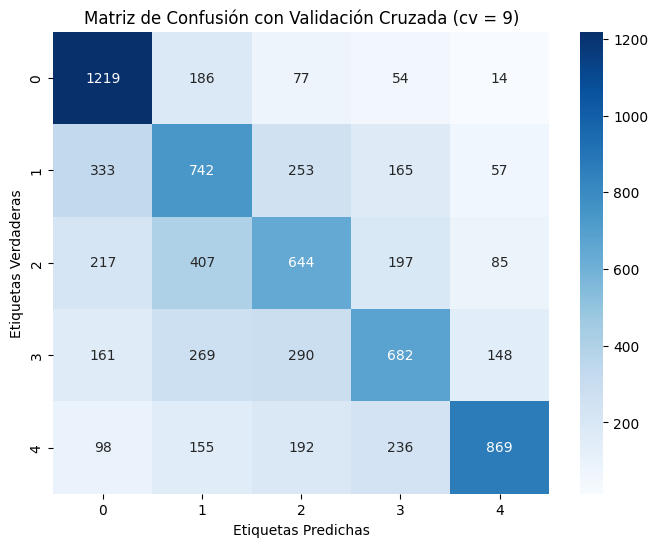

Exactitud media: 0.536258064516129
Precisión media: 0.5434605865845338
Recall media: 0.536258064516129
Puntuación F1 media: 0.5339114673964558
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_10.png


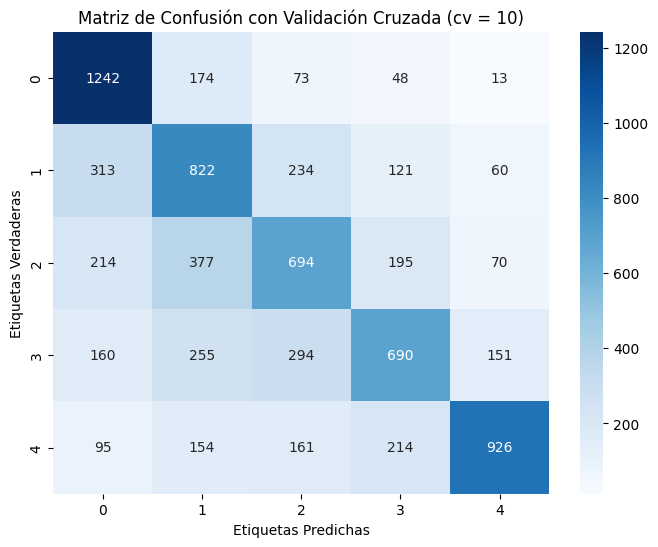

Exactitud media: 0.5643870967741935
Precisión media: 0.5709489215723378
Recall media: 0.5643870967741935
Puntuación F1 media: 0.5616922392788519
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_7_estimators/random_forest_glove_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_sim_8_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.1.png


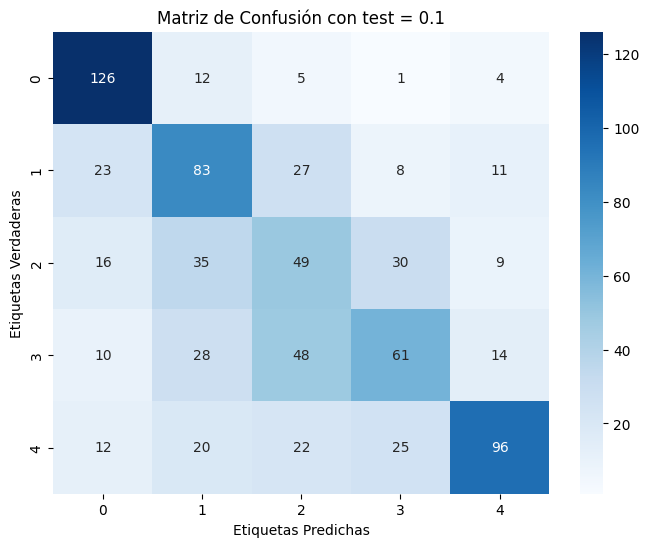

Exactitud del modelo: 0.535483870967742
Precisión del modelo: 0.5414779667372009
Recall del modelo: 0.535483870967742
Puntuación F1 del modelo: 0.5318458695397201
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.2.png


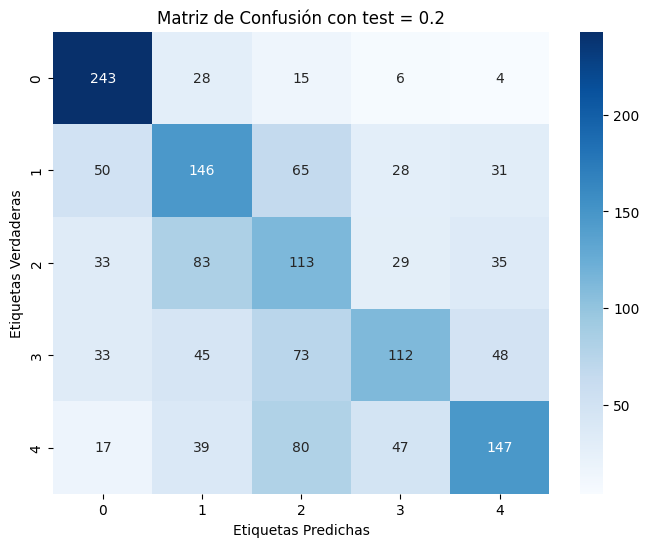

Exactitud del modelo: 0.49096774193548387
Precisión del modelo: 0.49287414587997225
Recall del modelo: 0.49096774193548387
Puntuación F1 del modelo: 0.48569100455861774
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.3.png


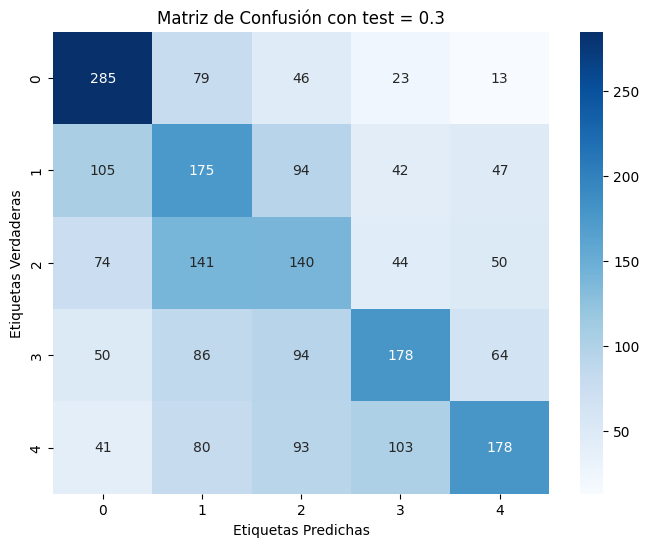

Exactitud del modelo: 0.41118279569892474
Precisión del modelo: 0.418838112886114
Recall del modelo: 0.41118279569892474
Puntuación F1 del modelo: 0.4096565841105783
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.4.png


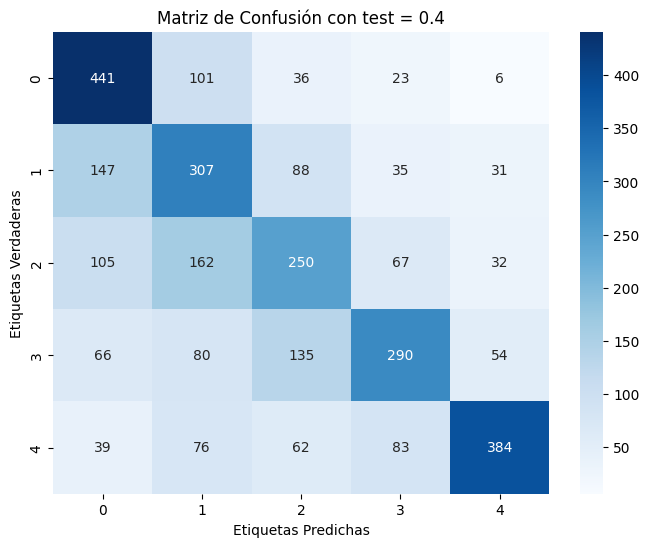

Exactitud del modelo: 0.5393548387096774
Precisión del modelo: 0.5528937775502835
Recall del modelo: 0.5393548387096774
Puntuación F1 del modelo: 0.5396365442987755
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.5.png


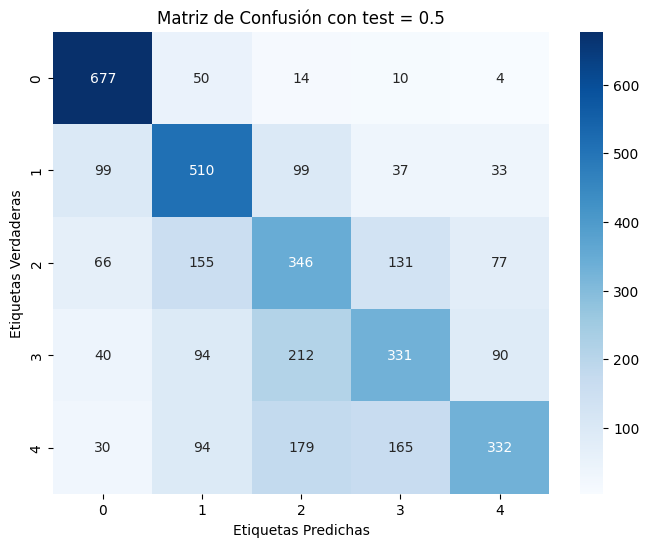

Exactitud del modelo: 0.5667096774193549
Precisión del modelo: 0.5645218375058199
Recall del modelo: 0.5667096774193549
Puntuación F1 del modelo: 0.558790530418009
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.6.png


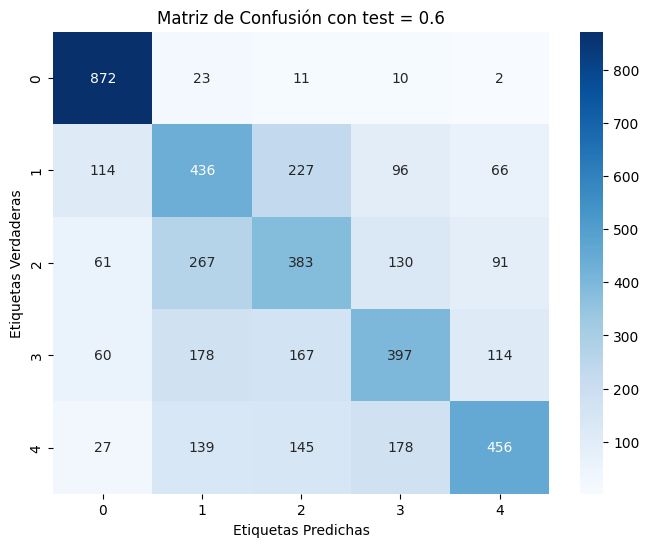

Exactitud del modelo: 0.5470967741935484
Precisión del modelo: 0.5420495233386476
Recall del modelo: 0.5470967741935484
Puntuación F1 del modelo: 0.5402372484188132
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.7.png


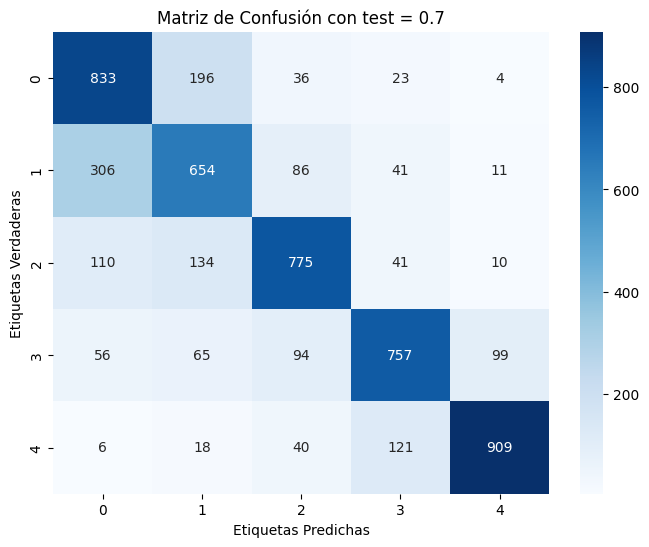

Exactitud del modelo: 0.7240552995391705
Precisión del modelo: 0.7296980276942262
Recall del modelo: 0.7240552995391705
Puntuación F1 del modelo: 0.7252231382263362
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.8.png


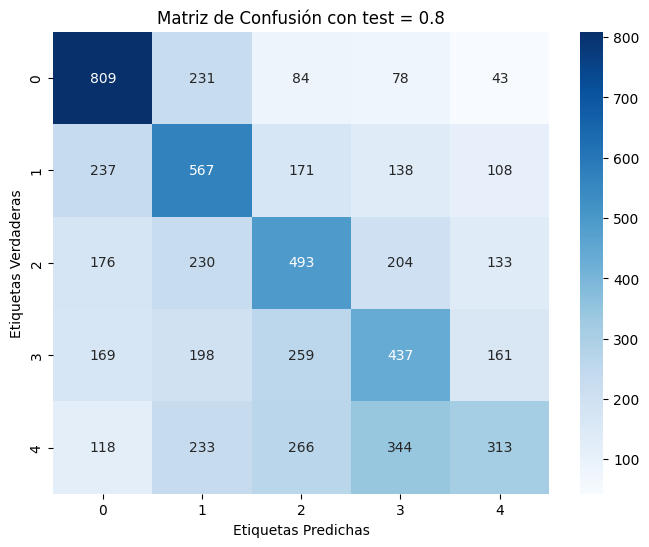

Exactitud del modelo: 0.4224193548387097
Precisión del modelo: 0.41807807201501784
Recall del modelo: 0.4224193548387097
Puntuación F1 del modelo: 0.4141052605191543
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.9.png


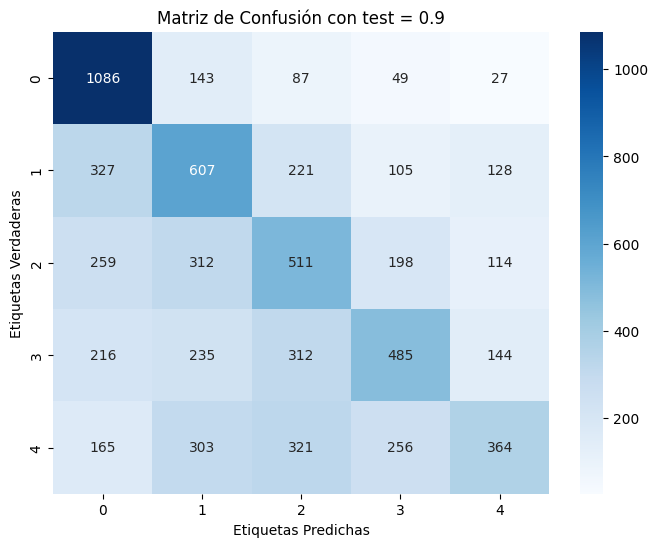

Exactitud del modelo: 0.4377060931899642
Precisión del modelo: 0.43458806593850785
Recall del modelo: 0.4377060931899642
Puntuación F1 del modelo: 0.42361848831679877
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_8_estimators/random_forest_glove_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_cruz_8_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_2.png


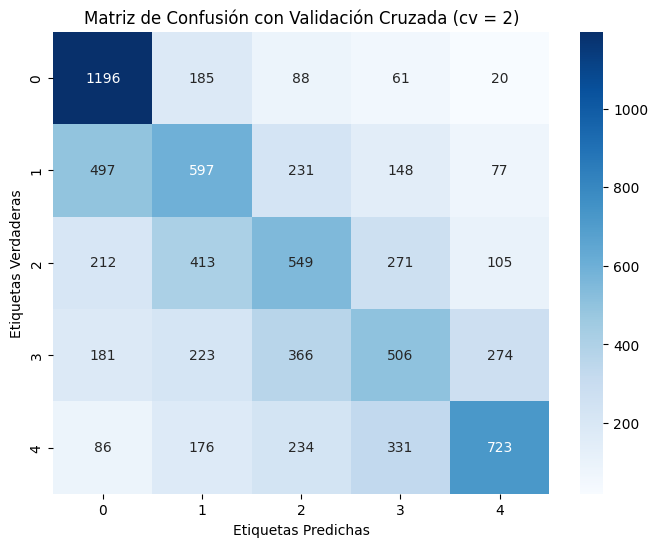

Exactitud media: 0.4607741935483871
Precisión media: 0.4572722573004798
Recall media: 0.4607741935483871
Puntuación F1 media: 0.45304899857654196
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_3.png


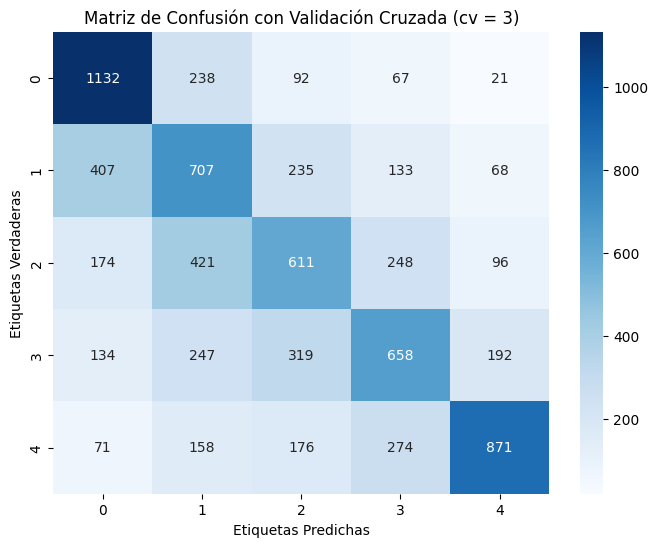

Exactitud media: 0.5134193548387097
Precisión media: 0.5181028195150356
Recall media: 0.5134193548387097
Puntuación F1 media: 0.5119980470657922
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_4.png


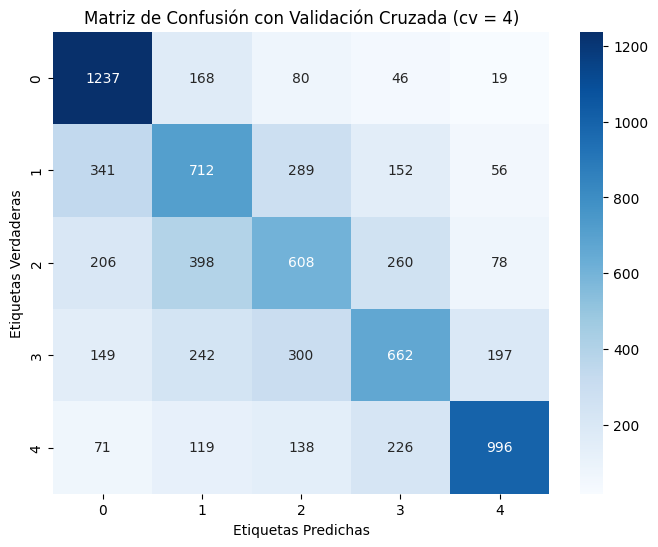

Exactitud media: 0.5438709677419354
Precisión media: 0.5426313187960513
Recall media: 0.5438709677419354
Puntuación F1 media: 0.5395595366605384
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_5.png


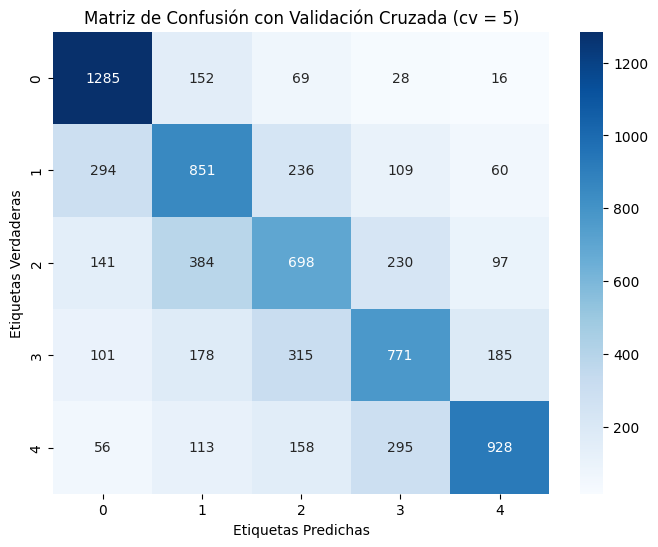

Exactitud media: 0.5849032258064516
Precisión media: 0.5848607417107854
Recall media: 0.5849032258064516
Puntuación F1 media: 0.5819791502142753
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_6.png


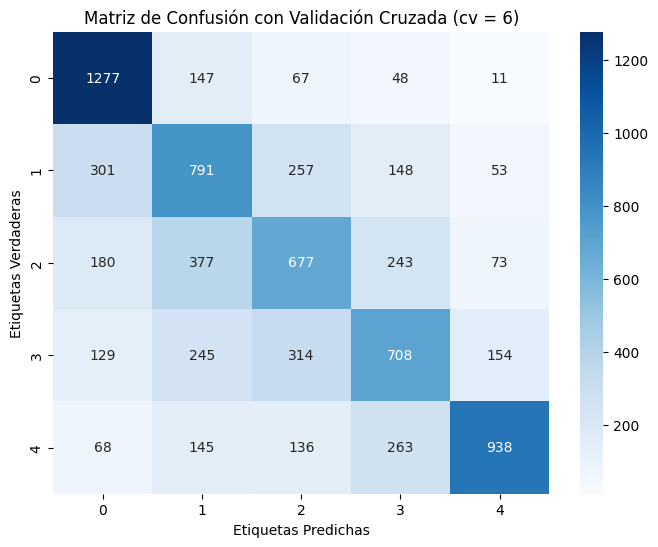

Exactitud media: 0.5665806451612904
Precisión media: 0.5698102234240223
Recall media: 0.5665806451612904
Puntuación F1 media: 0.5638638237780701
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_7.png


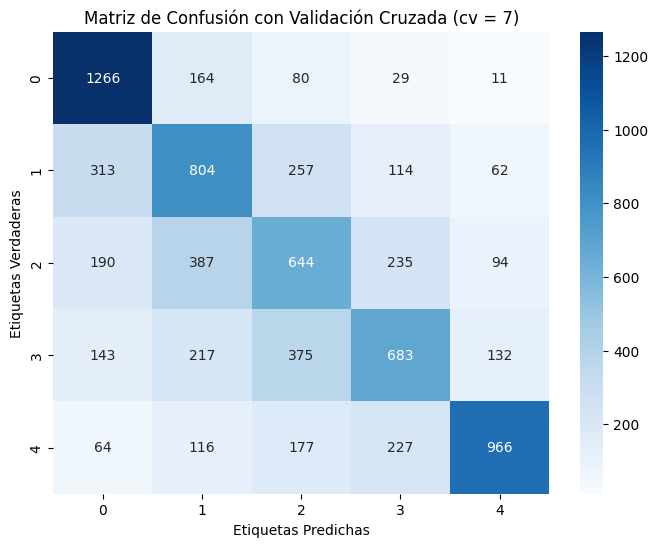

Exactitud media: 0.5629677419354838
Precisión media: 0.5661997535175447
Recall media: 0.5629677419354838
Puntuación F1 media: 0.5600240076817503
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_8.png


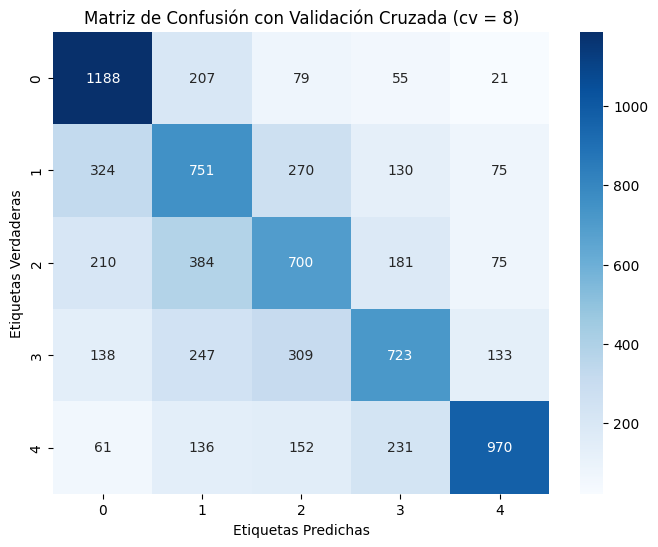

Exactitud media: 0.5589677419354838
Precisión media: 0.565295025661949
Recall media: 0.5589677419354838
Puntuación F1 media: 0.5582945678799565
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_9.png


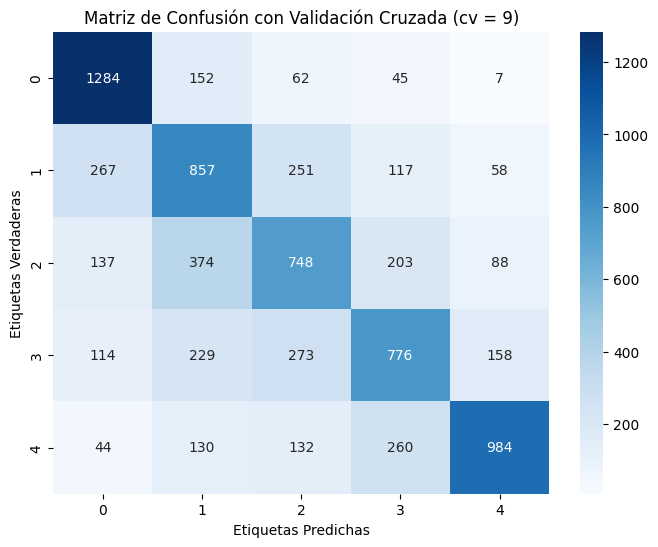

Exactitud media: 0.5998709677419355
Precisión media: 0.6022977571492234
Recall media: 0.5998709677419355
Puntuación F1 media: 0.5981048824345555
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_10.png


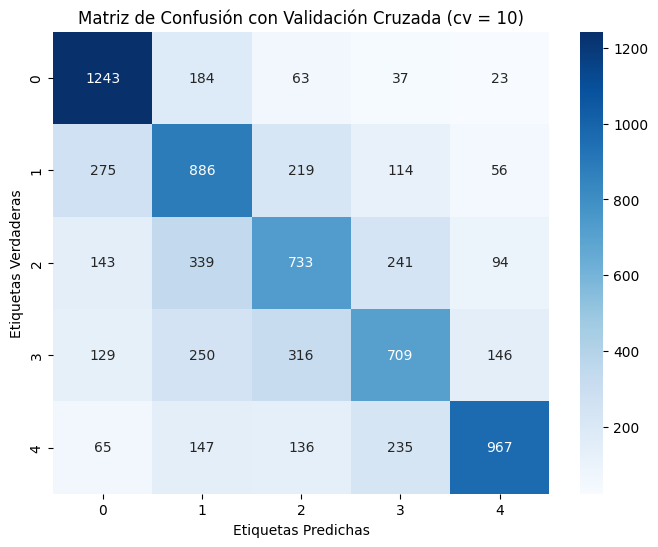

Exactitud media: 0.5855483870967741
Precisión media: 0.5885919197096171
Recall media: 0.5855483870967741
Puntuación F1 media: 0.5834618757330235
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_8_estimators/random_forest_glove_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_sim_9_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.1.png


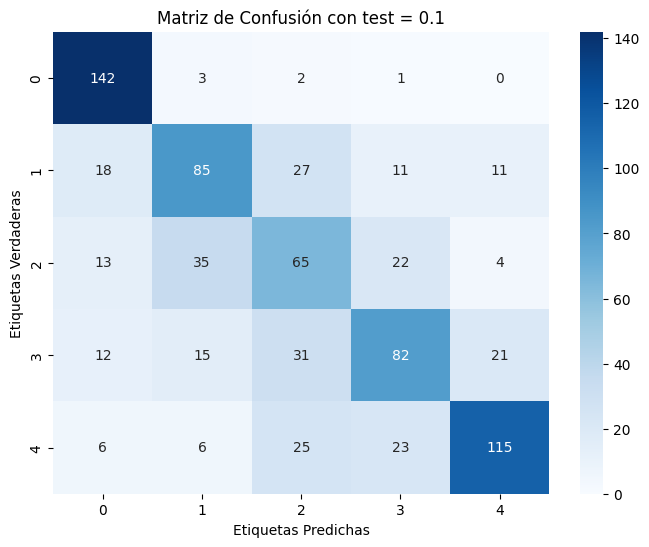

Exactitud del modelo: 0.6309677419354839
Precisión del modelo: 0.6299916543608675
Recall del modelo: 0.6309677419354839
Puntuación F1 del modelo: 0.6261819876727822
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.2.png


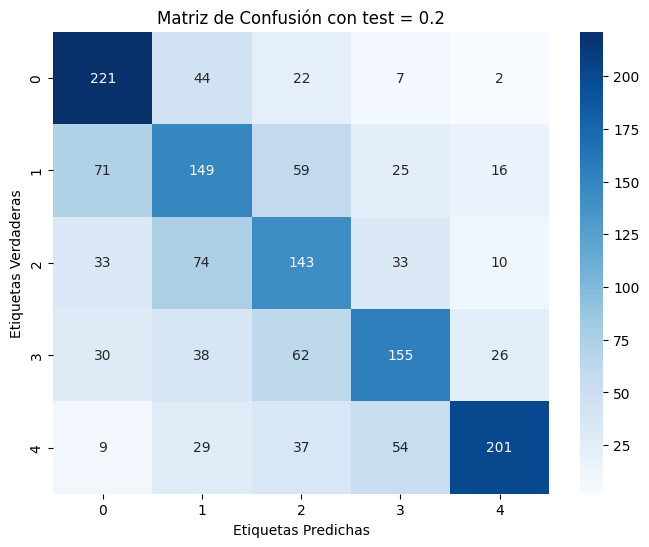

Exactitud del modelo: 0.5606451612903226
Precisión del modelo: 0.5730550625672579
Recall del modelo: 0.5606451612903226
Puntuación F1 del modelo: 0.5623542351239895
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.3.png


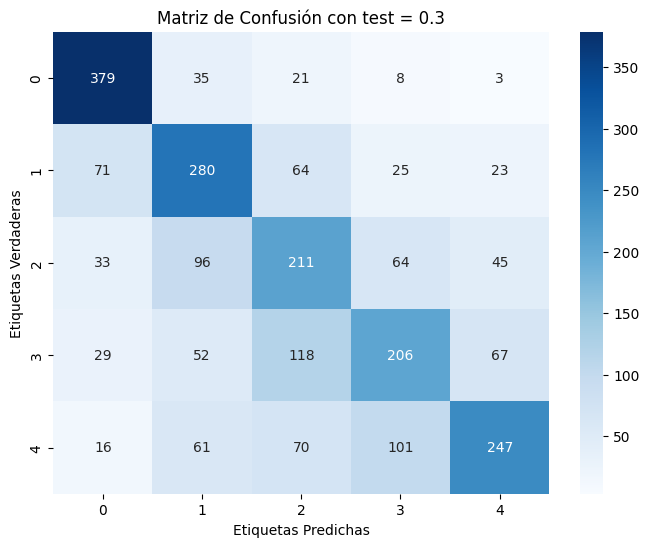

Exactitud del modelo: 0.5690322580645162
Precisión del modelo: 0.5684005002594299
Recall del modelo: 0.5690322580645162
Puntuación F1 del modelo: 0.564618485420431
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.4.png


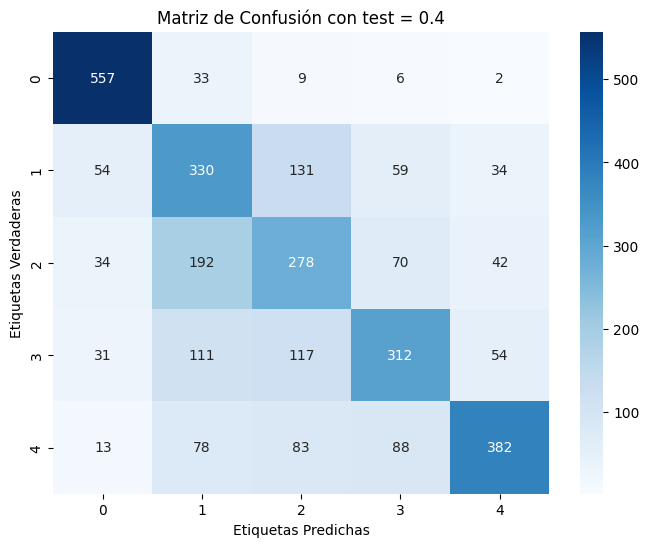

Exactitud del modelo: 0.5996774193548388
Precisión del modelo: 0.6066413659735772
Recall del modelo: 0.5996774193548388
Puntuación F1 del modelo: 0.5990977620370823
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.5.png


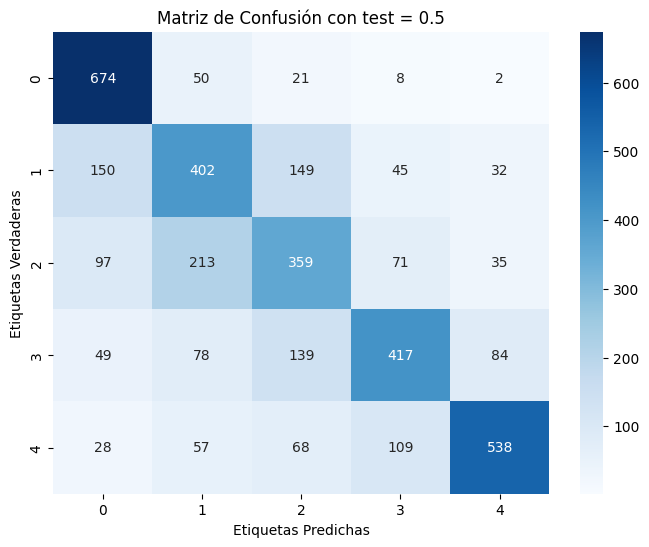

Exactitud del modelo: 0.6167741935483871
Precisión del modelo: 0.6177505264079836
Recall del modelo: 0.6167741935483871
Puntuación F1 del modelo: 0.6126435561608264
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.6.png


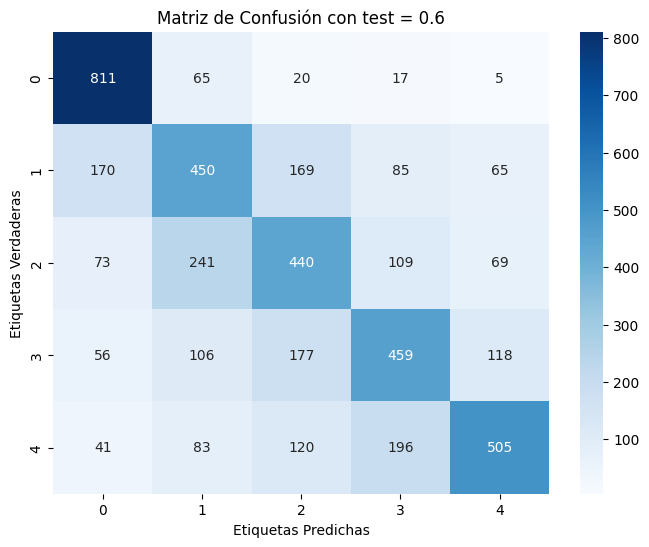

Exactitud del modelo: 0.5731182795698925
Precisión del modelo: 0.5695917458542293
Recall del modelo: 0.5731182795698925
Puntuación F1 del modelo: 0.5678870527117039
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.7.png


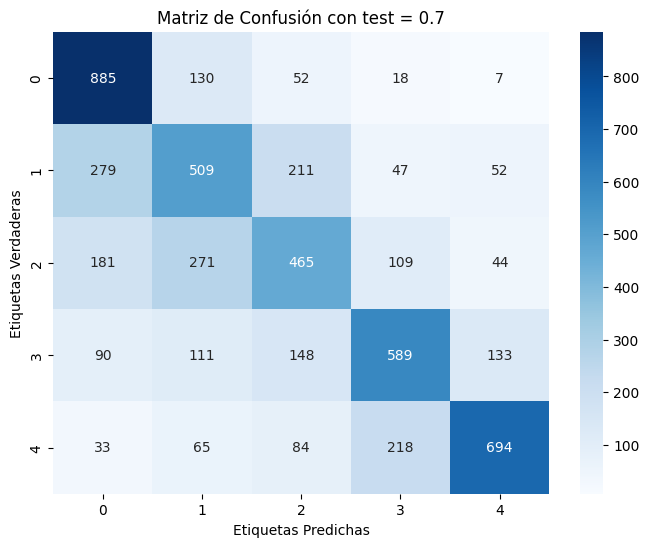

Exactitud del modelo: 0.5791705069124424
Precisión del modelo: 0.5807648484829669
Recall del modelo: 0.5791705069124424
Puntuación F1 del modelo: 0.5754978631421273
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.8.png


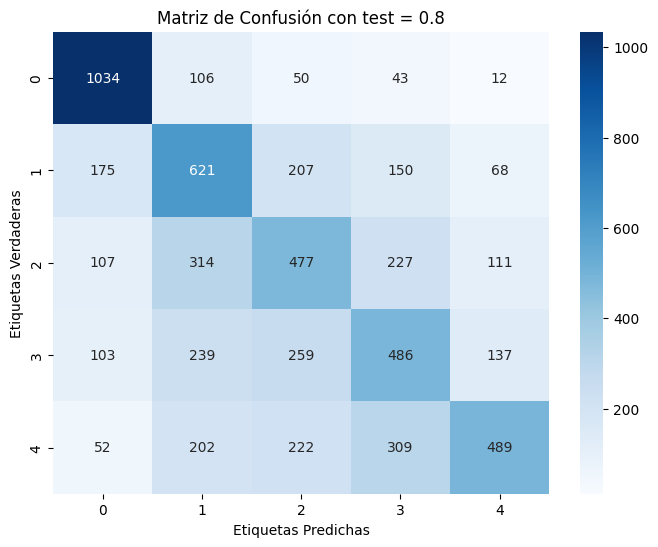

Exactitud del modelo: 0.5011290322580645
Precisión del modelo: 0.5038945439406656
Recall del modelo: 0.5011290322580645
Puntuación F1 del modelo: 0.49576626894676507
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.9.png


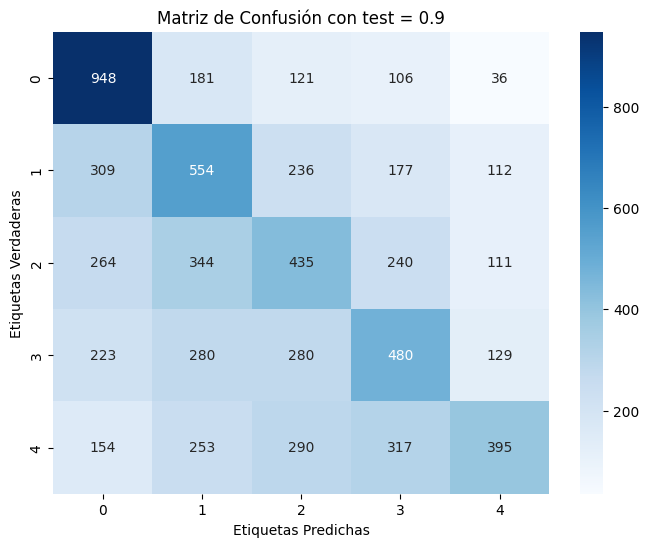

Exactitud del modelo: 0.4031541218637993
Precisión del modelo: 0.4063776717775536
Recall del modelo: 0.4031541218637993
Puntuación F1 del modelo: 0.3950441091015011
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_9_estimators/random_forest_glove_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_cruz_9_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_2.png


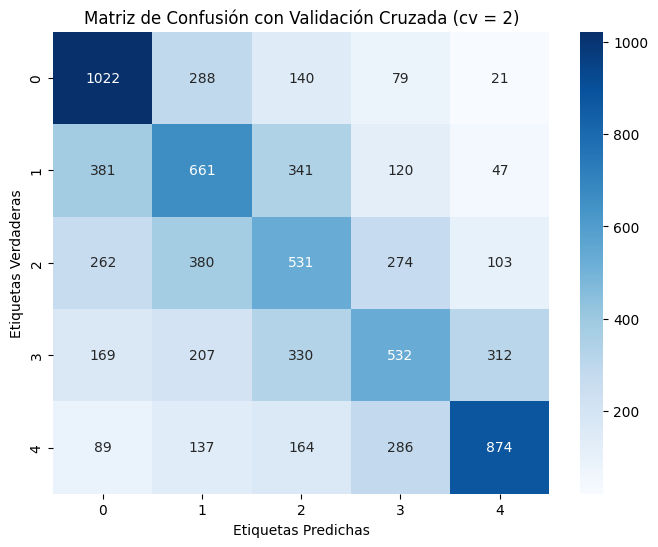

Exactitud media: 0.4670967741935484
Precisión media: 0.46706019555989525
Recall media: 0.4670967741935484
Puntuación F1 media: 0.4644106629801352
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_3.png


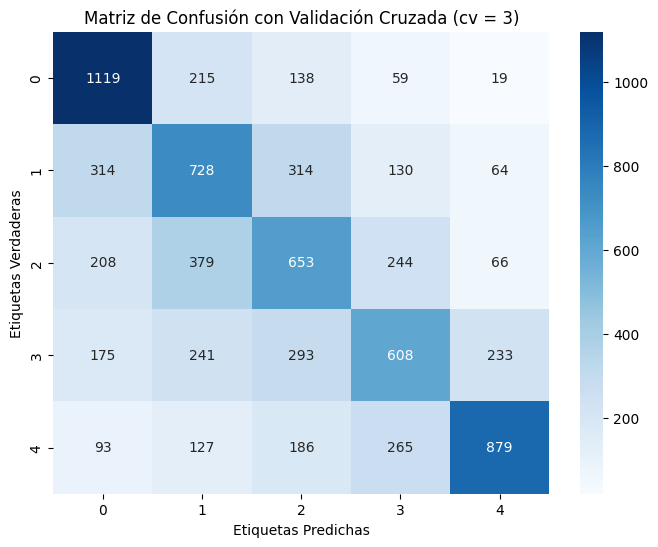

Exactitud media: 0.5144516129032258
Precisión media: 0.5183593882094454
Recall media: 0.5144516129032258
Puntuación F1 media: 0.5128561780370199
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_4.png


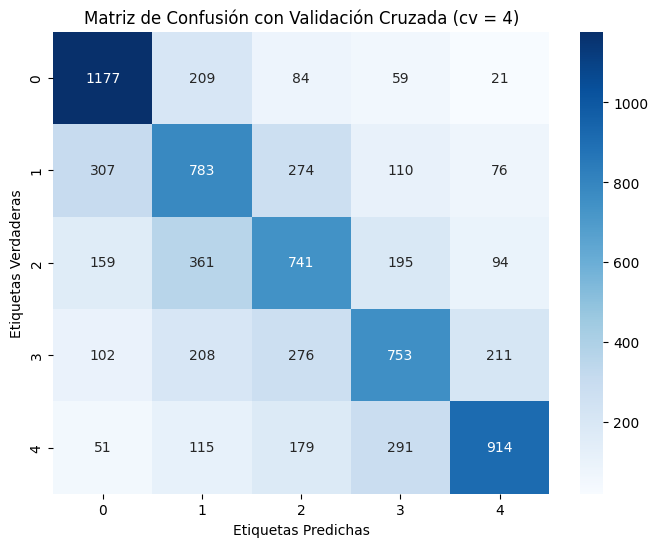

Exactitud media: 0.5636129032258065
Precisión media: 0.5657385942083798
Recall media: 0.5636129032258065
Puntuación F1 media: 0.5626712930406325
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_5.png


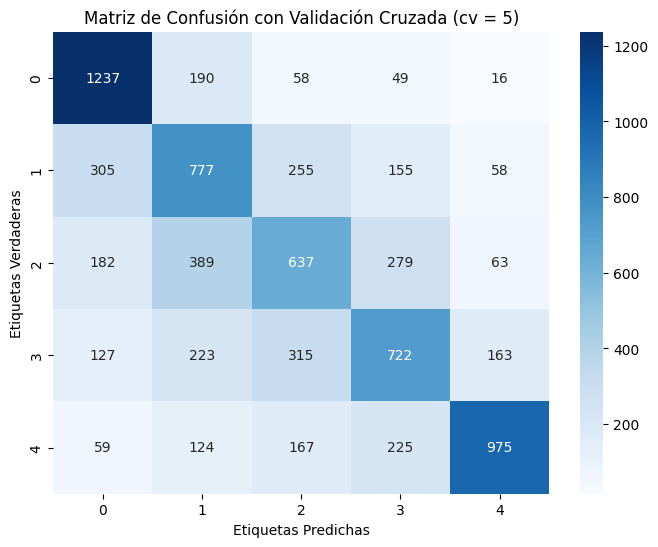

Exactitud media: 0.5610322580645162
Precisión media: 0.5636662077068805
Recall media: 0.5610322580645162
Puntuación F1 media: 0.5589602148430924
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_6.png


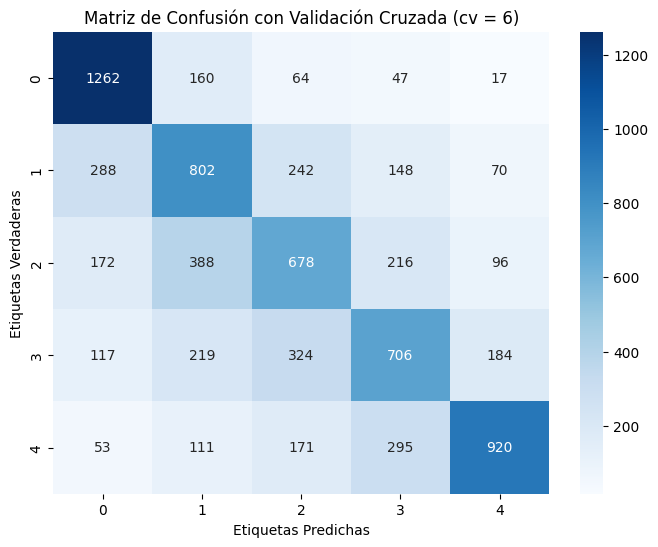

Exactitud media: 0.5636129032258065
Precisión media: 0.5635317089208782
Recall media: 0.5636129032258065
Puntuación F1 media: 0.5605677774715379
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_7.png


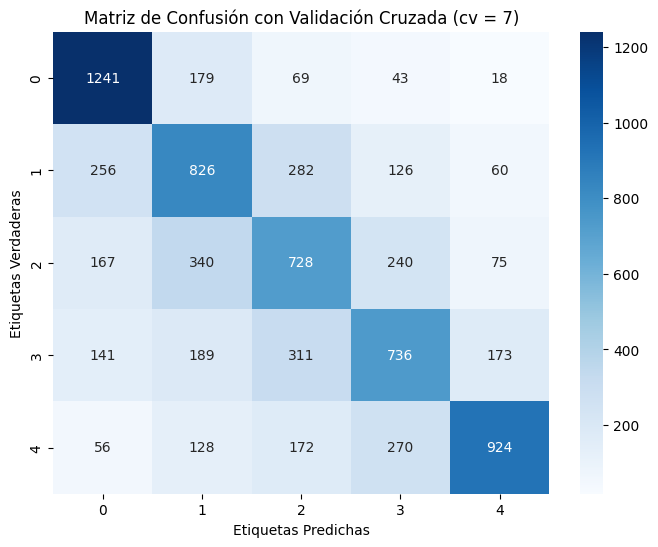

Exactitud media: 0.5748387096774193
Precisión media: 0.5778495686266689
Recall media: 0.5748387096774193
Puntuación F1 media: 0.5732584310722748
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_8.png


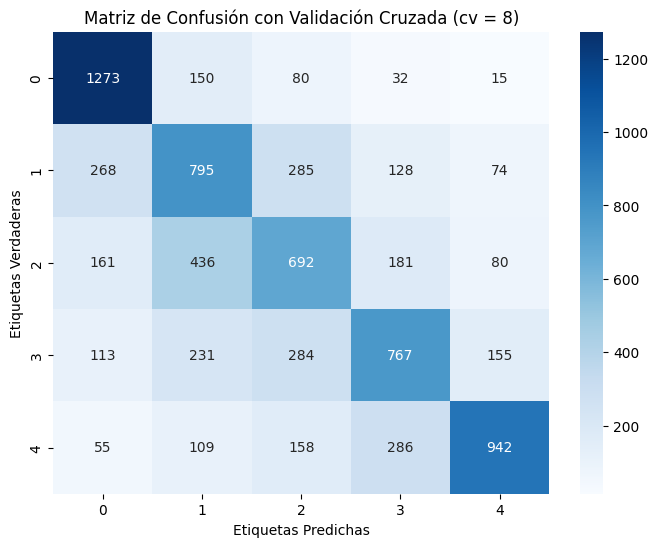

Exactitud media: 0.5766451612903226
Precisión media: 0.5797243053430228
Recall media: 0.5766451612903226
Puntuación F1 media: 0.5749095033083511
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_9.png


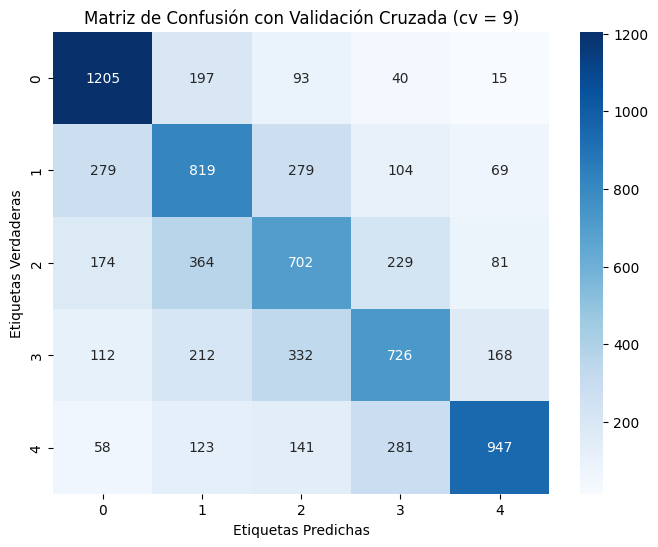

Exactitud media: 0.5676129032258065
Precisión media: 0.5712907223052384
Recall media: 0.5676129032258065
Puntuación F1 media: 0.5666574944945449
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_10.png


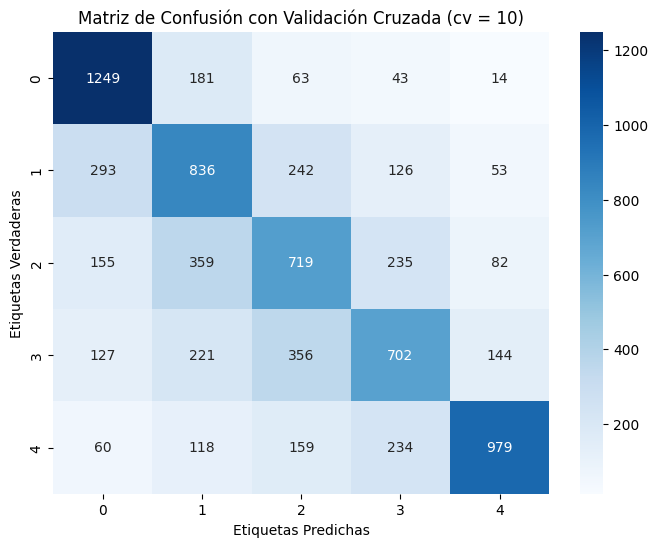

Exactitud media: 0.5787096774193549
Precisión media: 0.5822271788750268
Recall media: 0.5787096774193549
Puntuación F1 media: 0.5769399415507
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_9_estimators/random_forest_glove_embedding_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_sim_10_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.1.png


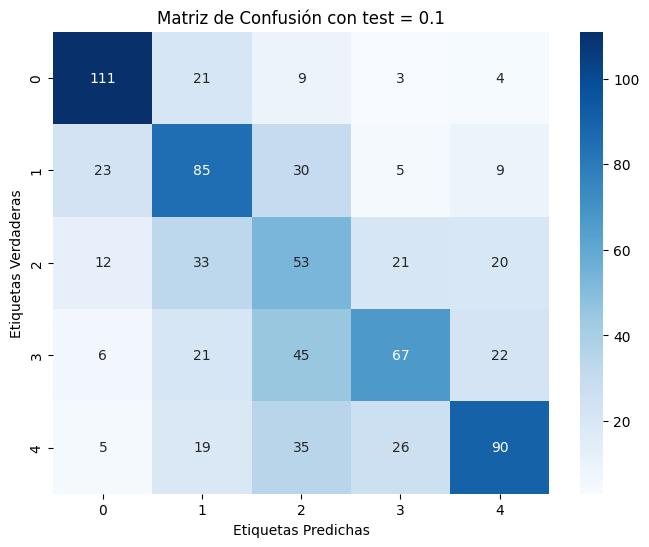

Exactitud del modelo: 0.5238709677419355
Precisión del modelo: 0.537659137310677
Recall del modelo: 0.5238709677419355
Puntuación F1 del modelo: 0.5262425506531827
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.2.png


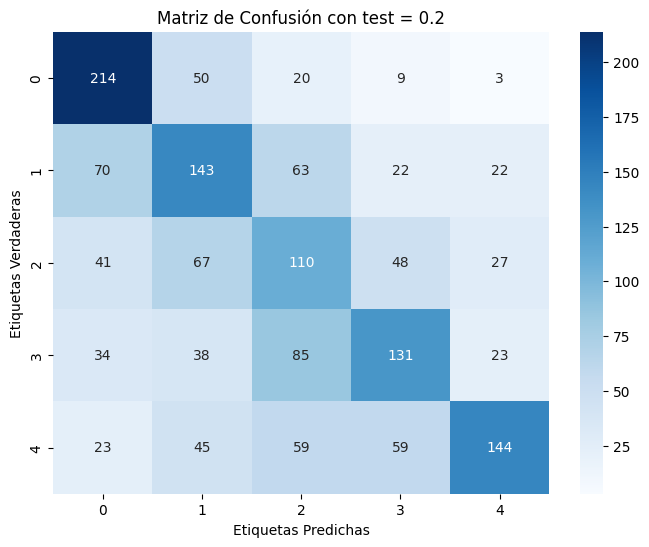

Exactitud del modelo: 0.47870967741935483
Precisión del modelo: 0.49245863445820554
Recall del modelo: 0.47870967741935483
Puntuación F1 del modelo: 0.47794393175857147
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.3.png


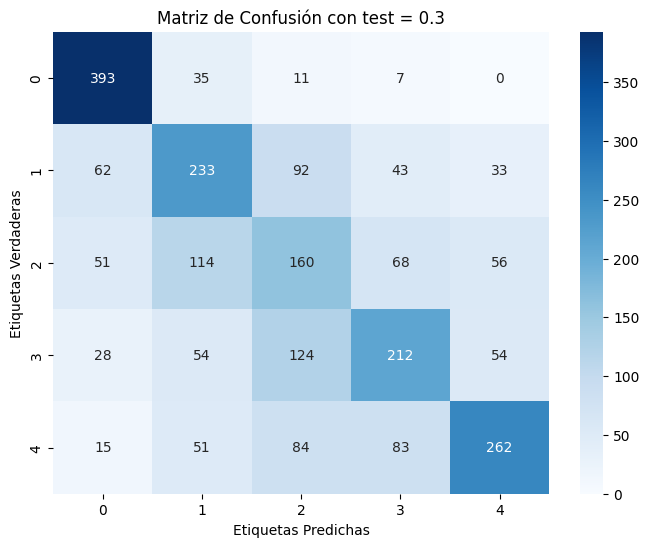

Exactitud del modelo: 0.5419354838709678
Precisión del modelo: 0.5401375007086786
Recall del modelo: 0.5419354838709678
Puntuación F1 del modelo: 0.5376079649578651
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.4.png


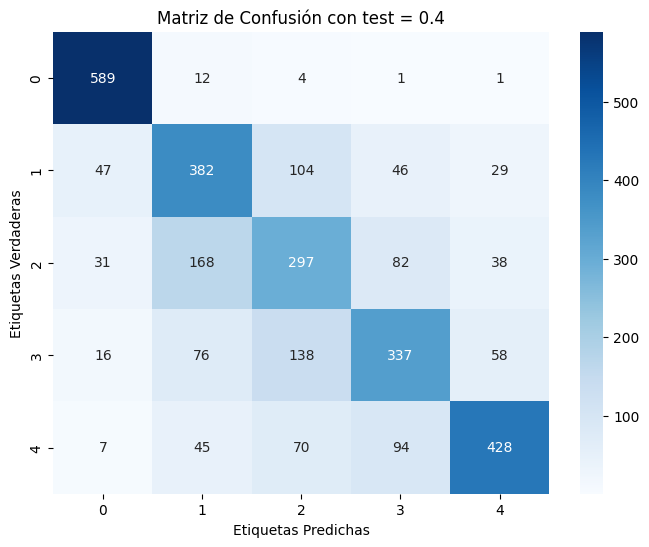

Exactitud del modelo: 0.6558064516129032
Precisión del modelo: 0.6549362092550883
Recall del modelo: 0.6558064516129032
Puntuación F1 del modelo: 0.6530578499653473
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.5.png


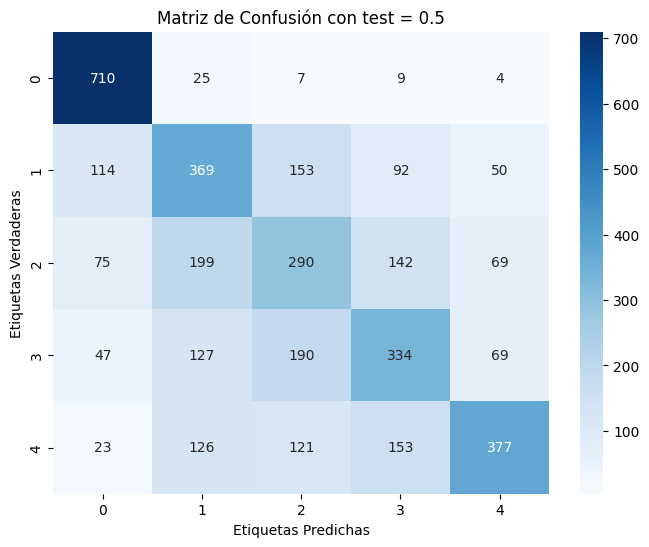

Exactitud del modelo: 0.5367741935483871
Precisión del modelo: 0.5338983681427264
Recall del modelo: 0.5367741935483871
Puntuación F1 del modelo: 0.5292720008388657
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.6.png


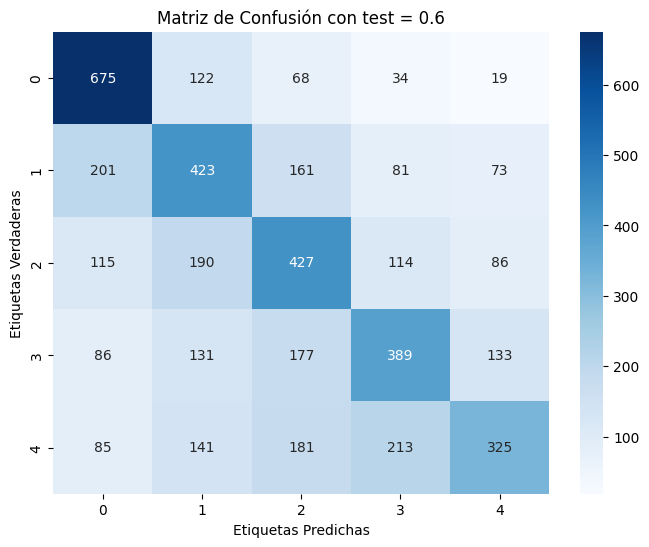

Exactitud del modelo: 0.481505376344086
Precisión del modelo: 0.47996932215370647
Recall del modelo: 0.481505376344086
Puntuación F1 del modelo: 0.47515915444326523
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.7.png


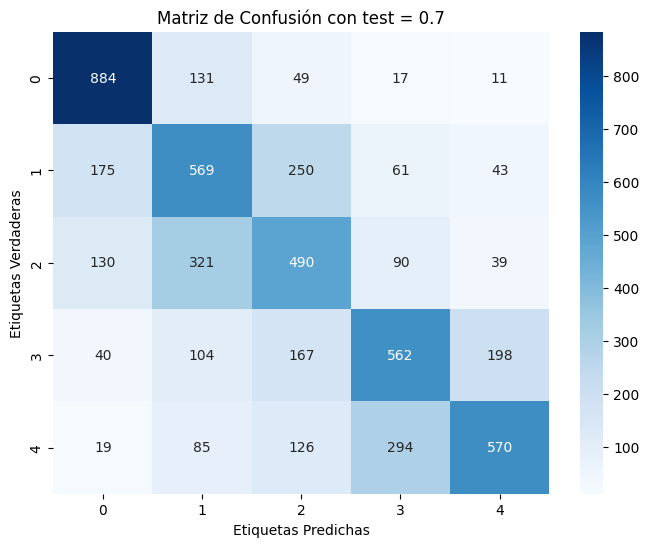

Exactitud del modelo: 0.5668202764976958
Precisión del modelo: 0.568929703886407
Recall del modelo: 0.5668202764976958
Puntuación F1 del modelo: 0.5652099830338618
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.8.png


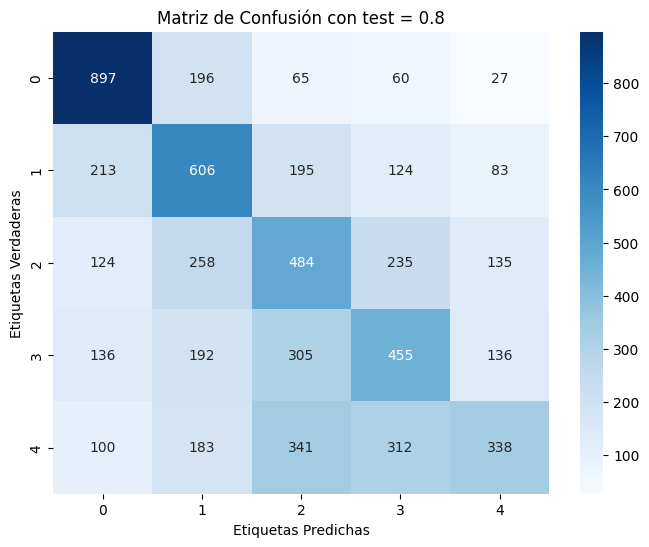

Exactitud del modelo: 0.4483870967741935
Precisión del modelo: 0.44745022303772114
Recall del modelo: 0.4483870967741935
Puntuación F1 del modelo: 0.44028242448544563
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.9.png


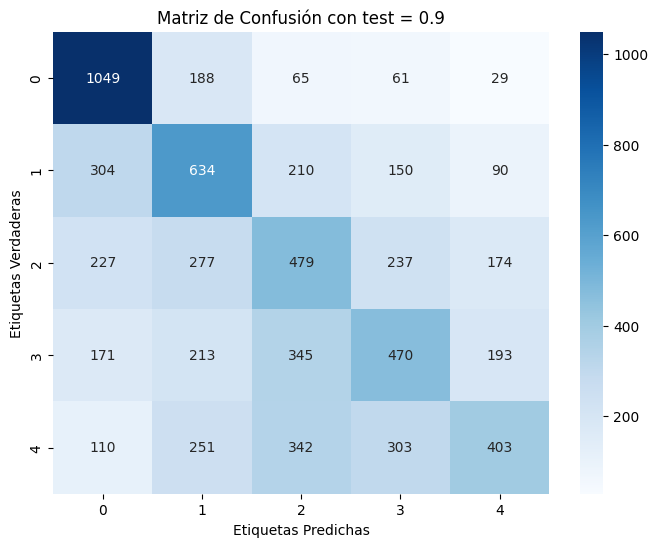

Exactitud del modelo: 0.4351254480286738
Precisión del modelo: 0.4280396249694096
Recall del modelo: 0.4351254480286738
Puntuación F1 del modelo: 0.4243974779862643
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_sim_10_estimators/random_forest_glove_embedding_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Se creó la carpeta Random_Forest_val_cruz_10_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_2.png


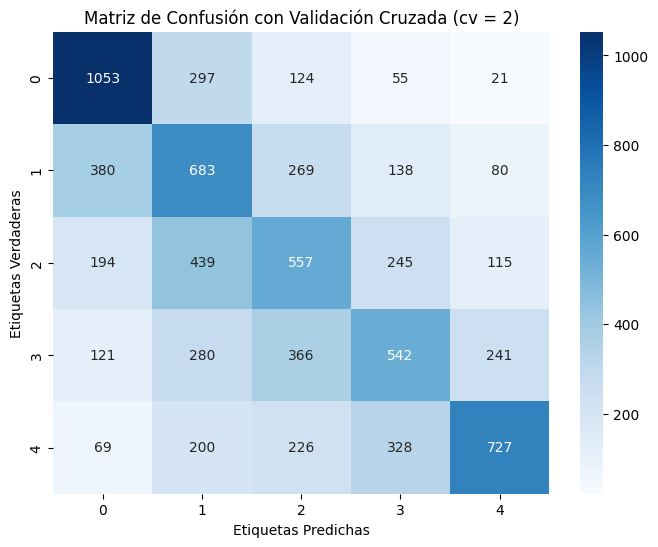

Exactitud media: 0.45961290322580645
Precisión media: 0.46576044553418405
Recall media: 0.45961290322580645
Puntuación F1 media: 0.45858635601347825
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_3.png


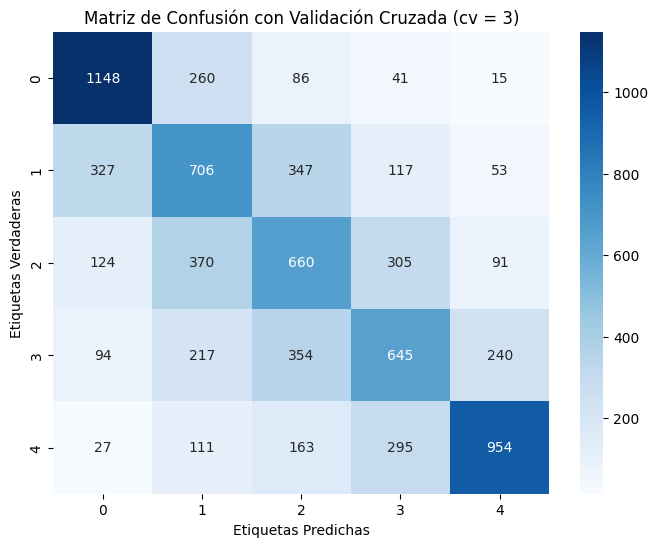

Exactitud media: 0.5307096774193548
Precisión media: 0.5332975049811527
Recall media: 0.5307096774193548
Puntuación F1 media: 0.5306570278270105
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_4.png


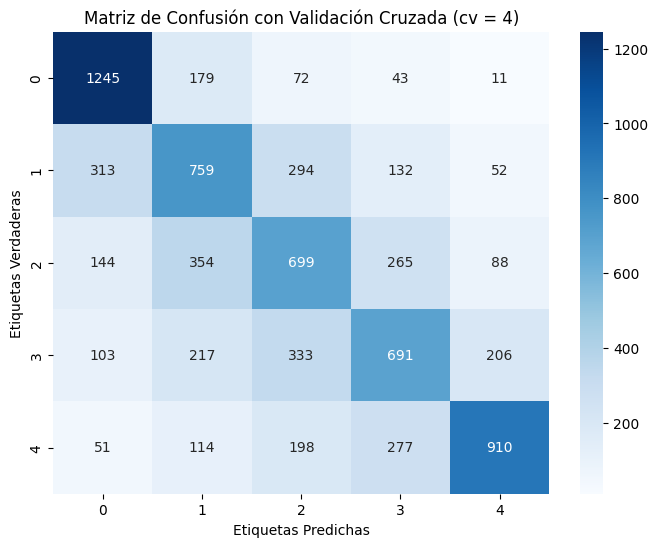

Exactitud media: 0.5553548387096774
Precisión media: 0.5570837847275003
Recall media: 0.5553548387096774
Puntuación F1 media: 0.5534266392284504
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_5.png


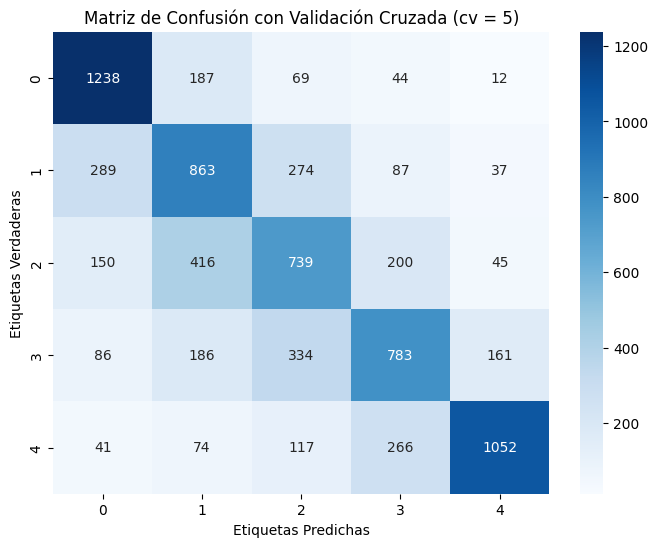

Exactitud media: 0.603225806451613
Precisión media: 0.6081204207334322
Recall media: 0.603225806451613
Puntuación F1 media: 0.603079206895804
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_6.png


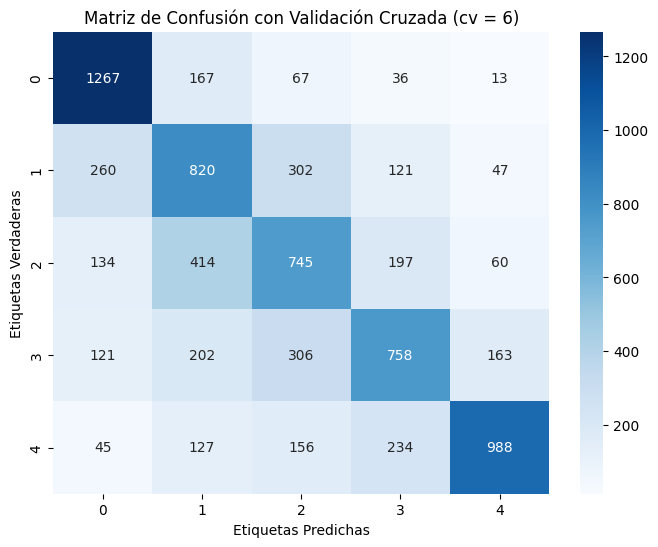

Exactitud media: 0.5907096774193549
Precisión media: 0.5961363032624118
Recall media: 0.5907096774193549
Puntuación F1 media: 0.5901918232613662
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_7.png


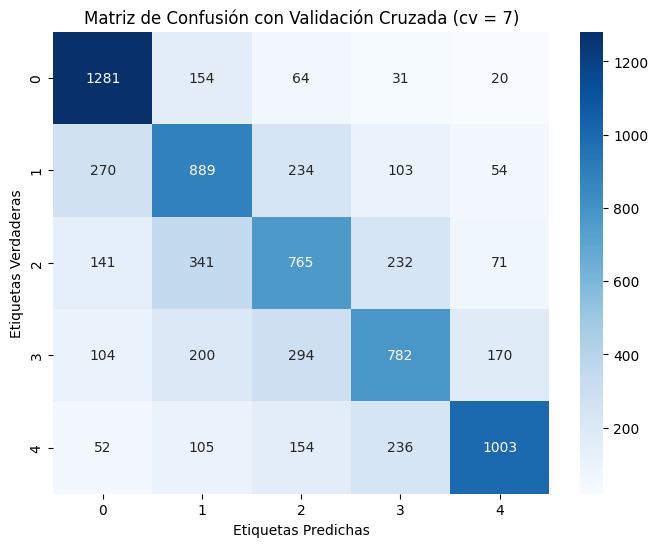

Exactitud media: 0.6090322580645161
Precisión media: 0.6103692830454174
Recall media: 0.6090322580645161
Puntuación F1 media: 0.607049444869907
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_8.png


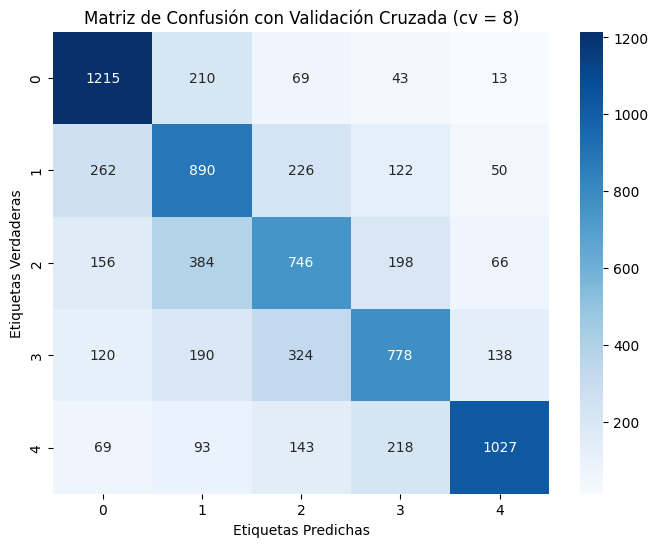

Exactitud media: 0.6007741935483871
Precisión media: 0.6062731904093421
Recall media: 0.6007741935483871
Puntuación F1 media: 0.600456916015456
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_9.png


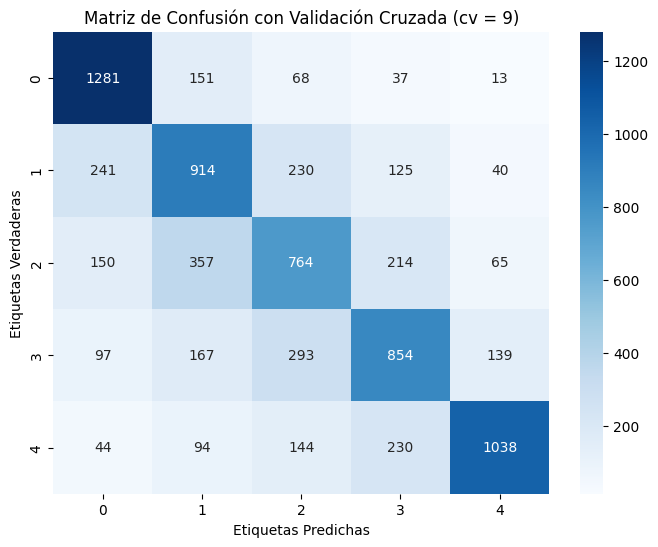

Exactitud media: 0.6259354838709678
Precisión media: 0.6291581135126362
Recall media: 0.6259354838709678
Puntuación F1 media: 0.6251059854325823
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\Glove_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_10.png


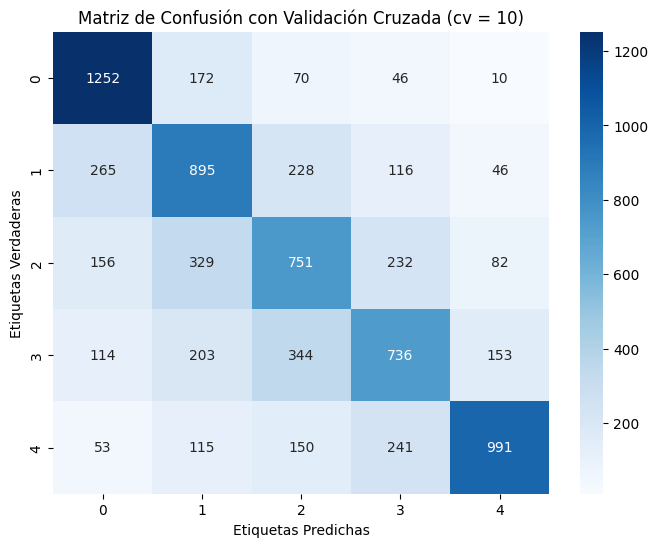

Exactitud media: 0.5967741935483871
Precisión media: 0.599832937065594
Recall media: 0.5967741935483871
Puntuación F1 media: 0.5952916738614741
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/Glove_embeddings/Random_Forest_val_cruz_10_estimators/random_forest_glove_embedding_val_cruz.json


In [7]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion,ruta_figura_incom):
    if validacion == "simple":
        ruta_archivo = ruta_figura_incom + "/random_forest_glove_embedding_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo =  ruta_figura_incom + "/random_forest_glove_embedding_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []
ruta_figura_incom = ""
# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}
for h in range(1,11):
    experimento = 1
    for i in lista_valores:
        resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion,ruta_figura_incom = random_forest_classification(datos,h,test_size_1=i)
        experimento = experimento + 1
    
    almacenar_informacion(resultados_finales_val_simple,validacion,ruta_figura_incom)
    
    lista = list(range(2, 11))
    for j in lista:
        resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion,ruta_figura_incom = random_forest_classification(datos,h,cv=j)
    
    almacenar_informacion(resultados_finales_val_cruz,validacion,ruta_figura_incom)